In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import os
import statistics

#### Mesh-1 : hybrid

In [1]:
import gmsh
import os
import subprocess
import meshio
import numpy as np
import sys

def header():
    gmsh.initialize()
    gmsh.model.add("Header")


    lc = 2.5e-3; lc_boundary = 5e-2; z_coor = 0; scale = 1000;

    gmsh.model.geo.addPoint(675.044420652/scale, 941.810501494/scale, z_coor, lc, 1)
    gmsh.model.geo.addPoint(1001.29293311/scale, 797.332371989/scale, z_coor, lc, 2)
    gmsh.model.geo.addPoint(675.044420652/scale, 797.332371989/scale, z_coor, lc, 3)
    gmsh.model.geo.addPoint(440.29388129/scale, 797.332371989/scale, z_coor, lc, 4)
    gmsh.model.geo.addPoint(425.148947625/scale, 941.810501494/scale, z_coor, lc, 5)

    gmsh.model.geo.addLine(1, 2, 5)
    gmsh.model.geo.addLine(2, 3, 6)
    gmsh.model.geo.addLine(3, 4, 7)
    gmsh.model.geo.addLine(4, 5, 8)
    gmsh.model.geo.addLine(5, 1, 9)
    gmsh.model.geo.addLine(1, 3, 10)

    gmsh.model.geo.synchronize()

    gmsh.model.geo.addCurveLoop([5, 6, -10], 1)
    gmsh.model.geo.addCurveLoop([9, 10, 7, 8], 2)

    gmsh.model.geo.addPlaneSurface([1], 3)
    gmsh.model.geo.addPlaneSurface([2], 4)

    for l in [7, 8, 9, 10]:
        gmsh.model.geo.mesh.setTransfiniteCurve(l, 100, "Progression", 1)
    for l in [5, 6]:
        gmsh.model.geo.mesh.setTransfiniteCurve(l, 200, "Progression", 1)

    gmsh.model.geo.mesh.setTransfiniteSurface(4)

    gmsh.model.geo.mesh.setRecombine(2, 4)

    gmsh.model.geo.synchronize()

    #Extrusion
    layers = 1; extrude_height = 0.01; extrude_vector = [0, 0, extrude_height];
    ex = gmsh.model.geo.extrude([(2, 3), (2, 4)], extrude_vector[0], extrude_vector[1], extrude_vector[2], numElements = [layers], recombine = True)

    gmsh.model.geo.synchronize()

    surface_ids = sorted([e[1] for e in ex if e[0] == 2])
    volume_ids = sorted([e[1] for e in ex if e[0] == 3])

    # # # List of surfaces to display
    # # surfaces_to_display = [surface_ids[0], surface_ids[20]]

    print(surface_ids, volume_ids)
    gmsh.model.addPhysicalGroup(3, volume_ids, 1)
    gmsh.model.setPhysicalName(3, 1, "Fluid")
    gmsh.model.addPhysicalGroup(2, [36], 2)
    gmsh.model.setPhysicalName(2, 2, "Inlet")
    gmsh.model.addPhysicalGroup(2, [44, 22], 3)
    gmsh.model.setPhysicalName(2, 3, "Outlet")
    gmsh.model.addPhysicalGroup(2, [49, 27, 4, 3], 4)
    gmsh.model.setPhysicalName(2, 4, "Sides")
    gmsh.model.addPhysicalGroup(2, [48, 18], 5)
    gmsh.model.setPhysicalName(2, 5, "Walls")
    
    # Mesh Generation
    gmsh.model.mesh.generate(3)

    mesh_file = os.path.abspath("Header.msh2")
    gmsh.write(mesh_file)

    # Launch the GUI to see the results:
    if '-nopopup' not in sys.argv:
        gmsh.fltk.run()

    gmsh.finalize()

    # Saving the mesh file, and opening it
    # mesh = meshio.read(mesh_file)

    # # Extract only the necessary parts of the mesh to avoid issues with cell sets
    # cells = [(cell_block.type, cell_block.data) for cell_block in mesh.cells]

    # # Create a new mesh object without cell sets
    # mesh_clean = meshio.Mesh(points=mesh.points, cells=cells)

    # meshio.write("36k_unstruct.vtk", mesh_clean)


if __name__ == "__main__":
    header()

[18, 22, 26, 26, 27, 36, 44, 48, 49] [1, 2]
Info    : Meshing 1D...
Info    : [  0%] Meshing curve 5 (Line)
Info    : [ 10%] Meshing curve 6 (Line)
Info    : [ 20%] Meshing curve 7 (Line)
Info    : [ 20%] Meshing curve 8 (Line)
Info    : [ 30%] Meshing curve 9 (Line)
Info    : [ 30%] Meshing curve 10 (Line)
Info    : [ 40%] Meshing curve 12 (Extruded)
Info    : [ 50%] Meshing curve 13 (Extruded)
Info    : [ 50%] Meshing curve 14 (Extruded)
Info    : [ 60%] Meshing curve 16 (Extruded)
Info    : [ 60%] Meshing curve 17 (Extruded)
Info    : [ 70%] Meshing curve 21 (Extruded)
Info    : [ 80%] Meshing curve 29 (Extruded)
Info    : [ 80%] Meshing curve 31 (Extruded)
Info    : [ 90%] Meshing curve 32 (Extruded)
Info    : [ 90%] Meshing curve 34 (Extruded)
Info    : [100%] Meshing curve 43 (Extruded)
Info    : Done meshing 1D (Wall 0.00122233s, CPU 0.000832s)
Info    : Meshing 2D...
Info    : [  0%] Meshing surface 3 (Plane, Frontal-Delaunay)
Info    : [ 20%] Meshing surface 4 (Transfinite)
In

#### Mesh-2

In [55]:
import gmsh
import os
import subprocess
import meshio
import numpy as np
import sys

def header():
    gmsh.initialize()
    gmsh.model.add("Header")


    lc = 7e-2; lc_boundary = 5e-2; z_coor = 0; scale = 1000;

    gmsh.model.geo.addPoint(675.044420652/scale, 941.810501494/scale, z_coor, lc, 1)
    gmsh.model.geo.addPoint(1001.29293311/scale, 797.332371989/scale, z_coor, lc, 2)
    gmsh.model.geo.addPoint(675.044420652/scale, 797.332371989/scale, z_coor, lc, 3)
    gmsh.model.geo.addPoint(440.29388129/scale, 797.332371989/scale, z_coor, lc, 4)
    gmsh.model.geo.addPoint(425.148947625/scale, 941.810501494/scale, z_coor, lc, 5)

    gmsh.model.geo.addPoint(838.1686769/scale, 869.569/scale, z_coor, lc, 6)
    gmsh.model.geo.addPoint(838.1686769/scale, 797.332371989/scale, z_coor, lc, 7)

    gmsh.model.geo.addLine(1, 6, 8)
    gmsh.model.geo.addLine(6, 2, 9)
    gmsh.model.geo.addLine(2, 7, 10)
    gmsh.model.geo.addLine(7, 3, 11)
    gmsh.model.geo.addLine(3, 4, 12)
    gmsh.model.geo.addLine(4, 5, 13)
    gmsh.model.geo.addLine(5, 1, 14)
    gmsh.model.geo.addLine(1, 3, 15)
    gmsh.model.geo.addLine(6, 7, 16)

    gmsh.model.geo.synchronize()

    gmsh.model.geo.addCurveLoop([15, 12, 13, 14], 1)
    gmsh.model.geo.addCurveLoop([8, 16, 11, -15], 2)
    gmsh.model.geo.addCurveLoop([9, 10, -16], 3)

    gmsh.model.geo.addPlaneSurface([1], 4)
    gmsh.model.geo.addPlaneSurface([2], 5)
    gmsh.model.geo.addPlaneSurface([3], 6)

    for l in [12, 14]:
        gmsh.model.geo.mesh.setTransfiniteCurve(l, 150, "Progression", 1)
    for l in [13, 15, 16]:
        gmsh.model.geo.mesh.setTransfiniteCurve(l, 85, "Progression", 1)
    for l in [11, 8]:
        gmsh.model.geo.mesh.setTransfiniteCurve(l, 100, "Progression", 1)
    for l in [9, 10]:
        gmsh.model.geo.mesh.setTransfiniteCurve(l, 75, "Progression", 1)

    gmsh.model.geo.mesh.setTransfiniteSurface(4)
    gmsh.model.geo.mesh.setTransfiniteSurface(5)

    gmsh.model.geo.mesh.setRecombine(2, 4)
    gmsh.model.geo.mesh.setRecombine(2, 5)

    gmsh.model.geo.synchronize()

    #Extrusion
    layers = 1; extrude_height = 0.01; extrude_vector = [0, 0, extrude_height];
    ex = gmsh.model.geo.extrude([(2, 4), (2, 5), (2, 6)], extrude_vector[0], extrude_vector[1], extrude_vector[2], numElements = [layers], recombine = True)

    gmsh.model.geo.synchronize()

    surface_ids = sorted([e[1] for e in ex if e[0] == 2])
    volume_ids = sorted([e[1] for e in ex if e[0] == 3])

    # # # List of surfaces to display
    # # surfaces_to_display = [surface_ids[0], surface_ids[20]]

    print(surface_ids, volume_ids)
    gmsh.model.addPhysicalGroup(3, volume_ids, 1)
    gmsh.model.setPhysicalName(3, 1, "Fluid")
    gmsh.model.addPhysicalGroup(2, [32], 2)
    gmsh.model.setPhysicalName(2, 2, "Inlet")
    gmsh.model.addPhysicalGroup(2, [20], 3)
    gmsh.model.setPhysicalName(2, 3, "Outlet")
    gmsh.model.addPhysicalGroup(2, [2, 37], 4)
    gmsh.model.setPhysicalName(2, 4, "Sides")
    named_surfaces = [32, 20, 2, 37]
    remaining_surfaces = [s for s in surface_ids if s not in named_surfaces]
    gmsh.model.addPhysicalGroup(2, remaining_surfaces, 5)
    gmsh.model.setPhysicalName(2, 5, "Walls")
    
    # Mesh Generation
    gmsh.model.mesh.generate(3)

    mesh_file = os.path.abspath("Header.msh2")
    gmsh.write(mesh_file)

    # Launch the GUI to see the results:
    if '-nopopup' not in sys.argv:
        gmsh.fltk.run()

    gmsh.finalize()

    # Saving the mesh file, and opening it
    # mesh = meshio.read(mesh_file)

    # # Extract only the necessary parts of the mesh to avoid issues with cell sets
    # cells = [(cell_block.type, cell_block.data) for cell_block in mesh.cells]

    # # Create a new mesh object without cell sets
    # mesh_clean = meshio.Mesh(points=mesh.points, cells=cells)

    # meshio.write("36k_unstruct.vtk", mesh_clean)


if __name__ == "__main__":
    header()

[25, 25, 29, 33, 37, 38, 47, 51, 51, 55, 60, 68, 72, 77] [1, 2, 3]
Info    : Meshing 1D...
Info    : [  0%] Meshing curve 8 (Line)
Info    : [ 10%] Meshing curve 9 (Line)
Info    : [ 10%] Meshing curve 10 (Line)
Info    : [ 20%] Meshing curve 11 (Line)
Info    : [ 20%] Meshing curve 12 (Line)
Info    : [ 30%] Meshing curve 13 (Line)
Info    : [ 30%] Meshing curve 14 (Line)
Info    : [ 30%] Meshing curve 15 (Line)
Info    : [ 40%] Meshing curve 16 (Line)
Info    : [ 40%] Meshing curve 18 (Extruded)
Info    : [ 50%] Meshing curve 19 (Extruded)
Info    : [ 50%] Meshing curve 20 (Extruded)
Info    : [ 50%] Meshing curve 21 (Extruded)
Info    : [ 60%] Meshing curve 23 (Extruded)
Info    : [ 60%] Meshing curve 24 (Extruded)
Info    : [ 70%] Meshing curve 28 (Extruded)
Info    : [ 70%] Meshing curve 32 (Extruded)
Info    : [ 70%] Meshing curve 40 (Extruded)
Info    : [ 80%] Meshing curve 41 (Extruded)
Info    : [ 80%] Meshing curve 42 (Extruded)
Info    : [ 90%] Meshing curve 46 (Extruded)
In

Info    : Done meshing 3D (Wall 0.149941s, CPU 0.150685s)
Info    : Optimizing mesh...
Info    : Done optimizing mesh (Wall 0.00107273s, CPU 0.001247s)
Info    : 46378 nodes 77157 elements
Info    : Writing '/home/affu5154/OpenFOAM/affu5154-9/run/pygmsh/Mesh_gmsh/Header.msh2'...
Info    : Done writing '/home/affu5154/OpenFOAM/affu5154-9/run/pygmsh/Mesh_gmsh/Header.msh2'
-------------------------------------------------------
Version       : 4.13.1
License       : GNU General Public License
Build OS      : Linux64-sdk
Build date    : 20240524
Build host    : gmsh.info
Build options : 64Bit ALGLIB[contrib] ANN[contrib] Bamg Blas[petsc] Blossom Cgns DIntegration Dlopen DomHex Eigen[contrib] Fltk Gmm[contrib] Hxt Jpeg Kbipack Lapack[petsc] LinuxJoystick MathEx[contrib] Med Mesh Metis[contrib] Mmg Mpeg Netgen Nii2mesh ONELAB ONELABMetamodel OpenCASCADE OpenCASCADE-CAF OpenGL OpenMP OptHom PETSc Parser Plugins Png Post QuadMeshingTools QuadTri Solver TetGen/BR TinyXML2[contrib] Untangle Voro

#### Mesh-3 : unstructured

In [107]:
import gmsh
import os
import subprocess
import meshio
import numpy as np
import sys

def header():
    gmsh.initialize()
    gmsh.model.add("Header")


    lc = 2.5e-2; lc_boundary = 5e-2; z_coor = 0; scale = 1000;

    gmsh.model.geo.addPoint(675.044420652/scale, 941.810501494/scale, z_coor, lc, 1)
    gmsh.model.geo.addPoint(1001.29293311/scale, 797.332371989/scale, z_coor, lc, 2)
    gmsh.model.geo.addPoint(675.044420652/scale, 797.332371989/scale, z_coor, lc, 3)
    gmsh.model.geo.addPoint(440.29388129/scale, 797.332371989/scale, z_coor, lc, 4)
    gmsh.model.geo.addPoint(425.148947625/scale, 941.810501494/scale, z_coor, lc, 5)

    gmsh.model.geo.addLine(1, 2, 5)
    gmsh.model.geo.addLine(2, 3, 6)
    gmsh.model.geo.addLine(3, 4, 7)
    gmsh.model.geo.addLine(4, 5, 8)
    gmsh.model.geo.addLine(5, 1, 9)
    gmsh.model.geo.addLine(1, 3, 10)

    gmsh.model.geo.synchronize()

    gmsh.model.geo.addCurveLoop([5, 6, -10], 1)
    gmsh.model.geo.addCurveLoop([9, 10, 7, 8], 2)

    gmsh.model.geo.addPlaneSurface([1], 3)
    gmsh.model.geo.addPlaneSurface([2], 4)

    # for l in [8]:
    #     gmsh.model.geo.mesh.setTransfiniteCurve(l, 100, "Progression", 1)
    # for l in [5]:
    #     gmsh.model.geo.mesh.setTransfiniteCurve(l, 200, "Progression", 1)
    # for l in [7, 6]:
    #     gmsh.model.geo.mesh.setTransfiniteCurve(l, 150, "Progression", 1)

    gmsh.model.geo.synchronize()

    #Extrusion
    layers = 1; extrude_height = 0.01; extrude_vector = [0, 0, extrude_height];
    ex = gmsh.model.geo.extrude([(2, 3), (2, 4)], extrude_vector[0], extrude_vector[1], extrude_vector[2], numElements = [layers], recombine = True)

    gmsh.model.geo.synchronize()

    surface_ids = sorted([e[1] for e in ex if e[0] == 2])
    volume_ids = sorted([e[1] for e in ex if e[0] == 3])

    # # # List of surfaces to display
    # # surfaces_to_display = [surface_ids[0], surface_ids[20]]

    print(surface_ids, volume_ids)
    gmsh.model.addPhysicalGroup(3, volume_ids, 1)
    gmsh.model.setPhysicalName(3, 1, "Fluid")
    gmsh.model.addPhysicalGroup(2, [36], 2)
    gmsh.model.setPhysicalName(2, 2, "Inlet")
    gmsh.model.addPhysicalGroup(2, [44, 22], 3)
    gmsh.model.setPhysicalName(2, 3, "Outlet")
    gmsh.model.addPhysicalGroup(2, [49, 27, 4, 3], 4)
    gmsh.model.setPhysicalName(2, 4, "Sides")
    gmsh.model.addPhysicalGroup(2, [18, 48], 5)
    gmsh.model.setPhysicalName(2, 5, "Walls")
    
    # Mesh Generation
    gmsh.model.mesh.generate(3)

    mesh_file = os.path.abspath("Header_unstruct.msh2")
    gmsh.write(mesh_file)

    # Launch the GUI to see the results:
    if '-nopopup' not in sys.argv:
        gmsh.fltk.run()

    gmsh.finalize()

    # Saving the mesh file, and opening it
    # mesh = meshio.read(mesh_file)

    # # Extract only the necessary parts of the mesh to avoid issues with cell sets
    # cells = [(cell_block.type, cell_block.data) for cell_block in mesh.cells]

    # # Create a new mesh object without cell sets
    # mesh_clean = meshio.Mesh(points=mesh.points, cells=cells)

    # meshio.write("36k_unstruct.vtk", mesh_clean)


if __name__ == "__main__":
    header()

[18, 22, 26, 26, 27, 36, 44, 48, 49] [1, 2]
Info    : Meshing 1D...
Info    : [  0%] Meshing curve 5 (Line)
Info    : [ 10%] Meshing curve 6 (Line)
Info    : [ 20%] Meshing curve 7 (Line)
Info    : [ 20%] Meshing curve 8 (Line)
Info    : [ 30%] Meshing curve 9 (Line)
Info    : [ 30%] Meshing curve 10 (Line)
Info    : [ 40%] Meshing curve 12 (Extruded)
Info    : [ 50%] Meshing curve 13 (Extruded)
Info    : [ 50%] Meshing curve 14 (Extruded)
Info    : [ 60%] Meshing curve 16 (Extruded)
Info    : [ 60%] Meshing curve 17 (Extruded)
Info    : [ 70%] Meshing curve 21 (Extruded)
Info    : [ 80%] Meshing curve 29 (Extruded)
Info    : [ 80%] Meshing curve 31 (Extruded)
Info    : [ 90%] Meshing curve 32 (Extruded)
Info    : [ 90%] Meshing curve 34 (Extruded)
Info    : [100%] Meshing curve 43 (Extruded)
Info    : Done meshing 1D (Wall 0.00109512s, CPU 0s)
Info    : Meshing 2D...
Info    : [  0%] Meshing surface 3 (Plane, Frontal-Delaunay)
Info    : [ 20%] Meshing surface 4 (Plane, Frontal-Delauna

#### Post-processing

['mesh_1k.png', 'mesh_27k.png', 'mesh_47k.png', 'mesh_5k.png', 'mesh_95k.png', 'mesh_9k.png']


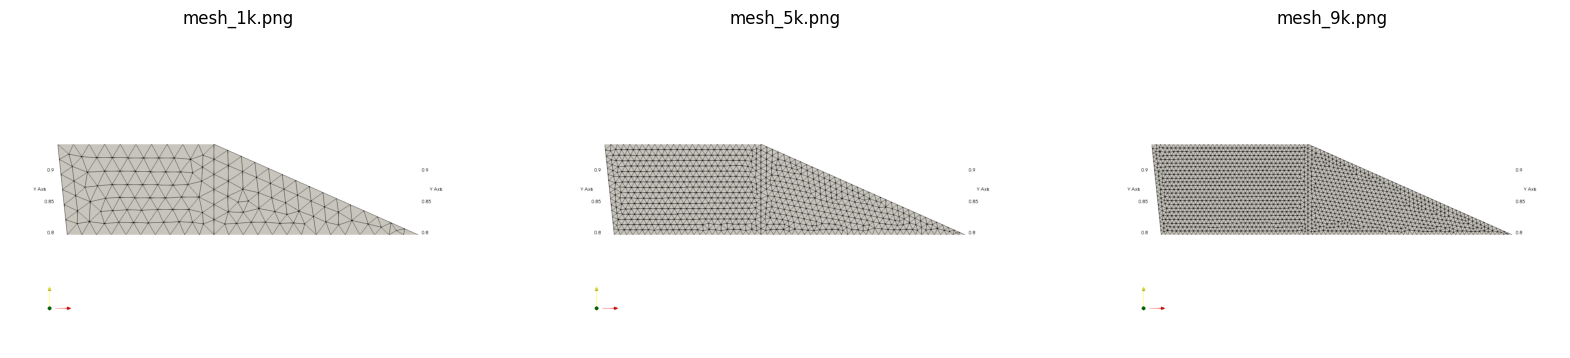

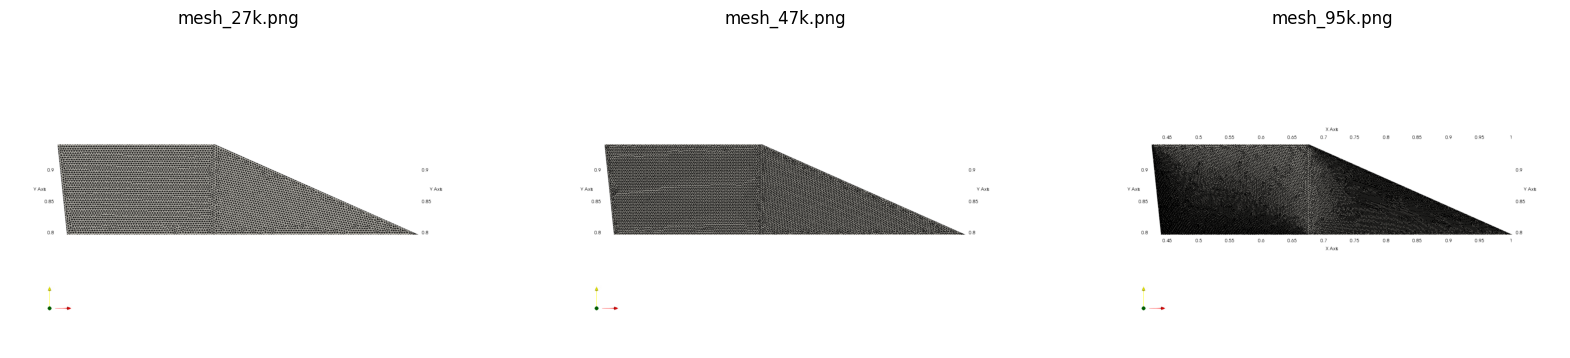

In [70]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import os

# Specify the directory where your PNG files are located
image_dir = '/home/affu5154/OpenFOAM/affu5154-9/run/pygmsh/Mesh_gmsh/Header/data_files'

# List all files in the folder
files_image = os.listdir(image_dir)

# Filter out PNG files
png_files = sorted([f for f in files_image if f.endswith('.png')], reverse=False)
print(png_files)

images = []

# Load the images and store them in the array
for png_file in png_files:
    full_image_path = os.path.join(image_dir, png_file)  # Use a new variable to store the full path
    image = Image.open(full_image_path)
    images.append(np.array(image))

# Define the specific image indices you want to display
image_indices = [0, 3, 5]  

fig, axes = plt.subplots(1, 3, figsize=(20, 20))  # Adjust the figsize as needed

# Ensure axes is iterable
if not isinstance(axes, (list, np.ndarray)):
    axes = [axes]

# Display the specific images on each subplot
for ax, image_index in zip(axes, image_indices):
    ax.imshow(images[image_index])
    ax.axis('off')  # Hide the axis
    ax.set_title(png_files[image_index])  # Set the title to the filename

plt.show()

# Define the specific image indices you want to display
image_indices = [1, 2, 4]  

fig, axes = plt.subplots(1, 3, figsize=(20, 20))  # Adjust the figsize as needed

# Ensure axes is iterable
if not isinstance(axes, (list, np.ndarray)):
    axes = [axes]

# Display the specific images on each subplot
for ax, image_index in zip(axes, image_indices):
    ax.imshow(images[image_index])
    ax.axis('off')  # Hide the axis
    ax.set_title(png_files[image_index])  # Set the title to the filename

plt.show()

##### Pressure drop calculations

##### Original Design

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import os


# Specify the directory where your CSV files are located
folder_path = '/home/affu5154/OpenFOAM/affu5154-9/run/pygmsh/Mesh_gmsh/Header/data_files'

# List all CSV files in the directory
csv_files = sorted([file for file in os.listdir(folder_path) if file.endswith('.csv')])
print(csv_files)
print("\n"*2)

num_rows = 1000;
num_cols = len(csv_files)
num_cases = 14

# Read each CSV file into a DataFrame
coor_x = np.zeros((num_rows, num_cols), dtype = np.float64)
pressure_stat = np.zeros((num_rows, num_cols), dtype = np.float64)
pressure_dyn = np.zeros((num_rows, num_cols), dtype = np.float64)
mass_flux = np.zeros((num_rows, num_cols), dtype = np.float64)


for idx, file in enumerate(csv_files):
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path, skiprows = [0])
    pressure_dyn[:,idx] = df.iloc[:,0]
    mass_flux[:,idx] = df.iloc[:,1]
    pressure_stat[:,idx] = df.iloc[:,2]
    coor_x[:,idx] = df.iloc[:,3]


p_stat_inlet = []
p_stat_outlet = []
p_dyn_inlet = []
p_dyn_outlet = []
p_total_inlet = []
p_total_outlet = []

dx_inlet = coor_x[1,1] - coor_x[0,1]; dx_outlet = coor_x[1,7] - coor_x[0,7];


for i in range(14):
    if i < 7:
        p_stat_inlet.append(float(+1*(np.sum(pressure_stat[:,i]*dx_inlet) / (coor_x[-1,i] - coor_x[0,i]))))
        p_dyn_inlet.append(float(1*(np.sum(pressure_dyn[:,i]*dx_inlet*mass_flux[:,i]) / np.sum(mass_flux[:,i]*dx_inlet))))
        p_total_inlet.append(p_stat_inlet[-1] + p_dyn_inlet[-1])
    else:
        p_stat_outlet.append(float(np.sum(pressure_stat[:,i]*dx_outlet) / (coor_x[-1,i] - coor_x[0,i])))
        p_dyn_outlet.append(float(np.sum(pressure_dyn[:,i]*dx_outlet*mass_flux[:,i]) / np.sum(mass_flux[:,i]*dx_outlet)))
        p_total_outlet.append(p_stat_outlet[-1] + p_dyn_outlet[-1])

stat_pressure_drop = np.array(p_stat_inlet) - np.array(p_stat_outlet)
dynamic_pressure_drop = np.array(p_dyn_inlet) - np.array(p_dyn_outlet)
total_pressure_drop = np.array(p_total_inlet) - np.array(p_total_outlet)

# print(len(stat_pressure_drop), len(dynamic_pressure_drop), len(total_pressure_drop))


# Create DataFrame
data = {
    "Mesh": csv_files,
    "Static Pressure ": p_stat_inlet + p_stat_outlet,
    "Dynamic Pressure ": p_dyn_inlet + p_dyn_outlet,
    "Total Pressure (Pa)": p_total_inlet + p_total_outlet
}

df = pd.DataFrame(data)

# Display DataFrame as a table
print(df)

print("\n"*2)

# Create DataFrame
mesh_names = ["1k", "27k_pimple", "27k_simple", "47k", "5k", "95k", "9k"]
data = {
    "Mesh": mesh_names,
    "Static Pressure Drop ": stat_pressure_drop,
    "Dynamic Pressure Drop": dynamic_pressure_drop,
    "Total Pressure Drop": total_pressure_drop
}

df = pd.DataFrame(data)

# Display DataFrame as a table
print(df)

['inlet_1k.csv', 'inlet_27k_pimple.csv', 'inlet_27k_simple.csv', 'inlet_47k.csv', 'inlet_5k.csv', 'inlet_95k.csv', 'inlet_9k.csv', 'outlet_1k.csv', 'outlet_27k_pimple.csv', 'outlet_27k_simple.csv', 'outlet_47k.csv', 'outlet_5k.csv', 'outlet_95k.csv', 'outlet_9k.csv']



                     Mesh  Static Pressure   Dynamic Pressure   \
0            inlet_1k.csv          7.632909          44.568363   
1    inlet_27k_pimple.csv          7.397765          45.581761   
2    inlet_27k_simple.csv          7.469153          45.604144   
3           inlet_47k.csv          7.483120          45.662736   
4            inlet_5k.csv          7.549506          45.302815   
5           inlet_95k.csv          7.341365          45.668485   
6            inlet_9k.csv          7.501607          45.476730   
7           outlet_1k.csv          0.001669          49.351491   
8   outlet_27k_pimple.csv         -0.004462          50.894757   
9   outlet_27k_simple.csv         -0.001836          50.938325   
10 

### Straight Domain Design

#### Pressure function processing

In [7]:
def pressure_processing(csv_files, num_vanes):
    
    num_rows = 1000;
    num_cols = len(csv_files)

    array_names = ['inlet_dynamic_pressure', 'inlet_mass_flux', 'inlet_static_pressure', 'coorx_inlet', 'outlet_dynamic_pressure', 'outlet_mass_flux', 'outlet_static_pressure', 'coorx_outlet']
    arrays = {name: np.zeros((num_rows, num_vanes+1)) for name in array_names}

    dx_inlet = np.zeros(num_vanes+1); dx_outlet = np.zeros(num_vanes+1);

    p_stat_inlet = []; p_dyn_inlet = []; p_total_inlet = [];
    p_stat_outlet = []; p_dyn_outlet = []; p_total_outlet = [];

    for idx in range(num_vanes+1):
        df = pd.read_csv(os.path.join(folder_path, csv_files[idx]), skiprows=[0])
        arrays['inlet_dynamic_pressure'][:,idx] = df.iloc[:,0]
        arrays['inlet_mass_flux'][:,idx] = df.iloc[:,1]
        arrays['inlet_static_pressure'][:,idx] = df.iloc[:,2]
        arrays['coorx_inlet'][:,idx] = df.iloc[:,3]
        dx_inlet[idx] = df.iloc[1,3] - df.iloc[0,3]

    j = 0
    for idx in range(num_vanes+1, 2*(num_vanes+1)):
        df = pd.read_csv(os.path.join(folder_path, csv_files[idx]), skiprows=[0])
        arrays['outlet_dynamic_pressure'][:,j] = df.iloc[:,0]
        arrays['outlet_mass_flux'][:,j] = df.iloc[:,1]
        arrays['outlet_static_pressure'][:,j] = df.iloc[:,2]
        arrays['coorx_outlet'][:,j] = df.iloc[:,3]
        dx_outlet[j] = df.iloc[1,3] - df.iloc[0,3]
        j+=1

    j = 0
    for i in range(2*(num_vanes+1)):
        if i <= num_vanes:
            p_stat_inlet.append(float(+1*(np.sum(arrays['inlet_static_pressure'][:,i]*dx_inlet[i]) / (arrays['coorx_inlet'][-1,i] - arrays['coorx_inlet'][0,i]))))
            p_dyn_inlet.append(float(1*(np.sum(arrays['inlet_dynamic_pressure'][:,i]*dx_inlet[i]*arrays['inlet_mass_flux'][:,i]) / np.sum(arrays['inlet_mass_flux'][:,i]*dx_inlet[i]))))
            p_total_inlet.append(p_stat_inlet[-1] + p_dyn_inlet[-1])
        else:
            p_stat_outlet.append(float(np.sum(arrays['outlet_static_pressure'][:,j]*dx_outlet[j]) / (arrays['coorx_outlet'][-1,j] - arrays['coorx_outlet'][0,j])))
            p_dyn_outlet.append(float(np.sum( arrays['outlet_dynamic_pressure'][:,j]*dx_outlet[j]*arrays['outlet_mass_flux'][:,j]) / np.sum(arrays['outlet_mass_flux'][:,j]*dx_outlet[j])))
            p_total_outlet.append(p_stat_outlet[-1] + p_dyn_outlet[-1])
            j+=1

    return p_stat_inlet, p_dyn_inlet, p_total_inlet, p_stat_outlet, p_dyn_outlet, p_total_outlet

##### 1 vanes

In [43]:
# Specify the directory where your CSV files are located
folder_path = '/home/affu5154/OpenFOAM/affu5154-9/run/pygmsh/Mesh_gmsh/Header/Optimized_trials/1vanes_2.0'

# List all CSV files in the directory
csv_files = sorted([file for file in os.listdir(folder_path) if file.endswith('.csv')])
print(csv_files)
print("\n"*2)
num_vanes = 1


p_stat_inlet, p_dyn_inlet, p_total_inlet, p_stat_outlet, p_dyn_outlet, p_total_outlet = pressure_processing(csv_files, num_vanes)

stat_pressure_drop = np.array(p_stat_inlet) - np.array(p_stat_outlet)
dynamic_pressure_drop = np.array(p_dyn_inlet) - np.array(p_dyn_outlet)
total_pressure_drop = np.array(p_total_inlet) - np.array(p_total_outlet)

# Create DataFrame
data = {
    "Region": csv_files,
    "Static Pressure ": p_stat_inlet + p_stat_outlet,
    "Dynamic Pressure ": p_dyn_inlet + p_dyn_outlet,
    "Total Pressure (Pa)": p_total_inlet + p_total_outlet
}

df = pd.DataFrame(data)

# Display DataFrame as a table
print(df)

print("\n"*2)

# Create DataFrame
region_names = ["Region 1", "Region 2"]
data = {
    "Mesh": region_names,
    "Static Pressure Drop ": stat_pressure_drop,
    "Dynamic Pressure Drop": dynamic_pressure_drop,
    "Total Pressure Drop": total_pressure_drop
}

df = pd.DataFrame(data)

# Display DataFrame as a table
print(df)
print("\n")
print(np.mean(total_pressure_drop), np.max(total_pressure_drop), np.min(total_pressure_drop))

['1vanes_inlet1.csv', '1vanes_inlet2.csv', '1vanes_outlet1.csv', '1vanes_outlet2.csv']



               Region  Static Pressure   Dynamic Pressure   \
0   1vanes_inlet1.csv         10.073073          45.552452   
1   1vanes_inlet2.csv        204.602601          45.569251   
2  1vanes_outlet1.csv         -0.003720          51.391970   
3  1vanes_outlet2.csv         -0.015459         193.078248   

   Total Pressure (Pa)  
0            55.625526  
1           250.171852  
2            51.388250  
3           193.062790  



       Mesh  Static Pressure Drop   Dynamic Pressure Drop  Total Pressure Drop
0  Region 1              10.076794              -5.839518             4.237276
1  Region 2             204.618060            -147.508998            57.109062


30.673168752360155 57.10906191020675 4.237275594513562


##### 2 vanes

In [44]:
# Specify the directory where your CSV files are located
folder_path = '/home/affu5154/OpenFOAM/affu5154-9/run/pygmsh/Mesh_gmsh/Header/Optimized_trials/2vanes_2.0'

# List all CSV files in the directory
csv_files = sorted([file for file in os.listdir(folder_path) if file.endswith('.csv')])
print(csv_files)
print("\n"*2)
num_vanes = 2


p_stat_inlet, p_dyn_inlet, p_total_inlet, p_stat_outlet, p_dyn_outlet, p_total_outlet = pressure_processing(csv_files, num_vanes)

stat_pressure_drop = np.array(p_stat_inlet) - np.array(p_stat_outlet)
dynamic_pressure_drop = np.array(p_dyn_inlet) - np.array(p_dyn_outlet)
total_pressure_drop = np.array(p_total_inlet) - np.array(p_total_outlet)

# Create DataFrame
data = {
    "Region": csv_files,
    "Static Pressure ": p_stat_inlet + p_stat_outlet,
    "Dynamic Pressure ": p_dyn_inlet + p_dyn_outlet,
    "Total Pressure (Pa)": p_total_inlet + p_total_outlet
}

df = pd.DataFrame(data)

# Display DataFrame as a table
print(df)

print("\n"*2)

# Create DataFrame
region_names = ["Region 1", "Region 2", "Region 3"]
data = {
    "Mesh": region_names,
    "Static Pressure Drop ": stat_pressure_drop,
    "Dynamic Pressure Drop": dynamic_pressure_drop,
    "Total Pressure Drop": total_pressure_drop
}

df = pd.DataFrame(data)

# Display DataFrame as a table
print(df)
print("\n")
print(np.mean(total_pressure_drop), np.max(total_pressure_drop), np.min(total_pressure_drop))

['intlet_1.csv', 'intlet_2.csv', 'intlet_3.csv', 'outlet_1.csv', 'outlet_2.csv', 'outlet_3.csv']



         Region  Static Pressure   Dynamic Pressure   Total Pressure (Pa)
0  intlet_1.csv          8.730408          45.456355            54.186764
1  intlet_2.csv        105.758170          45.480900           151.239070
2  intlet_3.csv        284.941321          45.335542           330.276864
3  outlet_1.csv         -0.004807          47.685756            47.680949
4  outlet_2.csv         -0.021101         110.907732           110.886632
5  outlet_3.csv         -0.117981         192.656998           192.539017



       Mesh  Static Pressure Drop   Dynamic Pressure Drop  Total Pressure Drop
0  Region 1               8.735215              -2.229400             6.505814
1  Region 2             105.779271             -65.426832            40.352439
2  Region 3             285.059302            -147.321455           137.737847


61.53203350808307 137.73784725557238 6.505814441544182


##### 3 vanes

In [45]:
# Specify the directory where your CSV files are located
folder_path = '/home/affu5154/OpenFOAM/affu5154-9/run/pygmsh/Mesh_gmsh/Header/Optimized_trials/3vanes_1.0'

# List all CSV files in the directory
csv_files = sorted([file for file in os.listdir(folder_path) if file.endswith('.csv')])
print(csv_files)
print("\n"*2)
num_vanes = 3


p_stat_inlet, p_dyn_inlet, p_total_inlet, p_stat_outlet, p_dyn_outlet, p_total_outlet = pressure_processing(csv_files, num_vanes)

stat_pressure_drop = np.array(p_stat_inlet) - np.array(p_stat_outlet)
dynamic_pressure_drop = np.array(p_dyn_inlet) - np.array(p_dyn_outlet)
total_pressure_drop = np.array(p_total_inlet) - np.array(p_total_outlet)

# Create DataFrame
data = {
    "Region": csv_files,
    "Static Pressure ": p_stat_inlet + p_stat_outlet,
    "Dynamic Pressure ": p_dyn_inlet + p_dyn_outlet,
    "Total Pressure (Pa)": p_total_inlet + p_total_outlet
}

df = pd.DataFrame(data)

# Display DataFrame as a table
print(df)

print("\n"*2)

# Create DataFrame
region_names = ["Region 1", "Region 2", "Region 3", "Region 4"]
data = {
    "Mesh": region_names,
    "Static Pressure Drop ": stat_pressure_drop,
    "Dynamic Pressure Drop": dynamic_pressure_drop,
    "Total Pressure Drop": total_pressure_drop
}

df = pd.DataFrame(data)

# Display DataFrame as a table
print(df)
print("\n")
print(np.mean(total_pressure_drop), np.max(total_pressure_drop), np.min(total_pressure_drop))

['inlet_1.csv', 'inlet_2.csv', 'inlet_3.csv', 'inlet_4.csv', 'outlet_1.csv', 'outlet_2.csv', 'outlet_3.csv', 'outlet_4.csv']



         Region  Static Pressure   Dynamic Pressure   Total Pressure (Pa)
0   inlet_1.csv          0.369008          45.317737            45.686745
1   inlet_2.csv         63.549040          45.372038           108.921078
2   inlet_3.csv        167.368155          45.217498           212.585654
3   inlet_4.csv        323.833618          45.351904           369.185522
4  outlet_1.csv         -0.006039          37.592609            37.586570
5  outlet_2.csv         -0.020735          77.498788            77.478053
6  outlet_3.csv         -0.100823         127.354335           127.253512
7  outlet_4.csv          0.104220         177.594262           177.698482



       Mesh  Static Pressure Drop   Dynamic Pressure Drop  Total Pressure Drop
0  Region 1               0.375047               7.725128             8.100175
1  Region 2              63.569775           

##### 4 vanes

In [46]:
# Specify the directory where your CSV files are located
folder_path = '/home/affu5154/OpenFOAM/affu5154-9/run/pygmsh/Mesh_gmsh/Header/Optimized_trials/4vanes_2.0'

# List all CSV files in the directory
csv_files = sorted([file for file in os.listdir(folder_path) if file.endswith('.csv')])
print(csv_files)
print("\n"*2)
num_vanes = 4


p_stat_inlet, p_dyn_inlet, p_total_inlet, p_stat_outlet, p_dyn_outlet, p_total_outlet = pressure_processing(csv_files, num_vanes)

stat_pressure_drop = np.array(p_stat_inlet) - np.array(p_stat_outlet)
dynamic_pressure_drop = np.array(p_dyn_inlet) - np.array(p_dyn_outlet)
total_pressure_drop = np.array(p_total_inlet) - np.array(p_total_outlet)

# Create DataFrame
data = {
    "Region": csv_files,
    "Static Pressure ": p_stat_inlet + p_stat_outlet,
    "Dynamic Pressure ": p_dyn_inlet + p_dyn_outlet,
    "Total Pressure (Pa)": p_total_inlet + p_total_outlet
}

df = pd.DataFrame(data)

# Display DataFrame as a table
print(df)

print("\n"*2)

# Create DataFrame
region_names = ["Region 1", "Region 2", "Region 3", "Region 4", "Region 5"]
data = {
    "Mesh": region_names,
    "Static Pressure Drop ": stat_pressure_drop,
    "Dynamic Pressure Drop": dynamic_pressure_drop,
    "Total Pressure Drop": total_pressure_drop
}

df = pd.DataFrame(data)

# Display DataFrame as a table
print(df)
print("\n")
print(np.mean(total_pressure_drop), np.max(total_pressure_drop), np.min(total_pressure_drop))

['intlet_1.csv', 'intlet_2.csv', 'intlet_3.csv', 'intlet_4.csv', 'intlet_5.csv', 'outlet_1.csv', 'outlet_2.csv', 'outlet_3.csv', 'outlet_4.csv', 'outlet_5.csv']



         Region  Static Pressure   Dynamic Pressure   Total Pressure (Pa)
0  intlet_1.csv        -12.082286          45.222003            33.139718
1  intlet_2.csv         34.378505          45.239988            79.618493
2  intlet_3.csv         98.704121          45.226298           143.930419
3  intlet_4.csv        190.135020          45.176619           235.311639
4  intlet_5.csv        303.934797          45.322727           349.257524
5  outlet_1.csv         -0.008291          22.963888            22.955597
6  outlet_2.csv         -0.022295          48.155176            48.132881
7  outlet_3.csv         -0.040077          67.460463            67.420387
8  outlet_4.csv         -0.160937          91.312553            91.151616
9  outlet_5.csv         -0.119085         102.660571           102.541486



       Mesh  Static

##### 5 vanes

In [47]:
# Specify the directory where your CSV files are located
folder_path = '/home/affu5154/OpenFOAM/affu5154-9/run/pygmsh/Mesh_gmsh/Header/Optimized_trials/5vanes_2.0'

# List all CSV files in the directory
csv_files = sorted([file for file in os.listdir(folder_path) if file.endswith('.csv')])
print(csv_files)
print("\n"*2)
num_vanes = 5


p_stat_inlet, p_dyn_inlet, p_total_inlet, p_stat_outlet, p_dyn_outlet, p_total_outlet = pressure_processing(csv_files, num_vanes)

stat_pressure_drop = np.array(p_stat_inlet) - np.array(p_stat_outlet)
dynamic_pressure_drop = np.array(p_dyn_inlet) - np.array(p_dyn_outlet)
total_pressure_drop = np.array(p_total_inlet) - np.array(p_total_outlet)

# Create DataFrame
data = {
    "Region": csv_files,
    "Static Pressure ": p_stat_inlet + p_stat_outlet,
    "Dynamic Pressure ": p_dyn_inlet + p_dyn_outlet,
    "Total Pressure (Pa)": p_total_inlet + p_total_outlet
}

df = pd.DataFrame(data)

# Display DataFrame as a table
print(df)

print("\n"*2)

# Create DataFrame
region_names = ["Region 1", "Region 2", "Region 3", "Region 4", "Region 5", "Region 6"]
data = {
    "Mesh": region_names,
    "Static Pressure Drop ": stat_pressure_drop,
    "Dynamic Pressure Drop": dynamic_pressure_drop,
    "Total Pressure Drop": total_pressure_drop
}

df = pd.DataFrame(data)

# Display DataFrame as a table
print(df)
print("\n")
print(np.mean(total_pressure_drop), np.max(total_pressure_drop), np.min(total_pressure_drop))

['intlet_1.csv', 'intlet_2.csv', 'intlet_3.csv', 'intlet_4.csv', 'intlet_5.csv', 'intlet_6.csv', 'outlet_1.csv', 'outlet_2.csv', 'outlet_3.csv', 'outlet_4.csv', 'outlet_5.csv', 'outlet_6.csv']



          Region  Static Pressure   Dynamic Pressure   Total Pressure (Pa)
0   intlet_1.csv        -22.831888          45.113799            22.281911
1   intlet_2.csv         12.921957          45.166102            58.088059
2   intlet_3.csv         60.977981          45.122086           106.100067
3   intlet_4.csv        126.960745          45.130798           172.091543
4   intlet_5.csv        197.230013          45.057539           242.287551
5   intlet_6.csv        298.083439          45.218543           343.301982
6   outlet_1.csv         -0.005565          14.189662            14.184097
7   outlet_2.csv         -0.018826          31.145083            31.126257
8   outlet_3.csv         -0.035689          47.065971            47.030281
9   outlet_4.csv         -0.072639          63.447411 

##### 6 vanes

In [48]:
# Specify the directory where your CSV files are located
folder_path = '/home/affu5154/OpenFOAM/affu5154-9/run/pygmsh/Mesh_gmsh/Header/Optimized_trials/6vanes_2.0'

# List all CSV files in the directory
csv_files = sorted([file for file in os.listdir(folder_path) if file.endswith('.csv')])
print(csv_files)
print("\n"*2)
num_vanes = 6


p_stat_inlet, p_dyn_inlet, p_total_inlet, p_stat_outlet, p_dyn_outlet, p_total_outlet = pressure_processing(csv_files, num_vanes)

stat_pressure_drop = np.array(p_stat_inlet) - np.array(p_stat_outlet)
dynamic_pressure_drop = np.array(p_dyn_inlet) - np.array(p_dyn_outlet)
total_pressure_drop = np.array(p_total_inlet) - np.array(p_total_outlet)

# Create DataFrame
data = {
    "Region": csv_files,
    "Static Pressure ": p_stat_inlet + p_stat_outlet,
    "Dynamic Pressure ": p_dyn_inlet + p_dyn_outlet,
    "Total Pressure (Pa)": p_total_inlet + p_total_outlet
}

df = pd.DataFrame(data)

# Display DataFrame as a table
print(df)

print("\n"*2)

# Create DataFrame
region_names = ["Region 1", "Region 2", "Region 3", "Region 4", "Region 5", "Region 6", "Region 7"]
data = {
    "Mesh": region_names,
    "Static Pressure Drop ": stat_pressure_drop,
    "Dynamic Pressure Drop": dynamic_pressure_drop,
    "Total Pressure Drop": total_pressure_drop
}

df = pd.DataFrame(data)

# Display DataFrame as a table
print(df)
print("\n")
print(np.mean(total_pressure_drop), np.max(total_pressure_drop), np.min(total_pressure_drop))

['inlet_1.csv', 'inlet_2.csv', 'inlet_3.csv', 'inlet_4.csv', 'inlet_5.csv', 'inlet_6.csv', 'inlet_7.csv', 'outlet_1.csv', 'outlet_2.csv', 'outlet_3.csv', 'outlet_4.csv', 'outlet_5.csv', 'outlet_6.csv', 'outlet_7.csv']



          Region  Static Pressure   Dynamic Pressure   Total Pressure (Pa)
0    inlet_1.csv        -24.824723          45.041365            20.216641
1    inlet_2.csv         -0.107918          45.092266            44.984348
2    inlet_3.csv         41.564149          45.084040            86.648189
3    inlet_4.csv         87.775828          45.046310           132.822138
4    inlet_5.csv        145.486872          44.968782           190.455654
5    inlet_6.csv        216.358819          44.998972           261.357792
6    inlet_7.csv        302.072022          45.127582           347.199603
7   outlet_1.csv         -0.007523          13.185622            13.178098
8   outlet_2.csv         -0.014178          22.492912            22.478734
9   outlet_3.csv         -0.0

##### 7 vanes

In [49]:
# Specify the directory where your CSV files are located
folder_path = '/home/affu5154/OpenFOAM/affu5154-9/run/pygmsh/Mesh_gmsh/Header/Optimized_trials/7vanes_2.0'

# List all CSV files in the directory
csv_files = sorted([file for file in os.listdir(folder_path) if file.endswith('.csv')])
print(csv_files)
print("\n"*2)
num_vanes = 7


p_stat_inlet, p_dyn_inlet, p_total_inlet, p_stat_outlet, p_dyn_outlet, p_total_outlet = pressure_processing(csv_files, num_vanes)

stat_pressure_drop = np.array(p_stat_inlet) - np.array(p_stat_outlet)
dynamic_pressure_drop = np.array(p_dyn_inlet) - np.array(p_dyn_outlet)
total_pressure_drop = np.array(p_total_inlet) - np.array(p_total_outlet)

# Create DataFrame
data = {
    "Region": csv_files,
    "Static Pressure ": p_stat_inlet + p_stat_outlet,
    "Dynamic Pressure ": p_dyn_inlet + p_dyn_outlet,
    "Total Pressure (Pa)": p_total_inlet + p_total_outlet
}

df = pd.DataFrame(data)

# Display DataFrame as a table
print(df)

print("\n"*2)

# Create DataFrame
region_names = ["Region 1", "Region 2", "Region 3", "Region 4", "Region 5", "Region 6", "Region 7", "Region 8"]
data = {
    "Mesh": region_names,
    "Static Pressure Drop ": stat_pressure_drop,
    "Dynamic Pressure Drop": dynamic_pressure_drop,
    "Total Pressure Drop": total_pressure_drop
}

df = pd.DataFrame(data)

# Display DataFrame as a table
print(df)
print("\n")
print(np.mean(total_pressure_drop), np.max(total_pressure_drop), np.min(total_pressure_drop))

['intlet_1.csv', 'intlet_2.csv', 'intlet_3.csv', 'intlet_4.csv', 'intlet_5.csv', 'intlet_6.csv', 'intlet_7.csv', 'intlet_8.csv', 'outlet_1.csv', 'outlet_2.csv', 'outlet_3.csv', 'outlet_4.csv', 'outlet_5.csv', 'outlet_6.csv', 'outlet_7.csv', 'outlet_8.csv']



          Region  Static Pressure   Dynamic Pressure   Total Pressure (Pa)
0   intlet_1.csv        -26.093405          45.001238            18.907833
1   intlet_2.csv         -8.541809          44.872856            36.331047
2   intlet_3.csv         19.529497          44.920262            64.449758
3   intlet_4.csv         58.093318          44.876509           102.969827
4   intlet_5.csv        102.514784          44.769969           147.284753
5   intlet_6.csv        164.309479          44.867511           209.176990
6   intlet_7.csv        223.087298          44.934736           268.022033
7   intlet_8.csv        279.382530          44.881067           324.263597
8   outlet_1.csv         -0.008449          11.975712            

##### 8 vanes

In [50]:
# Specify the directory where your CSV files are located
folder_path = '/home/affu5154/OpenFOAM/affu5154-9/run/pygmsh/Mesh_gmsh/Header/Optimized_trials/8vanes_2.0'

# List all CSV files in the directory
csv_files = sorted([file for file in os.listdir(folder_path) if file.endswith('.csv')])
print(csv_files)
print("\n"*2)
num_vanes = 8


p_stat_inlet, p_dyn_inlet, p_total_inlet, p_stat_outlet, p_dyn_outlet, p_total_outlet = pressure_processing(csv_files, num_vanes)

stat_pressure_drop = np.array(p_stat_inlet) - np.array(p_stat_outlet)
dynamic_pressure_drop = np.array(p_dyn_inlet) - np.array(p_dyn_outlet)
total_pressure_drop = np.array(p_total_inlet) - np.array(p_total_outlet)

# Create DataFrame
data = {
    "Region": csv_files,
    "Static Pressure ": p_stat_inlet + p_stat_outlet,
    "Dynamic Pressure ": p_dyn_inlet + p_dyn_outlet,
    "Total Pressure (Pa)": p_total_inlet + p_total_outlet
}

df = pd.DataFrame(data)

# Display DataFrame as a table
print(df)

print("\n"*2)

# Create DataFrame
region_names = ["Region 1", "Region 2", "Region 3", "Region 4", "Region 5", "Region 6", "Region 7", "Region 8", "Region 9"]
data = {
    "Mesh": region_names,
    "Static Pressure Drop ": stat_pressure_drop,
    "Dynamic Pressure Drop": dynamic_pressure_drop,
    "Total Pressure Drop": total_pressure_drop
}

df = pd.DataFrame(data)

# Display DataFrame as a table
print(df)
print("\n")
print(np.mean(total_pressure_drop), np.max(total_pressure_drop), np.min(total_pressure_drop))

['inlet_1.csv', 'inlet_2.csv', 'inlet_3.csv', 'inlet_4.csv', 'inlet_5.csv', 'inlet_6.csv', 'inlet_7.csv', 'inlet_8.csv', 'inlet_9.csv', 'outlet_1.csv', 'outlet_2.csv', 'outlet_3.csv', 'outlet_4.csv', 'outlet_5.csv', 'outlet_6.csv', 'outlet_7.csv', 'outlet_8.csv', 'outlet_9.csv']



          Region  Static Pressure   Dynamic Pressure   Total Pressure (Pa)
0    inlet_1.csv        -27.868897          44.823709            16.954813
1    inlet_2.csv        -14.197593          44.771470            30.573877
2    inlet_3.csv          9.747726          44.872420            54.620146
3    inlet_4.csv         43.507074          44.796272            88.303345
4    inlet_5.csv         81.200745          44.706187           125.906932
5    inlet_6.csv        125.533315          44.796545           170.329861
6    inlet_7.csv        173.657666          44.594362           218.252028
7    inlet_8.csv        231.969742          44.957868           276.927611
8    inlet_9.csv        300.491110        

##### 9 vanes

In [52]:
# Specify the directory where your CSV files are located
folder_path = '/home/affu5154/OpenFOAM/affu5154-9/run/pygmsh/Mesh_gmsh/Header/Optimized_trials/9vanes_2.0'

# List all CSV files in the directory
csv_files = sorted([file for file in os.listdir(folder_path) if file.endswith('.csv')])
print(csv_files)
print("\n"*2)
num_vanes = 9


p_stat_inlet, p_dyn_inlet, p_total_inlet, p_stat_outlet, p_dyn_outlet, p_total_outlet = pressure_processing(csv_files, num_vanes)

stat_pressure_drop = np.array(p_stat_inlet) - np.array(p_stat_outlet)
dynamic_pressure_drop = np.array(p_dyn_inlet) - np.array(p_dyn_outlet)
total_pressure_drop = np.array(p_total_inlet) - np.array(p_total_outlet)

# Create DataFrame
data = {
    "Region": csv_files,
    "Static Pressure ": p_stat_inlet + p_stat_outlet,
    "Dynamic Pressure ": p_dyn_inlet + p_dyn_outlet,
    "Total Pressure (Pa)": p_total_inlet + p_total_outlet
}

df = pd.DataFrame(data)

# Display DataFrame as a table
print(df)

print("\n"*2)

# Create DataFrame
region_names = ["Region 1", "Region 2", "Region 3", "Region 4", "Region 5", "Region 6", "Region 7", "Region 8", "Region 9", "Region 10"]
data = {
    "Mesh": region_names,
    "Static Pressure Drop ": stat_pressure_drop,
    "Dynamic Pressure Drop": dynamic_pressure_drop,
    "Total Pressure Drop": total_pressure_drop
}

df = pd.DataFrame(data)

# Display DataFrame as a table
print(df)
print("\n")
print(np.mean(total_pressure_drop), np.max(total_pressure_drop), np.min(total_pressure_drop))

['intlet_1.csv', 'intlet_10.csv', 'intlet_2.csv', 'intlet_3.csv', 'intlet_4.csv', 'intlet_5.csv', 'intlet_6.csv', 'intlet_7.csv', 'intlet_8.csv', 'intlet_9.csv', 'outlet_1.csv', 'outlet_10.csv', 'outlet_2.csv', 'outlet_3.csv', 'outlet_4.csv', 'outlet_5.csv', 'outlet_6.csv', 'outlet_7.csv', 'outlet_8.csv', 'outlet_9.csv']



           Region  Static Pressure   Dynamic Pressure   Total Pressure (Pa)
0    intlet_1.csv        -27.316245          44.957562            17.641317
1   intlet_10.csv        300.948354          44.826773           345.775127
2    intlet_2.csv        -17.159300          44.749547            27.590247
3    intlet_3.csv          1.496628          44.902957            46.399586
4    intlet_4.csv         28.003361          44.804281            72.807642
5    intlet_5.csv        -10.242455          44.556428            34.313972
6    intlet_6.csv         94.884476          44.781910           139.666387
7    intlet_7.csv        141.512856          44.854337           1

##### 10 vanes

In [53]:
# Specify the directory where your CSV files are located
folder_path = '/home/affu5154/OpenFOAM/affu5154-9/run/pygmsh/Mesh_gmsh/Header/Optimized_trials/10vanes_2.0'

# List all CSV files in the directory
csv_files = sorted([file for file in os.listdir(folder_path) if file.endswith('.csv')])
print(csv_files)
print("\n"*2)
num_vanes = 10


p_stat_inlet, p_dyn_inlet, p_total_inlet, p_stat_outlet, p_dyn_outlet, p_total_outlet = pressure_processing(csv_files, num_vanes)

stat_pressure_drop = np.array(p_stat_inlet) - np.array(p_stat_outlet)
dynamic_pressure_drop = np.array(p_dyn_inlet) - np.array(p_dyn_outlet)
total_pressure_drop = np.array(p_total_inlet) - np.array(p_total_outlet)

# Create DataFrame
data = {
    "Region": csv_files,
    "Static Pressure ": p_stat_inlet + p_stat_outlet,
    "Dynamic Pressure ": p_dyn_inlet + p_dyn_outlet,
    "Total Pressure (Pa)": p_total_inlet + p_total_outlet
}

df = pd.DataFrame(data)

# Display DataFrame as a table
print(df)

print("\n"*2)

# Create DataFrame
region_names = ["Region 1", "Region 2", "Region 3", "Region 4", "Region 5", "Region 6", "Region 7", "Region 8", "Region 9", "Region 10", "Region 11"]
data = {
    "Mesh": region_names,
    "Static Pressure Drop ": stat_pressure_drop,
    "Dynamic Pressure Drop": dynamic_pressure_drop,
    "Total Pressure Drop": total_pressure_drop
}

df = pd.DataFrame(data)

# Display DataFrame as a table
print(df)
print(np.mean(total_pressure_drop), np.max(total_pressure_drop), np.min(total_pressure_drop))

['intlet_1.csv', 'intlet_10.csv', 'intlet_11.csv', 'intlet_2.csv', 'intlet_3.csv', 'intlet_4.csv', 'intlet_5.csv', 'intlet_6.csv', 'intlet_7.csv', 'intlet_8.csv', 'intlet_9.csv', 'outlet_1.csv', 'outlet_10.csv', 'outlet_11.csv', 'outlet_2.csv', 'outlet_3.csv', 'outlet_4.csv', 'outlet_5.csv', 'outlet_6.csv', 'outlet_7.csv', 'outlet_8.csv', 'outlet_9.csv']



           Region  Static Pressure   Dynamic Pressure   Total Pressure (Pa)
0    intlet_1.csv        -28.527148          44.858364            16.331216
1   intlet_10.csv        238.325922          44.984997           283.310919
2   intlet_11.csv        300.948396          44.826808           345.775204
3    intlet_2.csv        -19.442769          44.681046            25.238277
4    intlet_3.csv         -4.289947          44.649701            40.359754
5    intlet_4.csv         18.085649          44.853931            62.939579
6    intlet_5.csv         44.928191          44.750879            89.679070
7    intlet_6.csv         71.959

### Curved Domain Design

##### 3 vanes

In [54]:
# Specify the directory where your CSV files are located
folder_path = '/home/affu5154/OpenFOAM/affu5154-9/run/pygmsh/Mesh_gmsh/Header/Optimized_trials/Trial_5_curved/3_vanes_2.0'

# List all CSV files in the directory
csv_files = sorted([file for file in os.listdir(folder_path) if file.endswith('.csv')])
print(csv_files)
print("\n"*2)
num_vanes = 3


p_stat_inlet, p_dyn_inlet, p_total_inlet, p_stat_outlet, p_dyn_outlet, p_total_outlet = pressure_processing(csv_files, num_vanes)

stat_pressure_drop = np.array(p_stat_inlet) - np.array(p_stat_outlet)
dynamic_pressure_drop = np.array(p_dyn_inlet) - np.array(p_dyn_outlet)
total_pressure_drop = np.array(p_total_inlet) - np.array(p_total_outlet)

# Create DataFrame
data = {
    "Region": csv_files,
    "Static Pressure ": p_stat_inlet + p_stat_outlet,
    "Dynamic Pressure ": p_dyn_inlet + p_dyn_outlet,
    "Total Pressure (Pa)": p_total_inlet + p_total_outlet
}

df = pd.DataFrame(data)

# Display DataFrame as a table
print(df)

print("\n"*2)

# Create DataFrame
region_names = ["Region 1", "Region 2", "Region 3", "Region 4"]
data = {
    "Mesh": region_names,
    "Static Pressure Drop ": stat_pressure_drop,
    "Dynamic Pressure Drop": dynamic_pressure_drop,
    "Total Pressure Drop": total_pressure_drop
}

df = pd.DataFrame(data)

# Display DataFrame as a table
print(df)
print(np.mean(total_pressure_drop), np.max(total_pressure_drop), np.min(total_pressure_drop))

['intlet_1.csv', 'intlet_2.csv', 'intlet_3.csv', 'intlet_4.csv', 'outlet_1.csv', 'outlet_2.csv', 'outlet_3.csv', 'outlet_4.csv']



         Region  Static Pressure   Dynamic Pressure   Total Pressure (Pa)
0  intlet_1.csv         -8.975747          45.589817            36.614069
1  intlet_2.csv         17.612490          45.356898            62.969388
2  intlet_3.csv          2.366982          45.046951            47.413932
3  intlet_4.csv         78.068723          44.959111           123.027835
4  outlet_1.csv         -0.005864          33.186521            33.180657
5  outlet_2.csv          0.003774          57.611240            57.615014
6  outlet_3.csv         -0.010300          34.670181            34.659881
7  outlet_4.csv         -0.028182          56.373032            56.344850



       Mesh  Static Pressure Drop   Dynamic Pressure Drop  Total Pressure Drop
0  Region 1              -8.969884              12.403296             3.433412
1  Region 2              17.608716       

##### 4 vanes

In [55]:
# Specify the directory where your CSV files are located
folder_path = '/home/affu5154/OpenFOAM/affu5154-9/run/pygmsh/Mesh_gmsh/Header/Optimized_trials/Trial_5_curved/2nd_order_4vanes_1.0'

# List all CSV files in the directory
csv_files = sorted([file for file in os.listdir(folder_path) if file.endswith('.csv')])
print(csv_files)
print("\n"*2)
num_vanes = 4


p_stat_inlet, p_dyn_inlet, p_total_inlet, p_stat_outlet, p_dyn_outlet, p_total_outlet = pressure_processing(csv_files, num_vanes)

stat_pressure_drop = np.array(p_stat_inlet) - np.array(p_stat_outlet)
dynamic_pressure_drop = np.array(p_dyn_inlet) - np.array(p_dyn_outlet)
total_pressure_drop = np.array(p_total_inlet) - np.array(p_total_outlet)

# Create DataFrame
data = {
    "Region": csv_files,
    "Static Pressure ": p_stat_inlet + p_stat_outlet,
    "Dynamic Pressure ": p_dyn_inlet + p_dyn_outlet,
    "Total Pressure (Pa)": p_total_inlet + p_total_outlet
}

df = pd.DataFrame(data)

# Display DataFrame as a table
print(df)

print("\n"*2)

# Create DataFrame
region_names = ["Region 1", "Region 2", "Region 3", "Region 4", "Region 5"]
data = {
    "Mesh": region_names,
    "Static Pressure Drop ": stat_pressure_drop,
    "Dynamic Pressure Drop": dynamic_pressure_drop,
    "Total Pressure Drop": total_pressure_drop
}

df = pd.DataFrame(data)

# Display DataFrame as a table
print(df)
print(np.mean(total_pressure_drop), np.max(total_pressure_drop), np.min(total_pressure_drop))

['intlet_1.csv', 'intlet_2.csv', 'intlet_3.csv', 'intlet_4.csv', 'intlet_5.csv', 'outlet_1.csv', 'outlet_2.csv', 'outlet_3.csv', 'outlet_4.csv', 'outlet_5.csv']



         Region  Static Pressure   Dynamic Pressure   Total Pressure (Pa)
0  intlet_1.csv        -17.902197          45.486692            27.584495
1  intlet_2.csv          4.212653          45.249174            49.461827
2  intlet_3.csv         17.612521          45.356919            62.969440
3  intlet_4.csv          2.358215          45.046954            47.405168
4  intlet_5.csv         78.098494          44.959112           123.057605
5  outlet_1.csv         -0.010710          23.996033            23.985323
6  outlet_2.csv          0.001080          46.043642            46.044721
7  outlet_3.csv          0.003777          57.611278            57.615054
8  outlet_4.csv         -0.010282          34.663792            34.653510
9  outlet_5.csv         -0.028046          56.400727            56.372682



       Mesh  Static

##### 5 vanes

In [56]:
# Specify the directory where your CSV files are located
folder_path = '/home/affu5154/OpenFOAM/affu5154-9/run/pygmsh/Mesh_gmsh/Header/data_files/Curved_data_files'

# List all CSV files in the directory
csv_files = sorted([file for file in os.listdir(folder_path) if file.endswith('.csv')])
print(csv_files)

num_rows = 1000;
num_cols = len(csv_files)
num_cases = 12

array_names = ['inlet_dynamic_pressure', 'inlet_mass_flux', 'inlet_static_pressure', 'coorx_inlet', 'outlet_dynamic_pressure', 'outlet_mass_flux', 'outlet_static_pressure', 'coorx_outlet']
arrays = {name: np.zeros((1000, 6)) for name in array_names}

dx_inlet = np.zeros(6); dx_outlet = np.zeros(6);

p_stat_inlet = []; p_dyn_inlet = []; p_total_inlet = [];
p_stat_outlet = []; p_dyn_outlet = []; p_total_outlet = [];

for idx in range(6):
    df = pd.read_csv(os.path.join(folder_path, csv_files[idx]), skiprows=[0])
    arrays['inlet_dynamic_pressure'][:,idx] = df.iloc[:,0]
    arrays['inlet_mass_flux'][:,idx] = df.iloc[:,1]
    arrays['inlet_static_pressure'][:,idx] = df.iloc[:,2]
    arrays['coorx_inlet'][:,idx] = df.iloc[:,3]
    dx_inlet[idx] = df.iloc[1,3] - df.iloc[0,3]

for idx in range(6):
    df = pd.read_csv(os.path.join(folder_path, csv_files[idx+6]), skiprows=[0])
    arrays['outlet_dynamic_pressure'][:,idx] = df.iloc[:,0]
    arrays['outlet_mass_flux'][:,idx] = df.iloc[:,1]
    arrays['outlet_static_pressure'][:,idx] = df.iloc[:,2]
    arrays['coorx_outlet'][:,idx] = df.iloc[:,3]
    dx_outlet[idx] = df.iloc[1,3] - df.iloc[0,3]


for i in range(12):
    if i < 6:
        p_stat_inlet.append(float(+1*(np.sum(arrays['inlet_dynamic_pressure'][:,idx]*dx_inlet[i]) / (arrays['coorx_inlet'][-1,i] - arrays['coorx_inlet'][0,i]))))
        p_dyn_inlet.append(float(1*(np.sum(arrays['inlet_dynamic_pressure'][:,i]*dx_inlet[i]*arrays['inlet_mass_flux'][:,i]) / np.sum(arrays['inlet_mass_flux'][:,i]*dx_inlet[i]))))
        p_total_inlet.append(p_stat_inlet[-1] + p_dyn_inlet[-1])
    else:
        p_stat_outlet.append(float(np.sum(arrays['outlet_static_pressure'][:,i-6]*dx_outlet[i-6]) / (arrays['coorx_outlet'][-1,i-6] - arrays['coorx_outlet'][0,i-6])))
        p_dyn_outlet.append(float(np.sum( arrays['outlet_dynamic_pressure'][:,i-6]*dx_outlet[i-6]*arrays['outlet_mass_flux'][:,i-6]) / np.sum(arrays['outlet_mass_flux'][:,i-6]*dx_outlet[i-6])))
        p_total_outlet.append(p_stat_outlet[-1] + p_dyn_outlet[-1])

stat_pressure_drop = np.array(p_stat_inlet) - np.array(p_stat_outlet)
dynamic_pressure_drop = np.array(p_dyn_inlet) - np.array(p_dyn_outlet)
total_pressure_drop = np.array(p_total_inlet) - np.array(p_total_outlet)

# Create DataFrame
data = {
    "Region": csv_files,
    "Static Pressure ": p_stat_inlet + p_stat_outlet,
    "Dynamic Pressure ": p_dyn_inlet + p_dyn_outlet,
    "Total Pressure (Pa)": p_total_inlet + p_total_outlet
}

df = pd.DataFrame(data)

# Display DataFrame as a table
print(df)

print("\n"*2)

# Create DataFrame
region_names = ["Region 1", "Region 2", "Region 3", "Region 4", "Region 5", "Region 6"]
data = {
    "Mesh": region_names,
    "Static Pressure Drop ": stat_pressure_drop,
    "Dynamic Pressure Drop": dynamic_pressure_drop,
    "Total Pressure Drop": total_pressure_drop
}

df = pd.DataFrame(data)

# Display DataFrame as a table
print(df)
print(np.mean(total_pressure_drop), np.max(total_pressure_drop), np.min(total_pressure_drop))

['inlet_1_curved.csv', 'inlet_2_curved.csv', 'inlet_3_curved.csv', 'inlet_4_curved.csv', 'inlet_5_curved.csv', 'inlet_6_curved.csv', 'outet_1_curved.csv', 'outet_2_curved.csv', 'outet_3_curved.csv', 'outet_4_curved.csv', 'outet_5_curved.csv', 'outet_6_curved.csv']
                Region  Static Pressure   Dynamic Pressure   \
0   inlet_1_curved.csv         43.521433          45.495045   
1   inlet_2_curved.csv         43.235252          45.247182   
2   inlet_3_curved.csv         43.235252          45.254757   
3   inlet_4_curved.csv         43.629345          44.989469   
4   inlet_5_curved.csv         45.390926          44.229149   
5   inlet_6_curved.csv         42.144296          44.066846   
6   outet_1_curved.csv         -0.011930          29.321114   
7   outet_2_curved.csv         -0.002549          28.105232   
8   outet_3_curved.csv          0.002206          39.855526   
9   outet_4_curved.csv         -0.013164          34.647349   
10  outet_5_curved.csv         -0.015123  

#### Partial design pressure calculations

##### $\frac{1}{3}^{rd}$ vane design

In [57]:
# Specify the directory where your CSV files are located
folder_path = '/home/affu5154/OpenFOAM/affu5154-9/run/pygmsh/Mesh_gmsh/Header/Optimized_trials/Trial_6_partial/one_third/5vanes_straight_2.0'

# List all CSV files in the directory
csv_files = sorted([file for file in os.listdir(folder_path) if file.endswith('.csv')])
print(csv_files)

num_rows = 1000;
num_cols = len(csv_files)
num_cases = 12

# Combine both inlet and outlet arrays in one dictionary
arrays = {
    'inlet_dynamic_pressure': np.zeros((1000, 12)),
    'inlet_mass_flux': np.zeros((1000, 12)),
    'inlet_static_pressure': np.zeros((1000, 12)),
    'coorx_inlet': np.zeros((1000, 12)),

    'outlet_dynamic_pressure': np.zeros((1000, 2)),
    'outlet_mass_flux': np.zeros((1000, 2)),
    'outlet_static_pressure': np.zeros((1000, 2)),
    'coorx_outlet': np.zeros((1000, 2))
}

dx_inlet = np.zeros(12); dx_outlet = np.zeros(2);

p_stat_inlet = []; p_dyn_inlet = []; p_total_inlet = [];
p_stat_outlet = []; p_dyn_outlet = []; p_total_outlet = [];



for idx in range(6):
    df = pd.read_csv(os.path.join(folder_path, csv_files[idx]), skiprows=[0])
    arrays['inlet_dynamic_pressure'][:,idx] = df.iloc[:,0]
    arrays['inlet_mass_flux'][:,idx] = df.iloc[:,1]
    arrays['inlet_static_pressure'][:,idx] = df.iloc[:,2]
    arrays['coorx_inlet'][:,idx] = df.iloc[:,3]
    dx_inlet[idx] = df.iloc[1,3] - df.iloc[0,3]

j = 0
df = pd.read_csv(os.path.join(folder_path, csv_files[6]), skiprows=[0])
arrays['outlet_dynamic_pressure'][:,j] = df.iloc[:,0]
arrays['outlet_mass_flux'][:,j] = df.iloc[:,1]
arrays['outlet_static_pressure'][:,j] = df.iloc[:,2]
arrays['coorx_outlet'][:,j] = df.iloc[:,3]
dx_outlet[j] = df.iloc[1,3] - df.iloc[0,3]
j+=1



# Specify the directory where your CSV files are located
folder_path = '/home/affu5154/OpenFOAM/affu5154-9/run/pygmsh/Mesh_gmsh/Header/Optimized_trials/Trial_6_partial/one_third/5vanes_curved_2.0'

# List all CSV files in the directory
csv_files = sorted([file for file in os.listdir(folder_path) if file.endswith('.csv')])
print(csv_files)

for idx in range(6):
    df = pd.read_csv(os.path.join(folder_path, csv_files[idx]), skiprows=[0])
    arrays['inlet_dynamic_pressure'][:,idx+6] = df.iloc[:,0]
    arrays['inlet_mass_flux'][:,idx+6] = df.iloc[:,1]
    arrays['inlet_static_pressure'][:,idx+6] = df.iloc[:,2]
    arrays['coorx_inlet'][:,idx+6] = df.iloc[:,3]
    dx_inlet[idx+6] = df.iloc[1,3] - df.iloc[0,3]

df = pd.read_csv(os.path.join(folder_path, csv_files[6]), skiprows=[0])
arrays['outlet_dynamic_pressure'][:,j] = df.iloc[:,0]
arrays['outlet_mass_flux'][:,j] = df.iloc[:,1]
arrays['outlet_static_pressure'][:,j] = df.iloc[:,2]
arrays['coorx_outlet'][:,j] = df.iloc[:,3]
dx_outlet[j] = df.iloc[1,3] - df.iloc[0,3]




for i in range(12):
    p_stat_inlet.append(float(+1*(np.sum(arrays['inlet_dynamic_pressure'][:,idx]*dx_inlet[i]) / (arrays['coorx_inlet'][-1,i] - arrays['coorx_inlet'][0,i]))))
    p_dyn_inlet.append(float(1*(np.sum(arrays['inlet_dynamic_pressure'][:,i]*dx_inlet[i]*arrays['inlet_mass_flux'][:,i]) / np.sum(arrays['inlet_mass_flux'][:,i]*dx_inlet[i]))))
    p_total_inlet.append(p_stat_inlet[-1] + p_dyn_inlet[-1])


for i in range(2):
    p_stat_outlet.append(float(np.sum(arrays['outlet_static_pressure'][:,i]*dx_outlet[i]) / (arrays['coorx_outlet'][-1,i] - arrays['coorx_outlet'][0,i])))
    p_dyn_outlet.append(float(np.sum( arrays['outlet_dynamic_pressure'][:,i]*dx_outlet[i]*arrays['outlet_mass_flux'][:,i]) / np.sum(arrays['outlet_mass_flux'][:,i]*dx_outlet[i])))
    p_total_outlet.append(p_stat_outlet[-1] + p_dyn_outlet[-1])


print("\n"*2)

# Create DataFrame
print("Straight")
print("\n")
region_names = ["Inlet 1", "Inlet 2", "Inlet 3", "Inlet 4", "Inlet 5", "Inlet 6"]
data = {
    "Region": region_names,
    "Static Pressure ": p_stat_inlet[:6],
    "Dynamic Pressure": p_dyn_inlet[:6],
    "Total Pressure": p_total_inlet[:6],
}
df = pd.DataFrame(data)
print(df)
region_names = ["Outlet 1"]
data = {
    "Region": region_names,
    "Static Pressure ": p_stat_outlet[0],
    "Dynamic Pressure": p_dyn_outlet[0],
    "Total Pressure": p_total_outlet[0],
}
df = pd.DataFrame(data)
print(df)
print(np.mean(p_total_inlet[:6]))
print("\n"*2)




# Create DataFrame
print("Curved")
print("\n")
region_names = ["Inlet 1", "Inlet 2", "Inlet 3", "Inlet 4", "Inlet 5", "Inlet 6"]
data = {
    "Region": region_names,
    "Static Pressure ": p_stat_inlet[6:],
    "Dynamic Pressure": p_dyn_inlet[6:],
    "Total Pressure": p_total_inlet[6:],
}
df = pd.DataFrame(data)
print(df)
region_names = ["Outlet 1"]
data = {
    "Region": region_names,
    "Static Pressure ": p_stat_outlet[1],
    "Dynamic Pressure": p_dyn_outlet[1],
    "Total Pressure": p_total_outlet[1],
}
df = pd.DataFrame(data)
print(df)
print(np.mean(p_total_inlet[6:]))

['intlet_1.csv', 'intlet_2.csv', 'intlet_3.csv', 'intlet_4.csv', 'intlet_5.csv', 'intlet_6.csv', 'outlet.csv']
['inlet_1.csv', 'inlet_2.csv', 'inlet_3.csv', 'inlet_4.csv', 'inlet_5.csv', 'inlet_6.csv', 'outlet.csv']



Straight


    Region  Static Pressure   Dynamic Pressure  Total Pressure
0  Inlet 1         45.879602         45.292337       91.171940
1  Inlet 2         45.031403         45.313854       90.345257
2  Inlet 3         44.747081         45.162494       89.909576
3  Inlet 4         45.031403         45.298209       90.329612
4  Inlet 5         45.894442         45.174465       91.068907
5  Inlet 6         44.486644         45.344008       89.830652
     Region  Static Pressure   Dynamic Pressure  Total Pressure
0  Outlet 1         -0.001683         91.737029       91.735346
90.44265729963062



Curved


    Region  Static Pressure   Dynamic Pressure  Total Pressure
0  Inlet 1         45.628924         45.593240       91.222165
1  Inlet 2         44.609705         45.42625

##### $\frac{2}{3}^{rd}$ vane design

In [58]:
# Specify the directory where your CSV files are located
folder_path = '/home/affu5154/OpenFOAM/affu5154-9/run/pygmsh/Mesh_gmsh/Header/Optimized_trials/Trial_6_partial/two_third/5vanes_straight_2.0'

# List all CSV files in the directory
csv_files = sorted([file for file in os.listdir(folder_path) if file.endswith('.csv')])
print(csv_files)

num_rows = 1000;
num_cols = len(csv_files)
num_cases = 12

# Combine both inlet and outlet arrays in one dictionary
arrays = {
    'inlet_dynamic_pressure': np.zeros((1000, 12)),
    'inlet_mass_flux': np.zeros((1000, 12)),
    'inlet_static_pressure': np.zeros((1000, 12)),
    'coorx_inlet': np.zeros((1000, 12)),

    'outlet_dynamic_pressure': np.zeros((1000, 2)),
    'outlet_mass_flux': np.zeros((1000, 2)),
    'outlet_static_pressure': np.zeros((1000, 2)),
    'coorx_outlet': np.zeros((1000, 2))
}

dx_inlet = np.zeros(12); dx_outlet = np.zeros(2);

p_stat_inlet = []; p_dyn_inlet = []; p_total_inlet = [];
p_stat_outlet = []; p_dyn_outlet = []; p_total_outlet = [];



for idx in range(6):
    df = pd.read_csv(os.path.join(folder_path, csv_files[idx]), skiprows=[0])
    arrays['inlet_dynamic_pressure'][:,idx] = df.iloc[:,0]
    arrays['inlet_mass_flux'][:,idx] = df.iloc[:,1]
    arrays['inlet_static_pressure'][:,idx] = df.iloc[:,2]
    arrays['coorx_inlet'][:,idx] = df.iloc[:,3]
    dx_inlet[idx] = df.iloc[1,3] - df.iloc[0,3]

j = 0
df = pd.read_csv(os.path.join(folder_path, csv_files[6]), skiprows=[0])
arrays['outlet_dynamic_pressure'][:,j] = df.iloc[:,0]
arrays['outlet_mass_flux'][:,j] = df.iloc[:,1]
arrays['outlet_static_pressure'][:,j] = df.iloc[:,2]
arrays['coorx_outlet'][:,j] = df.iloc[:,3]
dx_outlet[j] = df.iloc[1,3] - df.iloc[0,3]
j+=1



# Specify the directory where your CSV files are located
folder_path = '/home/affu5154/OpenFOAM/affu5154-9/run/pygmsh/Mesh_gmsh/Header/Optimized_trials/Trial_6_partial/two_third/5vanes_curved_2.0'

# List all CSV files in the directory
csv_files = sorted([file for file in os.listdir(folder_path) if file.endswith('.csv')])
print(csv_files)

for idx in range(6):
    df = pd.read_csv(os.path.join(folder_path, csv_files[idx]), skiprows=[0])
    arrays['inlet_dynamic_pressure'][:,idx+6] = df.iloc[:,0]
    arrays['inlet_mass_flux'][:,idx+6] = df.iloc[:,1]
    arrays['inlet_static_pressure'][:,idx+6] = df.iloc[:,2]
    arrays['coorx_inlet'][:,idx+6] = df.iloc[:,3]
    dx_inlet[idx+6] = df.iloc[1,3] - df.iloc[0,3]

df = pd.read_csv(os.path.join(folder_path, csv_files[6]), skiprows=[0])
arrays['outlet_dynamic_pressure'][:,j] = df.iloc[:,0]
arrays['outlet_mass_flux'][:,j] = df.iloc[:,1]
arrays['outlet_static_pressure'][:,j] = df.iloc[:,2]
arrays['coorx_outlet'][:,j] = df.iloc[:,3]
dx_outlet[j] = df.iloc[1,3] - df.iloc[0,3]




for i in range(12):
    p_stat_inlet.append(float(+1*(np.sum(arrays['inlet_dynamic_pressure'][:,idx]*dx_inlet[i]) / (arrays['coorx_inlet'][-1,i] - arrays['coorx_inlet'][0,i]))))
    p_dyn_inlet.append(float(1*(np.sum(arrays['inlet_dynamic_pressure'][:,i]*dx_inlet[i]*arrays['inlet_mass_flux'][:,i]) / np.sum(arrays['inlet_mass_flux'][:,i]*dx_inlet[i]))))
    p_total_inlet.append(p_stat_inlet[-1] + p_dyn_inlet[-1])


for i in range(2):
    p_stat_outlet.append(float(np.sum(arrays['outlet_static_pressure'][:,i]*dx_outlet[i]) / (arrays['coorx_outlet'][-1,i] - arrays['coorx_outlet'][0,i])))
    p_dyn_outlet.append(float(np.sum( arrays['outlet_dynamic_pressure'][:,i]*dx_outlet[i]*arrays['outlet_mass_flux'][:,i]) / np.sum(arrays['outlet_mass_flux'][:,i]*dx_outlet[i])))
    p_total_outlet.append(p_stat_outlet[-1] + p_dyn_outlet[-1])


print("\n"*2)

# Create DataFrame
print("Straight")
print("\n")
region_names = ["Inlet 1", "Inlet 2", "Inlet 3", "Inlet 4", "Inlet 5", "Inlet 6"]
data = {
    "Region": region_names,
    "Static Pressure ": p_stat_inlet[:6],
    "Dynamic Pressure": p_dyn_inlet[:6],
    "Total Pressure": p_total_inlet[:6],
}
df = pd.DataFrame(data)
print(df)
region_names = ["Outlet 1"]
data = {
    "Region": region_names,
    "Static Pressure ": p_stat_outlet[0],
    "Dynamic Pressure": p_dyn_outlet[0],
    "Total Pressure": p_total_outlet[0],
}
df = pd.DataFrame(data)
print(df)
print(np.mean(p_total_inlet[:6]))
print("\n"*2)




# Create DataFrame
print("Curved")
print("\n")
region_names = ["Inlet 1", "Inlet 2", "Inlet 3", "Inlet 4", "Inlet 5", "Inlet 6"]
data = {
    "Region": region_names,
    "Static Pressure ": p_stat_inlet[6:],
    "Dynamic Pressure": p_dyn_inlet[6:],
    "Total Pressure": p_total_inlet[6:],
}
df = pd.DataFrame(data)
print(df)
region_names = ["Outlet 1"]
data = {
    "Region": region_names,
    "Static Pressure ": p_stat_outlet[1],
    "Dynamic Pressure": p_dyn_outlet[1],
    "Total Pressure": p_total_outlet[1],
}
df = pd.DataFrame(data)
print(df)
print(np.mean(p_total_inlet[6:]))

['inlet_1.csv', 'inlet_2.csv', 'inlet_3.csv', 'inlet_4.csv', 'inlet_5.csv', 'inlet_6.csv', 'outlet.csv']
['inlet_1.csv', 'inlet_2.csv', 'inlet_3.csv', 'inlet_4.csv', 'inlet_5.csv', 'inlet_6.csv', 'outlet.csv']



Straight


    Region  Static Pressure   Dynamic Pressure  Total Pressure
0  Inlet 1         45.938209         45.357362       91.295571
1  Inlet 2         45.088927         45.378983       90.467910
2  Inlet 3         44.804241         45.304694       90.108936
3  Inlet 4         45.088927         45.418531       90.507458
4  Inlet 5         45.953068         45.318268       91.271336
5  Inlet 6         44.543472         45.389382       89.932854
     Region  Static Pressure   Dynamic Pressure  Total Pressure
0  Outlet 1          -0.00087         57.154894       57.154024
90.59734410721234



Curved


    Region  Static Pressure   Dynamic Pressure  Total Pressure
0  Inlet 1         45.687211         45.638508       91.325719
1  Inlet 2         44.666690         45.525173     

#### CoV and uniformity index calculation

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import os
import statistics

def extract_y_component(data, index):
    
    y_component = []
    
    for line in data:

        if line.startswith('{'):
            break

        # Extract the Uy component from vector lines
        if line.startswith('('):
            vector_values = line.strip('()').split()
            uy_value = float(vector_values[index])  # 1 for y component, 0 for x component
            y_component.append(uy_value)
            # print(y_component)

    return np.array(y_component)

##### Original Design

['10_straight_vanes_2.0.csv', '1_straight_vanes_2.0.csv', '27k_simple.csv', '2_straight_vanes_2.0.csv', '3_curved_vanes_2.0.csv', '3_straight_vanes_1.0.csv', '47k.csv', '4_curved_vanes_2.0.csv', '4_straight_vanes_2.0.csv', '5_curved_vanes_2.0.csv', '5_partial13rd_curved_2.0.csv', '5_partial13rd_straight_2.0.csv', '5_partial23rd_curved_2.0.csv', '5_partial23rd_straight_2.0.csv', '5_straight_vanes_2.0.csv', '6_straight_vanes_2.0.csv', '7_straight_vanes_2.0.csv', '8_straight_vanes_2.0.csv', '9_straight_vanes_2.0.csv', '9k.csv']



         Name  CoV inlet  CoV outlet  UI inlet  UI outlet  Averaged outlet |U|
0  27k_simple        0.0    1.010673       1.0   0.010673             4.134010
1         47k        0.0    1.006690       1.0   0.006690             4.144823
2          9k        0.0    1.013863       1.0   0.013863             4.140111


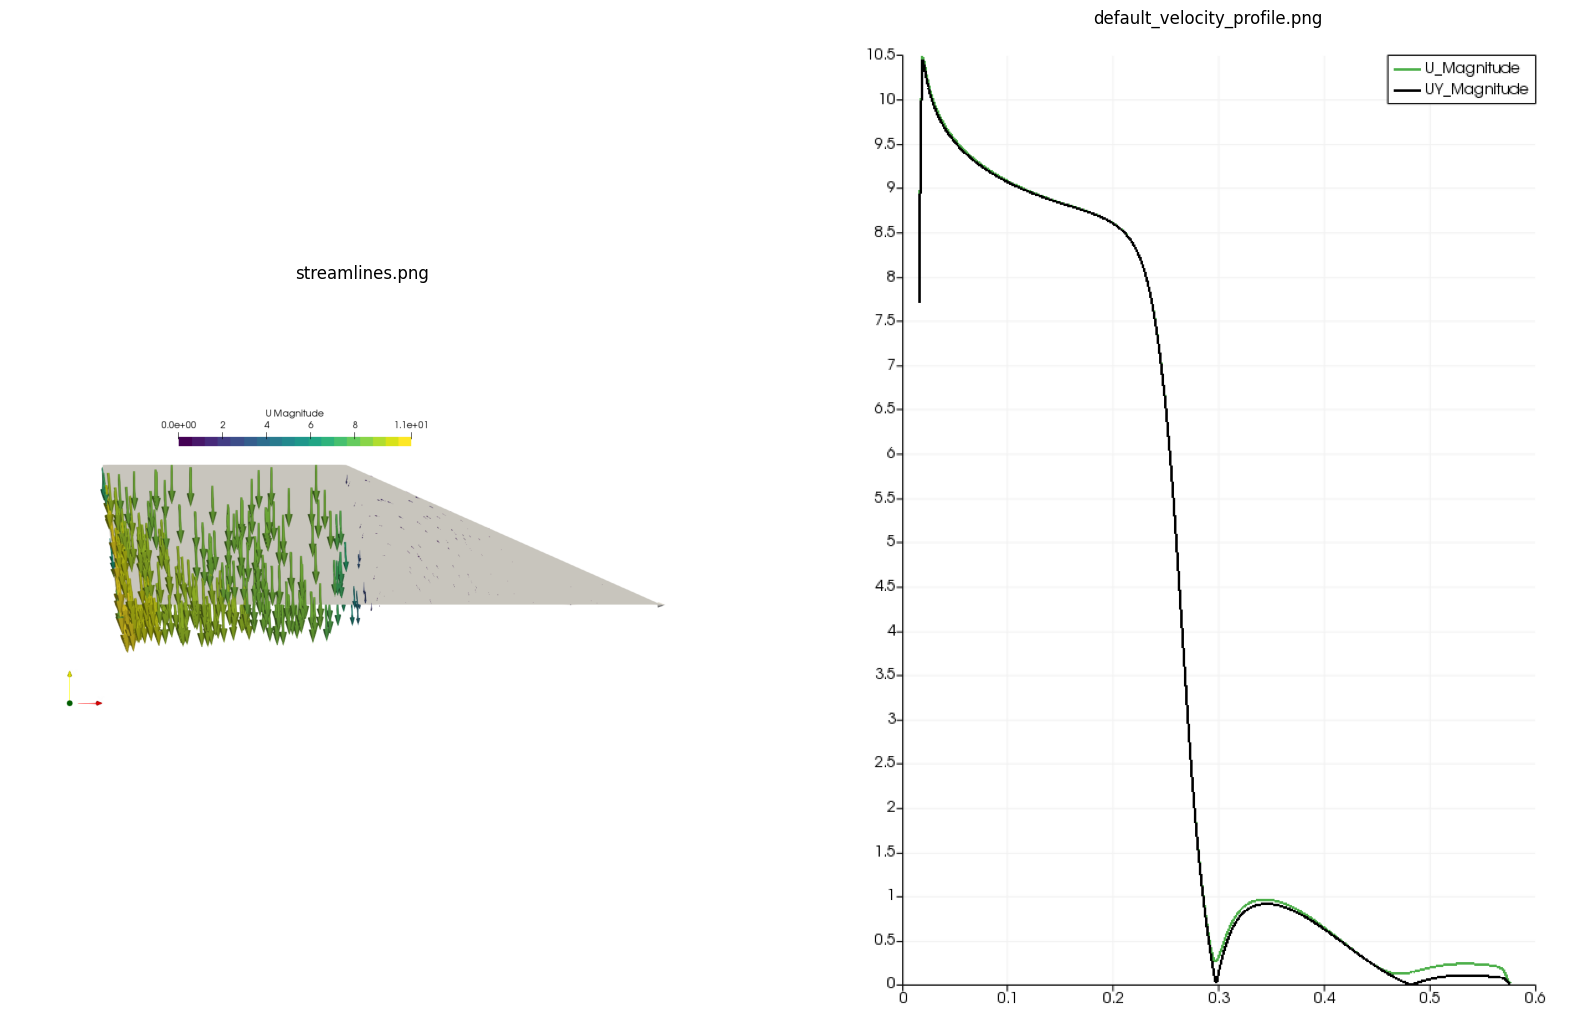

In [65]:
# Specify the directory where your CSV files are located
folder_path = '/home/affu5154/OpenFOAM/affu5154-9/run/pygmsh/Mesh_gmsh/Header/data_files/CoV'

# List all CSV files in the directory
csv_files = sorted([file for file in os.listdir(folder_path) if file.endswith('.csv')])
print(csv_files)

CoV_inlet= []; CoV_outlet = []; UI_outlet = []; UI_inlet = []; Av_out_vels = [];


# Read the first CSV file with the full path

df = pd.read_csv(os.path.join(folder_path, csv_files[2]))
inlet_y_velocity = df.iloc[:,0]
outlet_velocity = df.iloc[:,1]
outlet_y_velocity = extract_y_component(outlet_velocity, 1)
outlet_x_velocity = extract_y_component(outlet_velocity, 0)
vel_mag = np.sqrt(outlet_y_velocity**2)

CoV_outlet.append(np.abs(statistics.stdev(vel_mag) / np.mean(vel_mag)))
CoV_inlet.append(np.abs(statistics.stdev(inlet_y_velocity) / np.mean(inlet_y_velocity)))
UI_outlet.append(np.abs(1-CoV_outlet[-1]))
UI_inlet.append(np.abs(1-CoV_inlet[-1]))
Av_out_vels.append(np.mean(vel_mag))


df = pd.read_csv(os.path.join(folder_path, csv_files[6]))
inlet_y_velocity = df.iloc[:,0]
outlet_velocity = df.iloc[:,1]
outlet_y_velocity = extract_y_component(outlet_velocity, 1)
outlet_x_velocity = extract_y_component(outlet_velocity, 0)
vel_mag = np.sqrt(outlet_y_velocity**2)

CoV_outlet.append(np.abs(statistics.stdev(vel_mag) / np.mean(vel_mag)))
CoV_inlet.append(np.abs(statistics.stdev(inlet_y_velocity) / np.mean(inlet_y_velocity)))
UI_outlet.append(np.abs(1-CoV_outlet[-1]))
UI_inlet.append(np.abs(1-CoV_inlet[-1]))
Av_out_vels.append(np.mean(vel_mag))



df = pd.read_csv(os.path.join(folder_path, csv_files[19]))
inlet_y_velocity = df.iloc[:,0]
outlet_velocity = df.iloc[:,1]
outlet_y_velocity = extract_y_component(outlet_velocity, 1)
outlet_x_velocity = extract_y_component(outlet_velocity, 0)
vel_mag = np.sqrt(outlet_y_velocity**2)

CoV_outlet.append(np.abs(statistics.stdev(vel_mag) / np.mean(vel_mag)))
CoV_inlet.append(np.abs(statistics.stdev(inlet_y_velocity) / np.mean(inlet_y_velocity)))
UI_outlet.append(np.abs(1-CoV_outlet[-1]))
UI_inlet.append(np.abs(1-CoV_inlet[-1]))
Av_out_vels.append(np.mean(vel_mag))



# Convert each element to a standard Python float
CoV_inlet = [float(value) for value in CoV_inlet]; CoV_outlet = [float(value) for value in CoV_outlet]
UI_inlet = [float(value) for value in UI_inlet]; UI_outlet = [float(value) for value in UI_outlet]

print("\n"*2)

names = ["27k_simple", "47k", "9k"]

df = pd.DataFrame({
    "Name": names,
    "CoV inlet": CoV_inlet,
    "CoV outlet": CoV_outlet,
    "UI inlet": UI_inlet,
    "UI outlet": UI_outlet,
    "Averaged outlet |U|": Av_out_vels
})

print(df)


# Specify the directory where your PNG files are located
image_dir = '/home/affu5154/OpenFOAM/affu5154-9/run/pygmsh/Mesh_gmsh/Header/95k'
# List all files in the folder
files_image = os.listdir(image_dir)
# Filter out PNG files
png_files = sorted([f for f in files_image if f.endswith('.png')], reverse=False)
images = []

# Load the images and store them in the array
for png_file in png_files:
    full_image_path = os.path.join(image_dir, png_file)  # Use a new variable to store the full path
    image = Image.open(full_image_path)
    images.append(np.array(image))

fig, axes = plt.subplots(1, 2, figsize=(20, 20))  # Adjust the figsize as needed

# Ensure axes is iterable
if not isinstance(axes, (list, np.ndarray)):
    axes = [axes]
image_indices = [3, 1]

# Display the specific images on each subplot
for ax, image_index in zip(axes, image_indices):
    ax.imshow(images[image_index])
    ax.axis('off')  # Hide the axis
    ax.set_title(png_files[image_index])  # Set the title to the filename

plt.show()

#### Optimized Trials

#### Straight Vanes

##### 1 vanes

['10_straight_vanes_2.0.csv', '1_straight_vanes_2.0.csv', '27k_simple.csv', '2_straight_vanes_2.0.csv', '3_curved_vanes_2.0.csv', '3_straight_vanes_1.0.csv', '47k.csv', '4_curved_vanes_2.0.csv', '4_straight_vanes_2.0.csv', '5_curved_vanes_2.0.csv', '5_partial13rd_curved_2.0.csv', '5_partial13rd_straight_2.0.csv', '5_partial23rd_curved_2.0.csv', '5_partial23rd_straight_2.0.csv', '5_straight_vanes_2.0.csv', '6_straight_vanes_2.0.csv', '7_straight_vanes_2.0.csv', '8_straight_vanes_2.0.csv', '9_straight_vanes_2.0.csv', '9k.csv']



       Name  CoV outlet  UI outlet  Average |U|
0  Outlet 1    0.924594   0.075406     4.346812
1  Outlet 2    1.237290   0.237290     3.771504
2   Overall    1.073134   0.073134     4.057620



Overall standard deviation at outlet:  4.354368109856015


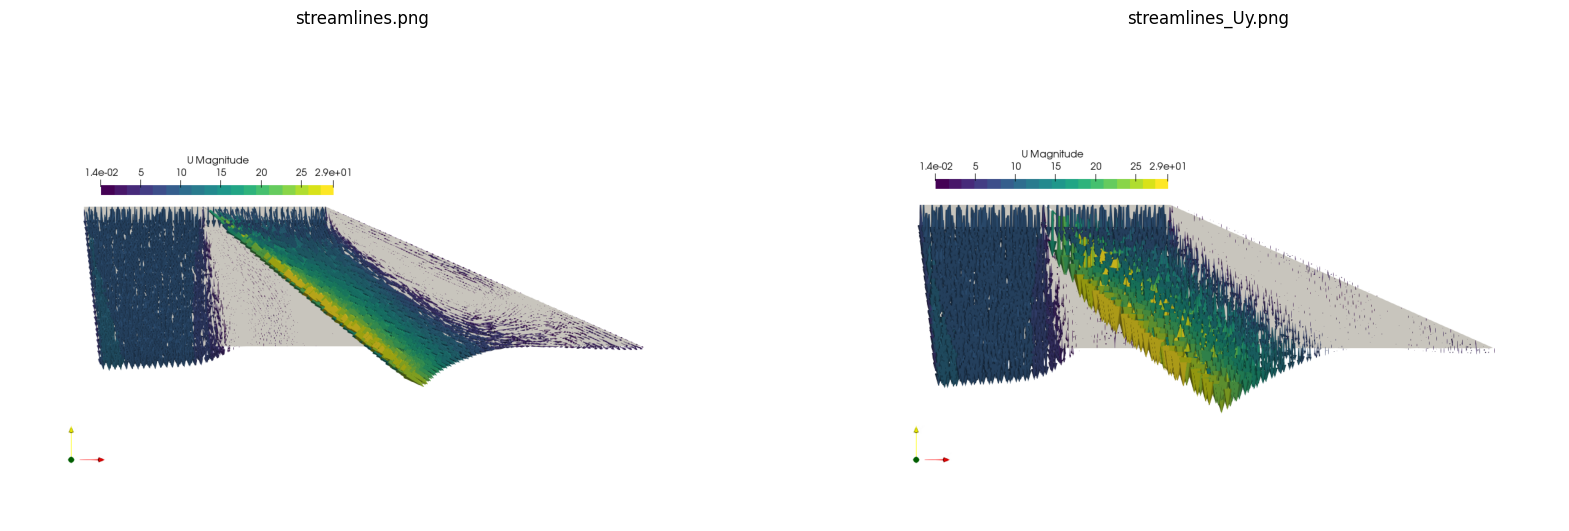

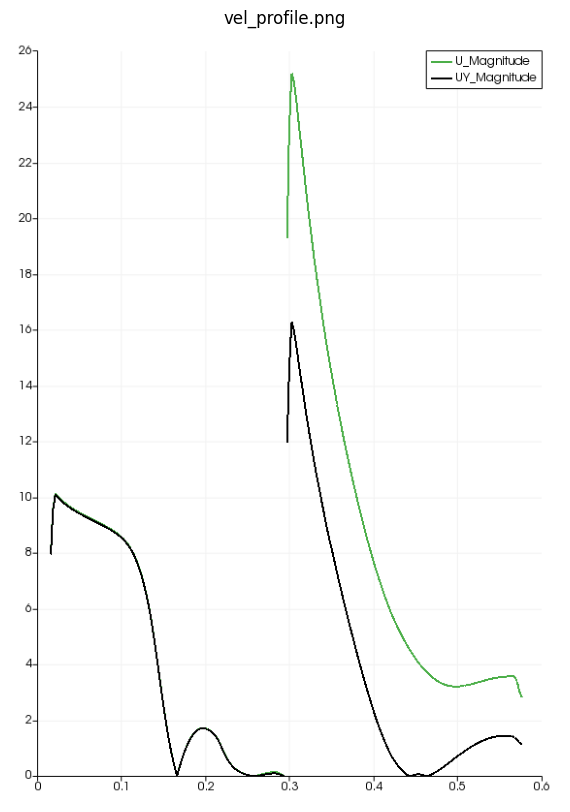

In [66]:
CoV_outlets = []; UI_outlets = []; averaged_velocities = [];
print(csv_files)
df = pd.read_csv(os.path.join(folder_path, csv_files[1]))


outlet_1= df.iloc[0:93,0]
outlet_y = extract_y_component(outlet_1, 1)
outlet_x = extract_y_component(outlet_1, 0)
vel_mag = np.sqrt(outlet_y**2)
CoV_outlets.append(np.abs(statistics.stdev(vel_mag) / np.mean(vel_mag)))
UI_outlets.append(np.abs(1-CoV_outlets[-1]))
averaged_velocities.append(np.mean(vel_mag))


outlet_2 = df.iloc[0:94,1] 
outlet_y = extract_y_component(outlet_2, 1) 
outlet_x = extract_y_component(outlet_2, 0)
vel_mag = np.sqrt(outlet_y**2)
CoV_outlets.append(np.abs(statistics.stdev(vel_mag) / np.mean(vel_mag)))
UI_outlets.append(np.abs(1-CoV_outlets[-1]))
averaged_velocities.append(np.mean(vel_mag))



outlet_overall = df.iloc[0:187,2]
outlet_y = extract_y_component(outlet_overall, 1)
outlet_x = extract_y_component(outlet_overall, 0)
vel_mag = np.sqrt(outlet_y**2)
CoV_outlets.append(np.abs(statistics.stdev(vel_mag) / np.mean(vel_mag)))
UI_outlets.append(np.abs(1-CoV_outlets[-1]))
averaged_velocities.append(np.mean(vel_mag))
std_dev = statistics.stdev(vel_mag)

# Convert each element to a standard Python float
CoV_outlets = [float(value) for value in CoV_outlets];
UI_outlets = [float(value) for value in UI_outlets];
print("\n"*2)
names = ["Outlet 1", "Outlet 2", "Overall"]

df = pd.DataFrame({
    "Name": names,
    "CoV outlet": CoV_outlets,
    "UI outlet": UI_outlets, 
    "Average |U|": averaged_velocities
})

print(df)
print("\n"*2)
print("Overall standard deviation at outlet: ", std_dev)




# Specify the directory where your PNG files are located
image_dir = '/home/affu5154/OpenFOAM/affu5154-9/run/pygmsh/Mesh_gmsh/Header/Optimized_trials/1vanes_2.0'
# List all files in the folder
files_image = os.listdir(image_dir)
# Filter out PNG files
png_files = sorted([f for f in files_image if f.endswith('.png')], reverse=False)
images = []

# Load the images and store them in the array
for png_file in png_files:
    full_image_path = os.path.join(image_dir, png_file)  # Use a new variable to store the full path
    image = Image.open(full_image_path)
    images.append(np.array(image))

fig, axes = plt.subplots(1, 2, figsize=(20, 20))  # Adjust the figsize as needed

# Ensure axes is iterable
if not isinstance(axes, (list, np.ndarray)):
    axes = [axes]
image_indices = [2, 3]

# Display the specific images on each subplot
for ax, image_index in zip(axes, image_indices):
    ax.imshow(images[image_index])
    ax.axis('off')  # Hide the axis
    ax.set_title(png_files[image_index])  # Set the title to the filename

plt.show()

fig, axes = plt.subplots(1, 1, figsize=(10, 10))  # Adjust the figsize as needed

# Ensure axes is iterable
if not isinstance(axes, (list, np.ndarray)):
    axes = [axes]
image_indices = [4]

# Display the specific images on each subplot
for ax, image_index in zip(axes, image_indices):
    ax.imshow(images[image_index])
    ax.axis('off')  # Hide the axis
    ax.set_title(png_files[image_index])  # Set the title to the filename

plt.show()

##### 2 vanes

['10_straight_vanes_2.0.csv', '1_straight_vanes_2.0.csv', '27k_simple.csv', '2_straight_vanes_2.0.csv', '3_curved_vanes_2.0.csv', '3_straight_vanes_1.0.csv', '47k.csv', '4_curved_vanes_2.0.csv', '4_straight_vanes_2.0.csv', '5_curved_vanes_2.0.csv', '5_partial13rd_curved_2.0.csv', '5_partial13rd_straight_2.0.csv', '5_partial23rd_curved_2.0.csv', '5_partial23rd_straight_2.0.csv', '5_straight_vanes_2.0.csv', '6_straight_vanes_2.0.csv', '7_straight_vanes_2.0.csv', '8_straight_vanes_2.0.csv', '9_straight_vanes_2.0.csv', '9k.csv']



       Name  CoV outlet  UI outlet  Average |U|
0  Outlet 1    0.854877   0.145123     4.419010
1  Outlet 2    1.148531   0.148531     3.874815
2  Outlet 3    1.064279   0.064279     3.746570
3   Overall    1.013860   0.013860     4.011352



Overall standard deviation at outlet:  4.066949717437157


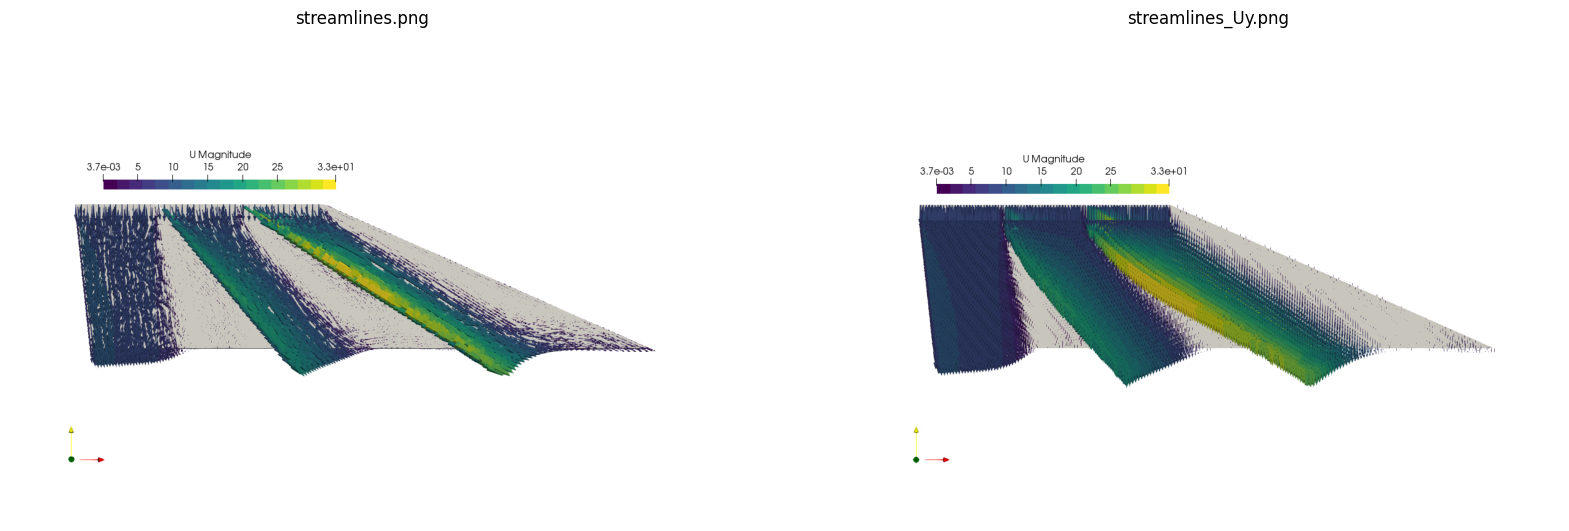

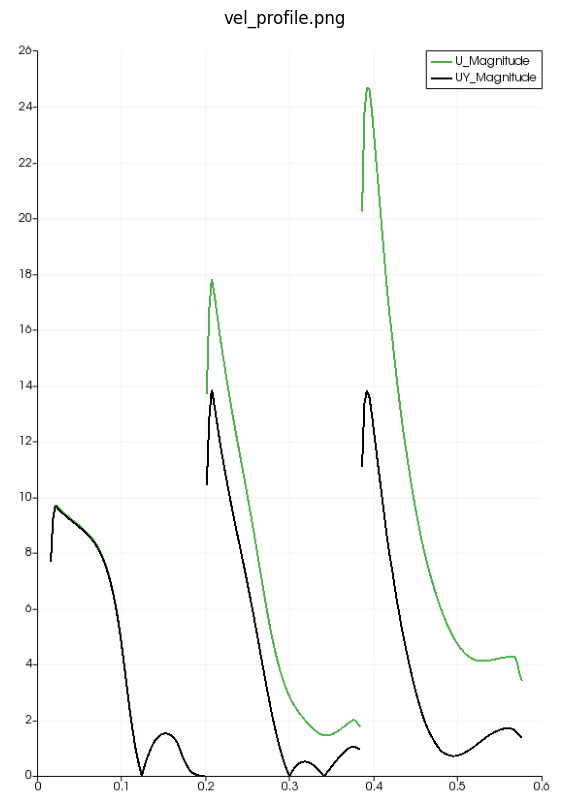

In [67]:
CoV_outlets = []; UI_outlets = []; averaged_velocities = [];
print(csv_files)
df = pd.read_csv(os.path.join(folder_path, csv_files[3]))


outlet_1= df.iloc[0:62,0]
outlet_y = extract_y_component(outlet_1, 1)
outlet_x = extract_y_component(outlet_1, 0)
vel_mag = np.sqrt(outlet_y**2)
CoV_outlets.append(np.abs(statistics.stdev(vel_mag) / np.mean(vel_mag)))
UI_outlets.append(np.abs(1-CoV_outlets[-1]))
averaged_velocities.append(np.mean(vel_mag))


outlet_2 = df.iloc[0:61,1] 
outlet_y = extract_y_component(outlet_2, 1) 
outlet_x = extract_y_component(outlet_2, 0)
vel_mag = np.sqrt(outlet_y**2)
CoV_outlets.append(np.abs(statistics.stdev(vel_mag) / np.mean(vel_mag)))
UI_outlets.append(np.abs(1-CoV_outlets[-1]))
averaged_velocities.append(np.mean(vel_mag))


outlet_3 = df.iloc[0:64,2];
outlet_y = extract_y_component(outlet_3, 1)
outlet_x = extract_y_component(outlet_3, 0)
vel_mag = np.sqrt(outlet_y**2)
CoV_outlets.append(np.abs(statistics.stdev(vel_mag) / np.mean(vel_mag)))
UI_outlets.append(np.abs(1-CoV_outlets[-1]))
averaged_velocities.append(np.mean(vel_mag))


outlet_overall = df.iloc[0:187,3]
outlet_y = extract_y_component(outlet_overall, 1)
outlet_x = extract_y_component(outlet_overall, 0)
vel_mag = np.sqrt(outlet_y**2)
CoV_outlets.append(np.abs(statistics.stdev(vel_mag) / np.mean(vel_mag)))
UI_outlets.append(np.abs(1-CoV_outlets[-1]))
averaged_velocities.append(np.mean(vel_mag))
std_dev = statistics.stdev(vel_mag)

# Convert each element to a standard Python float
CoV_outlets = [float(value) for value in CoV_outlets];
UI_outlets = [float(value) for value in UI_outlets];
print("\n"*2)
names = ["Outlet 1", "Outlet 2", "Outlet 3", "Overall"]

df = pd.DataFrame({
    "Name": names,
    "CoV outlet": CoV_outlets,
    "UI outlet": UI_outlets, 
    "Average |U|": averaged_velocities
})

print(df)
print("\n"*2)
print("Overall standard deviation at outlet: ", std_dev)




# Specify the directory where your PNG files are located
image_dir = '/home/affu5154/OpenFOAM/affu5154-9/run/pygmsh/Mesh_gmsh/Header/Optimized_trials/2vanes_2.0'
# List all files in the folder
files_image = os.listdir(image_dir)
# Filter out PNG files
png_files = sorted([f for f in files_image if f.endswith('.png')], reverse=False)
images = []

# Load the images and store them in the array
for png_file in png_files:
    full_image_path = os.path.join(image_dir, png_file)  # Use a new variable to store the full path
    image = Image.open(full_image_path)
    images.append(np.array(image))

fig, axes = plt.subplots(1, 2, figsize=(20, 20))  # Adjust the figsize as needed

# Ensure axes is iterable
if not isinstance(axes, (list, np.ndarray)):
    axes = [axes]
image_indices = [2, 3]

# Display the specific images on each subplot
for ax, image_index in zip(axes, image_indices):
    ax.imshow(images[image_index])
    ax.axis('off')  # Hide the axis
    ax.set_title(png_files[image_index])  # Set the title to the filename

plt.show()

fig, axes = plt.subplots(1, 1, figsize=(10, 10))  # Adjust the figsize as needed

# Ensure axes is iterable
if not isinstance(axes, (list, np.ndarray)):
    axes = [axes]
image_indices = [4]

# Display the specific images on each subplot
for ax, image_index in zip(axes, image_indices):
    ax.imshow(images[image_index])
    ax.axis('off')  # Hide the axis
    ax.set_title(png_files[image_index])  # Set the title to the filename

plt.show()

##### 3 vanes

['10_straight_vanes_2.0.csv', '1_straight_vanes_2.0.csv', '27k_simple.csv', '2_straight_vanes_2.0.csv', '3_curved_vanes_2.0.csv', '3_straight_vanes_1.0.csv', '47k.csv', '4_curved_vanes_2.0.csv', '4_straight_vanes_2.0.csv', '5_curved_vanes_2.0.csv', '5_partial13rd_curved_2.0.csv', '5_partial13rd_straight_2.0.csv', '5_partial23rd_curved_2.0.csv', '5_partial23rd_straight_2.0.csv', '5_straight_vanes_2.0.csv', '6_straight_vanes_2.0.csv', '7_straight_vanes_2.0.csv', '8_straight_vanes_2.0.csv', '9_straight_vanes_2.0.csv', '9k.csv']



       Name  CoV outlet  UI outlet  Average |U|
0  Outlet 1    0.828703   0.171297     4.145487
1  Outlet 2    1.098282   0.098282     3.805376
2  Outlet 3    1.069613   0.069613     3.699601
3  Outlet 4    0.873495   0.126505     3.760680
4   Overall    0.960624   0.039376     3.853864



Overall standard deviation at outlet:  3.7021148824056587


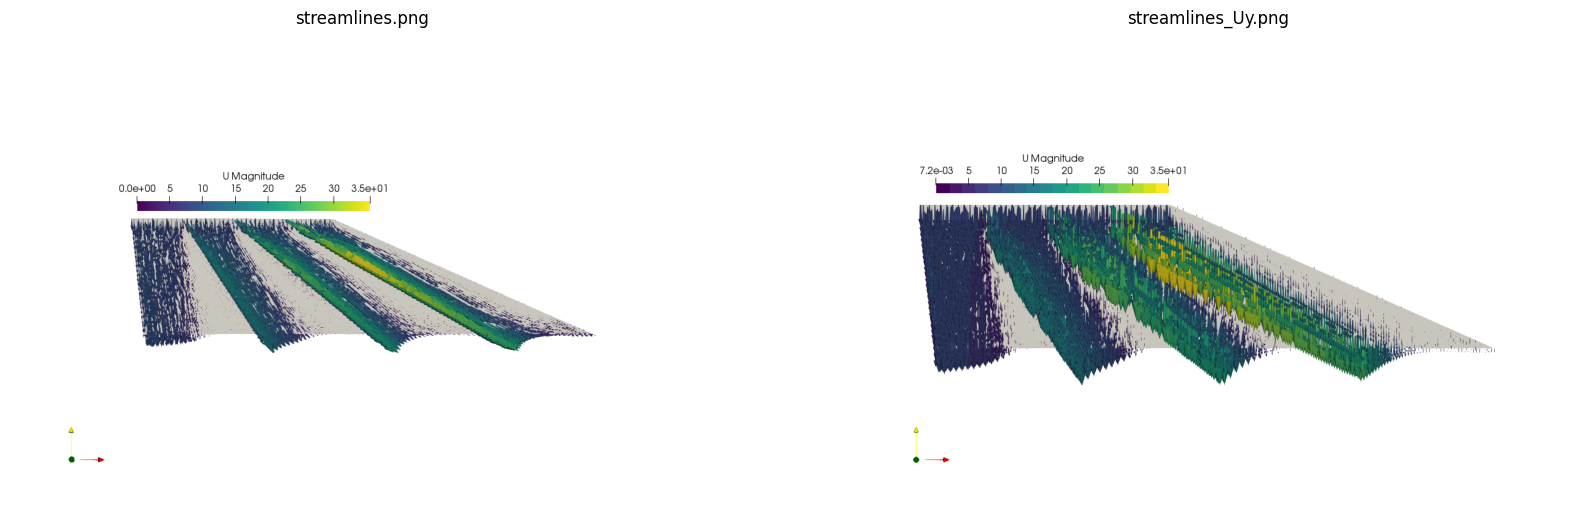

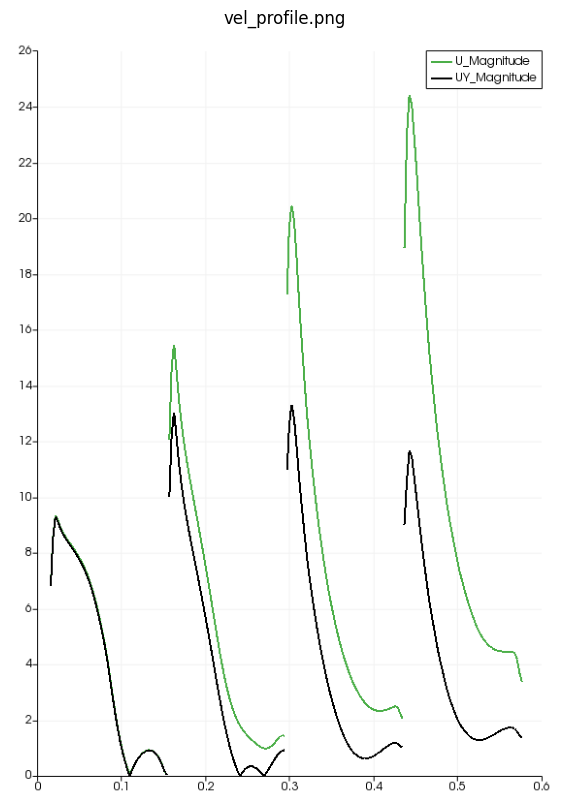

In [68]:
CoV_outlets = []; UI_outlets = []; averaged_velocities = [];
print(csv_files)
df = pd.read_csv(os.path.join(folder_path, csv_files[5]))


outlet_1= df.iloc[0:47,0]
outlet_y = extract_y_component(outlet_1, 1)
outlet_x = extract_y_component(outlet_1, 0)
vel_mag = np.sqrt(outlet_y**2)
CoV_outlets.append(np.abs(statistics.stdev(vel_mag) / np.mean(vel_mag)))
UI_outlets.append(np.abs(1-CoV_outlets[-1]))
averaged_velocities.append(np.mean(vel_mag))


outlet_2 = df.iloc[0:46,1] 
outlet_y = extract_y_component(outlet_2, 1) 
outlet_x = extract_y_component(outlet_2, 0)
vel_mag = np.sqrt(outlet_y**2)
CoV_outlets.append(np.abs(statistics.stdev(vel_mag) / np.mean(vel_mag)))
UI_outlets.append(np.abs(1-CoV_outlets[-1]))
averaged_velocities.append(np.mean(vel_mag))


outlet_3 = df.iloc[0:46,2];
outlet_y = extract_y_component(outlet_3, 1)
outlet_x = extract_y_component(outlet_3, 0)
vel_mag = np.sqrt(outlet_y**2)
CoV_outlets.append(np.abs(statistics.stdev(vel_mag) / np.mean(vel_mag)))
UI_outlets.append(np.abs(1-CoV_outlets[-1]))
averaged_velocities.append(np.mean(vel_mag))


outlet_4 = df.iloc[0:47,3]
outlet_y = extract_y_component(outlet_4, 1)
outlet_x = extract_y_component(outlet_4, 0)
vel_mag = np.sqrt(outlet_y**2)
CoV_outlets.append(np.abs(statistics.stdev(vel_mag) / np.mean(vel_mag)))
UI_outlets.append(np.abs(1-CoV_outlets[-1]))
averaged_velocities.append(np.mean(vel_mag))


outlet_overall = df.iloc[0:186,4]
outlet_y = extract_y_component(outlet_overall, 1)
outlet_x = extract_y_component(outlet_overall, 0)
vel_mag = np.sqrt(outlet_y**2)
CoV_outlets.append(np.abs(statistics.stdev(vel_mag) / np.mean(vel_mag)))
UI_outlets.append(np.abs(1-CoV_outlets[-1]))
averaged_velocities.append(np.mean(vel_mag))
std_dev = statistics.stdev(vel_mag)

# Convert each element to a standard Python float
CoV_outlets = [float(value) for value in CoV_outlets];
UI_outlets = [float(value) for value in UI_outlets];
print("\n"*2)
names = ["Outlet 1", "Outlet 2", "Outlet 3", "Outlet 4", "Overall"]

df = pd.DataFrame({
    "Name": names,
    "CoV outlet": CoV_outlets,
    "UI outlet": UI_outlets, 
    "Average |U|": averaged_velocities
})

print(df)
print("\n"*2)
print("Overall standard deviation at outlet: ", std_dev)




# Specify the directory where your PNG files are located
image_dir = '/home/affu5154/OpenFOAM/affu5154-9/run/pygmsh/Mesh_gmsh/Header/Optimized_trials/3vanes_1.0'
# List all files in the folder
files_image = os.listdir(image_dir)
# Filter out PNG files
png_files = sorted([f for f in files_image if f.endswith('.png')], reverse=False)
images = []

# Load the images and store them in the array
for png_file in png_files:
    full_image_path = os.path.join(image_dir, png_file)  # Use a new variable to store the full path
    image = Image.open(full_image_path)
    images.append(np.array(image))

fig, axes = plt.subplots(1, 2, figsize=(20, 20))  # Adjust the figsize as needed

# Ensure axes is iterable
if not isinstance(axes, (list, np.ndarray)):
    axes = [axes]
image_indices = [2, 3]

# Display the specific images on each subplot
for ax, image_index in zip(axes, image_indices):
    ax.imshow(images[image_index])
    ax.axis('off')  # Hide the axis
    ax.set_title(png_files[image_index])  # Set the title to the filename

plt.show()

fig, axes = plt.subplots(1, 1, figsize=(10, 10))  # Adjust the figsize as needed

# Ensure axes is iterable
if not isinstance(axes, (list, np.ndarray)):
    axes = [axes]
image_indices = [4]

# Display the specific images on each subplot
for ax, image_index in zip(axes, image_indices):
    ax.imshow(images[image_index])
    ax.axis('off')  # Hide the axis
    ax.set_title(png_files[image_index])  # Set the title to the filename

plt.show()

##### 4 vanes

['10_straight_vanes_2.0.csv', '1_straight_vanes_2.0.csv', '27k_simple.csv', '2_straight_vanes_2.0.csv', '3_curved_vanes_2.0.csv', '3_straight_vanes_1.0.csv', '47k.csv', '4_curved_vanes_2.0.csv', '4_straight_vanes_2.0.csv', '5_curved_vanes_2.0.csv', '5_partial13rd_curved_2.0.csv', '5_partial13rd_straight_2.0.csv', '5_partial23rd_curved_2.0.csv', '5_partial23rd_straight_2.0.csv', '5_straight_vanes_2.0.csv', '6_straight_vanes_2.0.csv', '7_straight_vanes_2.0.csv', '8_straight_vanes_2.0.csv', '9_straight_vanes_2.0.csv', '9k.csv']



       Name  CoV outlet  UI outlet  Average |U|
0  Outlet 1    0.722010   0.277990     3.773459
1  Outlet 2    0.954791   0.045209     3.692550
2  Outlet 3    0.862842   0.137158     3.685595
3  Outlet 4    0.809217   0.190783     3.658578
4  Outlet 5    0.604446   0.395554     3.744517
5   Overall    0.788516   0.211484     3.711120



Overall standard deviation at outlet:  2.92627811106235


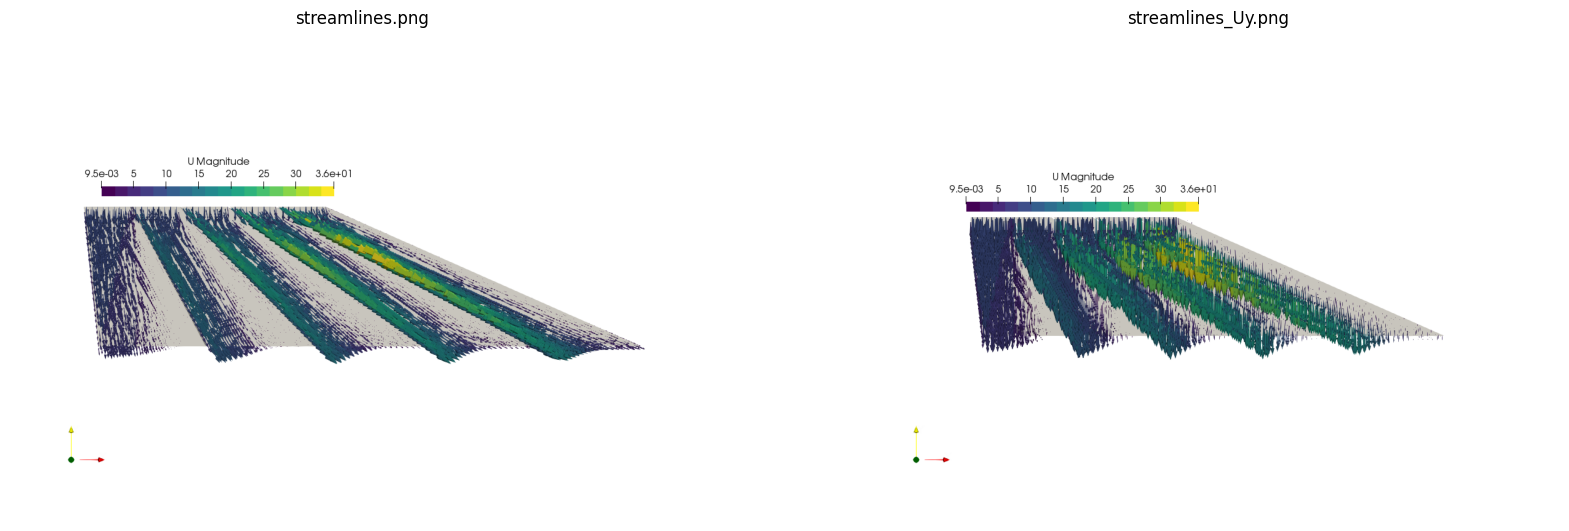

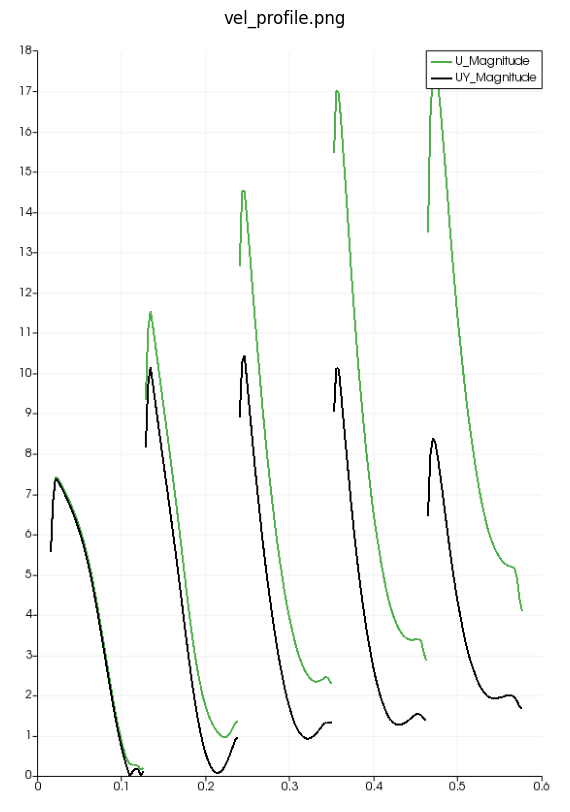

In [69]:
CoV_outlets = []; UI_outlets = []; averaged_velocities = [];
print(csv_files)
df = pd.read_csv(os.path.join(folder_path, csv_files[8]))


outlet_1= df.iloc[0:37,0]
outlet_y = extract_y_component(outlet_1, 1)
outlet_x = extract_y_component(outlet_1, 0)
vel_mag = np.sqrt(outlet_y**2)
CoV_outlets.append(np.abs(statistics.stdev(vel_mag) / np.mean(vel_mag)))
UI_outlets.append(np.abs(1-CoV_outlets[-1]))
averaged_velocities.append(np.mean(vel_mag))


outlet_2 = df.iloc[0:37,1] 
outlet_y = extract_y_component(outlet_2, 1) 
outlet_x = extract_y_component(outlet_2, 0)
vel_mag = np.sqrt(outlet_y**2)
CoV_outlets.append(np.abs(statistics.stdev(vel_mag) / np.mean(vel_mag)))
UI_outlets.append(np.abs(1-CoV_outlets[-1]))
averaged_velocities.append(np.mean(vel_mag))


outlet_3 = df.iloc[0:37,2];
outlet_y = extract_y_component(outlet_3, 1)
outlet_x = extract_y_component(outlet_3, 0)
vel_mag = np.sqrt(outlet_y**2)
CoV_outlets.append(np.abs(statistics.stdev(vel_mag) / np.mean(vel_mag)))
UI_outlets.append(np.abs(1-CoV_outlets[-1]))
averaged_velocities.append(np.mean(vel_mag))


outlet_4 = df.iloc[0:37,3]
outlet_y = extract_y_component(outlet_4, 1)
outlet_x = extract_y_component(outlet_4, 0)
vel_mag = np.sqrt(outlet_y**2)
CoV_outlets.append(np.abs(statistics.stdev(vel_mag) / np.mean(vel_mag)))
UI_outlets.append(np.abs(1-CoV_outlets[-1]))
averaged_velocities.append(np.mean(vel_mag))


outlet_5 = df.iloc[0:38,4]
outlet_y = extract_y_component(outlet_5, 1) 
outlet_x = extract_y_component(outlet_5, 0)
vel_mag = np.sqrt(outlet_y**2)
CoV_outlets.append(np.abs(statistics.stdev(vel_mag) / np.mean(vel_mag)))
UI_outlets.append(np.abs(1-CoV_outlets[-1]))
averaged_velocities.append(np.mean(vel_mag))



outlet_overall = df.iloc[0:186,5]
outlet_y = extract_y_component(outlet_overall, 1)
outlet_x = extract_y_component(outlet_overall, 0)
vel_mag = np.sqrt(outlet_y**2)
CoV_outlets.append(np.abs(statistics.stdev(vel_mag) / np.mean(vel_mag)))
UI_outlets.append(np.abs(1-CoV_outlets[-1]))
averaged_velocities.append(np.mean(vel_mag))
std_dev = statistics.stdev(vel_mag)

# Convert each element to a standard Python float
CoV_outlets = [float(value) for value in CoV_outlets];
UI_outlets = [float(value) for value in UI_outlets];

names = ["Outlet 1", "Outlet 2", "Outlet 3", "Outlet 4", "Outlet 5", "Overall"]
print("\n"*2)
df = pd.DataFrame({
    "Name": names,
    "CoV outlet": CoV_outlets,
    "UI outlet": UI_outlets, 
    "Average |U|": averaged_velocities
})

print(df)
print("\n"*2)
print("Overall standard deviation at outlet: ", std_dev)




# Specify the directory where your PNG files are located
image_dir = '/home/affu5154/OpenFOAM/affu5154-9/run/pygmsh/Mesh_gmsh/Header/Optimized_trials/4vanes_2.0'
# List all files in the folder
files_image = os.listdir(image_dir)
# Filter out PNG files
png_files = sorted([f for f in files_image if f.endswith('.png')], reverse=False)
images = []

# Load the images and store them in the array
for png_file in png_files:
    full_image_path = os.path.join(image_dir, png_file)  # Use a new variable to store the full path
    image = Image.open(full_image_path)
    images.append(np.array(image))

fig, axes = plt.subplots(1, 2, figsize=(20, 20))  # Adjust the figsize as needed

# Ensure axes is iterable
if not isinstance(axes, (list, np.ndarray)):
    axes = [axes]
image_indices = [2, 3]

# Display the specific images on each subplot
for ax, image_index in zip(axes, image_indices):
    ax.imshow(images[image_index])
    ax.axis('off')  # Hide the axis
    ax.set_title(png_files[image_index])  # Set the title to the filename

plt.show()

fig, axes = plt.subplots(1, 1, figsize=(10, 10))  # Adjust the figsize as needed

# Ensure axes is iterable
if not isinstance(axes, (list, np.ndarray)):
    axes = [axes]
image_indices = [4]

# Display the specific images on each subplot
for ax, image_index in zip(axes, image_indices):
    ax.imshow(images[image_index])
    ax.axis('off')  # Hide the axis
    ax.set_title(png_files[image_index])  # Set the title to the filename

plt.show()

##### 5 vanes

['10_straight_vanes_2.0.csv', '1_straight_vanes_2.0.csv', '27k_simple.csv', '2_straight_vanes_2.0.csv', '3_curved_vanes_2.0.csv', '3_straight_vanes_1.0.csv', '47k.csv', '4_curved_vanes_2.0.csv', '4_straight_vanes_2.0.csv', '5_curved_vanes_2.0.csv', '5_partial13rd_curved_2.0.csv', '5_partial13rd_straight_2.0.csv', '5_partial23rd_curved_2.0.csv', '5_partial23rd_straight_2.0.csv', '5_straight_vanes_2.0.csv', '6_straight_vanes_2.0.csv', '7_straight_vanes_2.0.csv', '8_straight_vanes_2.0.csv', '9_straight_vanes_2.0.csv', '9k.csv']



       Name  CoV outlet  UI outlet  Average |U|
0  Outlet 1    0.448092   0.551908     3.731732
1  Outlet 2    0.762703   0.237297     3.673450
2  Outlet 3    0.779067   0.220933     3.668631
3  Outlet 4    0.721166   0.278834     3.666834
4  Outlet 5    0.534358   0.465642     3.661264
5  Outlet 6    0.488602   0.511398     3.743878
6   Overall    0.625957   0.374043     3.691248



Overall standard deviation at outlet:  2.3105638332256473


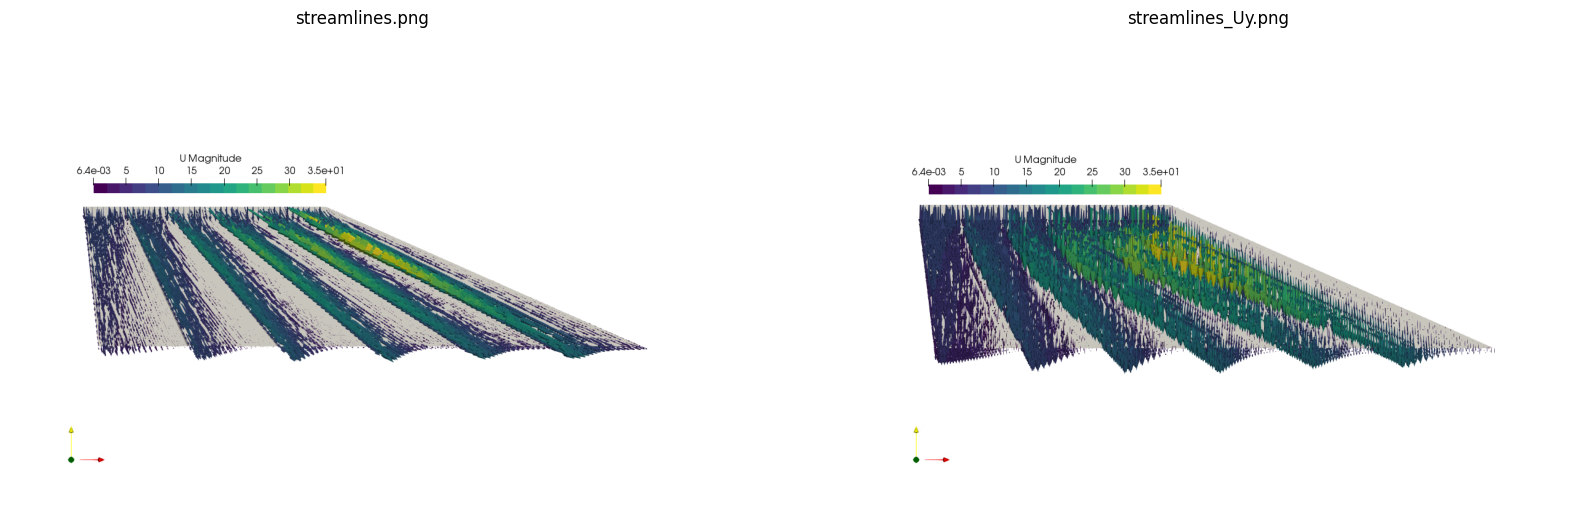

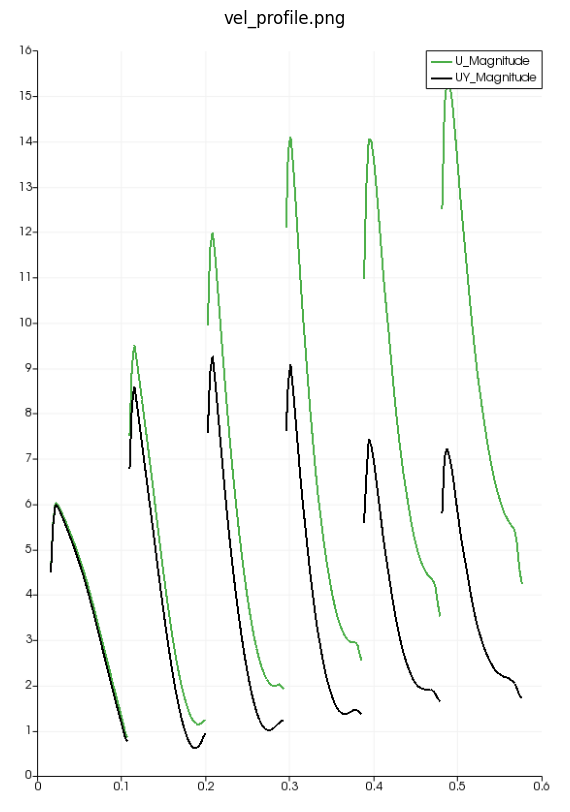

In [70]:
CoV_outlets = []; UI_outlets = []; averaged_velocities = [];
print(csv_files)
df = pd.read_csv(os.path.join(folder_path, csv_files[14]))


outlet_1= df.iloc[0:31,0]
outlet_y = extract_y_component(outlet_1, 1)
outlet_x = extract_y_component(outlet_1, 0)
vel_mag = np.sqrt(outlet_y**2)
CoV_outlets.append(np.abs(statistics.stdev(vel_mag) / np.mean(vel_mag)))
UI_outlets.append(np.abs(1-CoV_outlets[-1]))
averaged_velocities.append(np.mean(vel_mag))


outlet_2 = df.iloc[0:31,1] 
outlet_y = extract_y_component(outlet_2, 1) 
outlet_x = extract_y_component(outlet_2, 0)
vel_mag = np.sqrt(outlet_y**2)
CoV_outlets.append(np.abs(statistics.stdev(vel_mag) / np.mean(vel_mag)))
UI_outlets.append(np.abs(1-CoV_outlets[-1]))
averaged_velocities.append(np.mean(vel_mag))


outlet_3 = df.iloc[0:31,2];
outlet_y = extract_y_component(outlet_3, 1)
outlet_x = extract_y_component(outlet_3, 0)
vel_mag = np.sqrt(outlet_y**2)
CoV_outlets.append(np.abs(statistics.stdev(vel_mag) / np.mean(vel_mag)))
UI_outlets.append(np.abs(1-CoV_outlets[-1]))
averaged_velocities.append(np.mean(vel_mag))


outlet_4 = df.iloc[0:31,3]
outlet_y = extract_y_component(outlet_4, 1)
outlet_x = extract_y_component(outlet_4, 0)
vel_mag = np.sqrt(outlet_y**2)
CoV_outlets.append(np.abs(statistics.stdev(vel_mag) / np.mean(vel_mag)))
UI_outlets.append(np.abs(1-CoV_outlets[-1]))
averaged_velocities.append(np.mean(vel_mag))


outlet_5 = df.iloc[0:31,4]
outlet_y = extract_y_component(outlet_5, 1) 
outlet_x = extract_y_component(outlet_5, 0)
vel_mag = np.sqrt(outlet_y**2)
CoV_outlets.append(np.abs(statistics.stdev(vel_mag) / np.mean(vel_mag)))
UI_outlets.append(np.abs(1-CoV_outlets[-1]))
averaged_velocities.append(np.mean(vel_mag))


outlet_6 = df.iloc[0:32,5]
outlet_y = extract_y_component(outlet_6, 1)
outlet_x = extract_y_component(outlet_6, 0)
vel_mag = np.sqrt(outlet_y**2)
CoV_outlets.append(np.abs(statistics.stdev(vel_mag) / np.mean(vel_mag)))
UI_outlets.append(np.abs(1-CoV_outlets[-1]))
averaged_velocities.append(np.mean(vel_mag))


outlet_overall = df.iloc[0:187,6]
outlet_y = extract_y_component(outlet_overall, 1)
outlet_x = extract_y_component(outlet_overall, 0)
vel_mag = np.sqrt(outlet_y**2)
CoV_outlets.append(np.abs(statistics.stdev(vel_mag) / np.mean(vel_mag)))
UI_outlets.append(np.abs(1-CoV_outlets[-1]))
averaged_velocities.append(np.mean(vel_mag))
std_dev = statistics.stdev(vel_mag)

# Convert each element to a standard Python float
CoV_outlets = [float(value) for value in CoV_outlets];
UI_outlets = [float(value) for value in UI_outlets];

names = ["Outlet 1", "Outlet 2", "Outlet 3", "Outlet 4", "Outlet 5", "Outlet 6", "Overall"]
print("\n"*2)
df = pd.DataFrame({
    "Name": names,
    "CoV outlet": CoV_outlets,
    "UI outlet": UI_outlets, 
    "Average |U|": averaged_velocities
})

print(df)
print("\n"*2)
print("Overall standard deviation at outlet: ", std_dev)




# Specify the directory where your PNG files are located
image_dir = '/home/affu5154/OpenFOAM/affu5154-9/run/pygmsh/Mesh_gmsh/Header/Optimized_trials/5vanes_2.0'
# List all files in the folder
files_image = os.listdir(image_dir)
# Filter out PNG files
png_files = sorted([f for f in files_image if f.endswith('.png')], reverse=False)
images = []

# Load the images and store them in the array
for png_file in png_files:
    full_image_path = os.path.join(image_dir, png_file)  # Use a new variable to store the full path
    image = Image.open(full_image_path)
    images.append(np.array(image))

fig, axes = plt.subplots(1, 2, figsize=(20, 20))  # Adjust the figsize as needed

# Ensure axes is iterable
if not isinstance(axes, (list, np.ndarray)):
    axes = [axes]
image_indices = [4, 5]

# Display the specific images on each subplot
for ax, image_index in zip(axes, image_indices):
    ax.imshow(images[image_index])
    ax.axis('off')  # Hide the axis
    ax.set_title(png_files[image_index])  # Set the title to the filename

plt.show()

fig, axes = plt.subplots(1, 1, figsize=(10, 10))  # Adjust the figsize as needed

# Ensure axes is iterable
if not isinstance(axes, (list, np.ndarray)):
    axes = [axes]
image_indices = [6]

# Display the specific images on each subplot
for ax, image_index in zip(axes, image_indices):
    ax.imshow(images[image_index])
    ax.axis('off')  # Hide the axis
    ax.set_title(png_files[image_index])  # Set the title to the filename

plt.show()

##### 6 vanes

['10_straight_vanes_2.0.csv', '1_straight_vanes_2.0.csv', '27k_simple.csv', '2_straight_vanes_2.0.csv', '3_curved_vanes_2.0.csv', '3_straight_vanes_1.0.csv', '47k.csv', '4_curved_vanes_2.0.csv', '4_straight_vanes_2.0.csv', '5_curved_vanes_2.0.csv', '5_partial13rd_curved_2.0.csv', '5_partial13rd_straight_2.0.csv', '5_partial23rd_curved_2.0.csv', '5_partial23rd_straight_2.0.csv', '5_straight_vanes_2.0.csv', '6_straight_vanes_2.0.csv', '7_straight_vanes_2.0.csv', '8_straight_vanes_2.0.csv', '9_straight_vanes_2.0.csv', '9k.csv']



       Name  CoV outlet  UI outlet  Average |U|
0  Outlet 1    0.408639   0.591361     3.724784
1  Outlet 2    0.621661   0.378339     3.658508
2  Outlet 3    0.701204   0.298796     3.656357
3  Outlet 4    0.649447   0.350553     3.648225
4  Outlet 5    0.582629   0.417371     3.632620
5  Outlet 6    0.465808   0.534192     3.643995
6  Outlet 7    0.383579   0.616421     3.738418
7   Overall    0.544100   0.455900     3.691049



Overall standard deviation at o

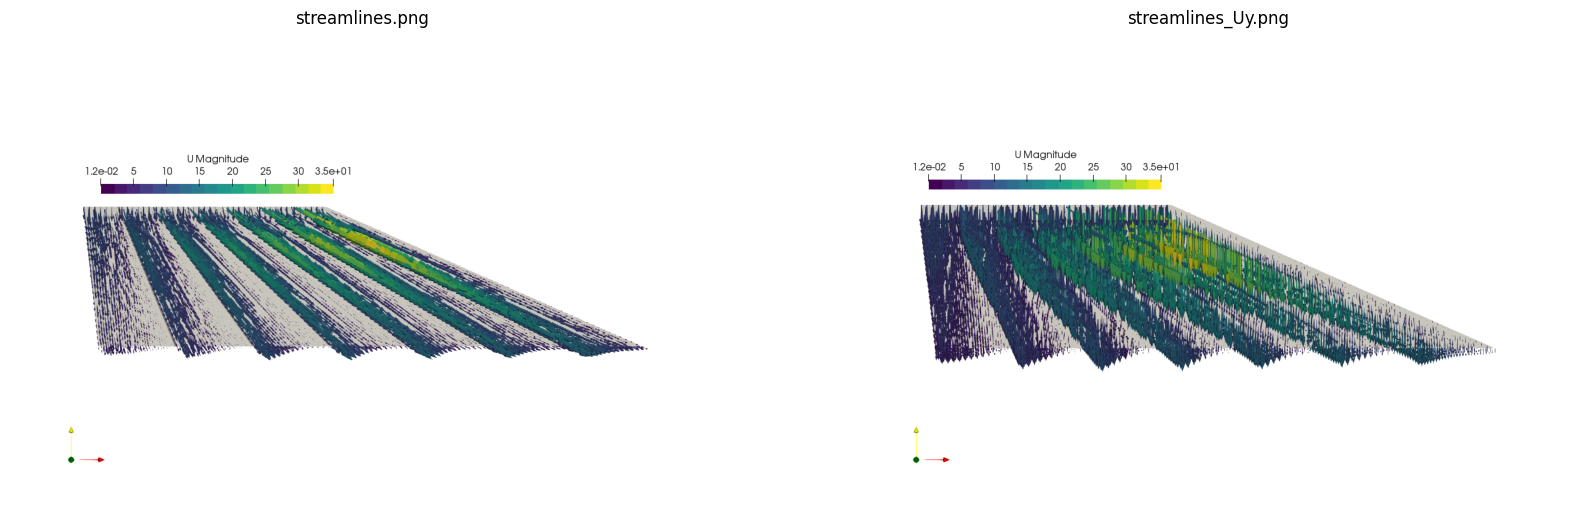

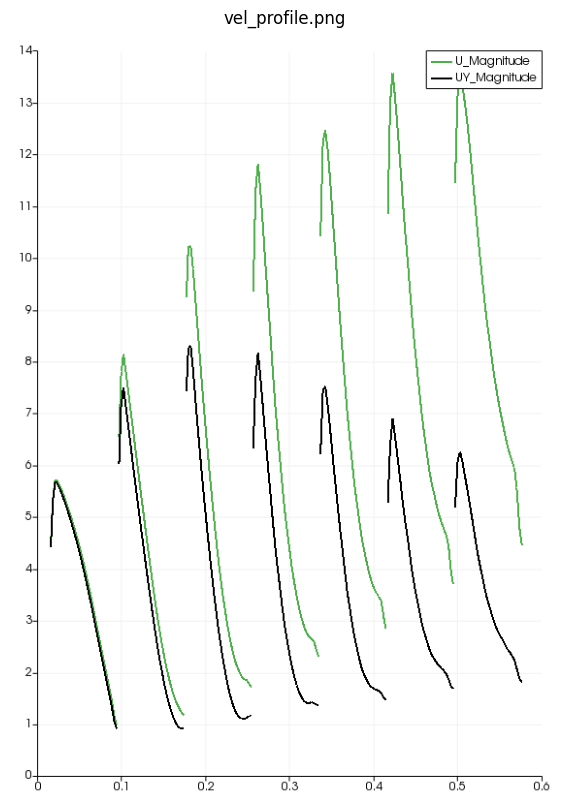

In [71]:
CoV_outlets = []; UI_outlets = []; averaged_velocities = [];
print(csv_files)
df = pd.read_csv(os.path.join(folder_path, csv_files[15]))


outlet_1= df.iloc[0:27,0]
outlet_y = extract_y_component(outlet_1, 1)
outlet_x = extract_y_component(outlet_1, 0)
vel_mag = np.sqrt(outlet_y**2)
CoV_outlets.append(np.abs(statistics.stdev(vel_mag) / np.mean(vel_mag)))
UI_outlets.append(np.abs(1-CoV_outlets[-1]))
averaged_velocities.append(np.mean(vel_mag))


outlet_2 = df.iloc[0:27,1] 
outlet_y = extract_y_component(outlet_2, 1) 
outlet_x = extract_y_component(outlet_2, 0)
vel_mag = np.sqrt(outlet_y**2)
CoV_outlets.append(np.abs(statistics.stdev(vel_mag) / np.mean(vel_mag)))
UI_outlets.append(np.abs(1-CoV_outlets[-1]))
averaged_velocities.append(np.mean(vel_mag))


outlet_3 = df.iloc[0:27,2];
outlet_y = extract_y_component(outlet_3, 1)
outlet_x = extract_y_component(outlet_3, 0)
vel_mag = np.sqrt(outlet_y**2)
CoV_outlets.append(np.abs(statistics.stdev(vel_mag) / np.mean(vel_mag)))
UI_outlets.append(np.abs(1-CoV_outlets[-1]))
averaged_velocities.append(np.mean(vel_mag))


outlet_4 = df.iloc[0:27,3]
outlet_y = extract_y_component(outlet_4, 1)
outlet_x = extract_y_component(outlet_4, 0)
vel_mag = np.sqrt(outlet_y**2)
CoV_outlets.append(np.abs(statistics.stdev(vel_mag) / np.mean(vel_mag)))
UI_outlets.append(np.abs(1-CoV_outlets[-1]))
averaged_velocities.append(np.mean(vel_mag))


outlet_5 = df.iloc[0:27,4]
outlet_y = extract_y_component(outlet_5, 1) 
outlet_x = extract_y_component(outlet_5, 0)
vel_mag = np.sqrt(outlet_y**2)
CoV_outlets.append(np.abs(statistics.stdev(vel_mag) / np.mean(vel_mag)))
UI_outlets.append(np.abs(1-CoV_outlets[-1]))
averaged_velocities.append(np.mean(vel_mag))


outlet_6 = df.iloc[0:27,5]
outlet_y = extract_y_component(outlet_6, 1)
outlet_x = extract_y_component(outlet_6, 0)
vel_mag = np.sqrt(outlet_y**2)
CoV_outlets.append(np.abs(statistics.stdev(vel_mag) / np.mean(vel_mag)))
UI_outlets.append(np.abs(1-CoV_outlets[-1]))
averaged_velocities.append(np.mean(vel_mag))


outlet_7 = df.iloc[0:27,6]
outlet_y = extract_y_component(outlet_7, 1)
outlet_x = extract_y_component(outlet_7, 0)
vel_mag = np.sqrt(outlet_y**2)
CoV_outlets.append(np.abs(statistics.stdev(vel_mag) / np.mean(vel_mag)))
UI_outlets.append(np.abs(1-CoV_outlets[-1]))
averaged_velocities.append(np.mean(vel_mag))


outlet_overall = df.iloc[0:187,7]
outlet_y = extract_y_component(outlet_overall, 1)
outlet_x = extract_y_component(outlet_overall, 0)
vel_mag = np.sqrt(outlet_y**2)
CoV_outlets.append(np.abs(statistics.stdev(vel_mag) / np.mean(vel_mag)))
UI_outlets.append(np.abs(1-CoV_outlets[-1]))
averaged_velocities.append(np.mean(vel_mag))
std_dev = statistics.stdev(vel_mag)

# Convert each element to a standard Python float
CoV_outlets = [float(value) for value in CoV_outlets];
UI_outlets = [float(value) for value in UI_outlets];
print("\n"*2)
names = ["Outlet 1", "Outlet 2", "Outlet 3", "Outlet 4", "Outlet 5", "Outlet 6", "Outlet 7", "Overall"]

df = pd.DataFrame({
    "Name": names,
    "CoV outlet": CoV_outlets,
    "UI outlet": UI_outlets, 
    "Average |U|": averaged_velocities
})

print(df)
print("\n"*2)
print("Overall standard deviation at outlet: ", std_dev)




# Specify the directory where your PNG files are located
image_dir = '/home/affu5154/OpenFOAM/affu5154-9/run/pygmsh/Mesh_gmsh/Header/Optimized_trials/6vanes_2.0'
# List all files in the folder
files_image = os.listdir(image_dir)
# Filter out PNG files
png_files = sorted([f for f in files_image if f.endswith('.png')], reverse=False)
images = []

# Load the images and store them in the array
for png_file in png_files:
    full_image_path = os.path.join(image_dir, png_file)  # Use a new variable to store the full path
    image = Image.open(full_image_path)
    images.append(np.array(image))

fig, axes = plt.subplots(1, 2, figsize=(20, 20))  # Adjust the figsize as needed

# Ensure axes is iterable
if not isinstance(axes, (list, np.ndarray)):
    axes = [axes]
image_indices = [2, 3]

# Display the specific images on each subplot
for ax, image_index in zip(axes, image_indices):
    ax.imshow(images[image_index])
    ax.axis('off')  # Hide the axis
    ax.set_title(png_files[image_index])  # Set the title to the filename

plt.show()

fig, axes = plt.subplots(1, 1, figsize=(10, 10))  # Adjust the figsize as needed

# Ensure axes is iterable
if not isinstance(axes, (list, np.ndarray)):
    axes = [axes]
image_indices = [4]

# Display the specific images on each subplot
for ax, image_index in zip(axes, image_indices):
    ax.imshow(images[image_index])
    ax.axis('off')  # Hide the axis
    ax.set_title(png_files[image_index])  # Set the title to the filename

plt.show()

##### 7 vanes

['10_straight_vanes_2.0.csv', '1_straight_vanes_2.0.csv', '27k_simple.csv', '2_straight_vanes_2.0.csv', '3_curved_vanes_2.0.csv', '3_straight_vanes_1.0.csv', '47k.csv', '4_curved_vanes_2.0.csv', '4_straight_vanes_2.0.csv', '5_curved_vanes_2.0.csv', '5_partial13rd_curved_2.0.csv', '5_partial13rd_straight_2.0.csv', '5_partial23rd_curved_2.0.csv', '5_partial23rd_straight_2.0.csv', '5_straight_vanes_2.0.csv', '6_straight_vanes_2.0.csv', '7_straight_vanes_2.0.csv', '8_straight_vanes_2.0.csv', '9_straight_vanes_2.0.csv', '9k.csv']



       Name  CoV outlet  UI outlet  Average |U|
0  Outlet 1    0.349694   0.650306     3.716665
1  Outlet 2    0.532482   0.467518     3.643574
2  Outlet 3    0.596476   0.403524     3.638548
3  Outlet 4    0.570236   0.429764     3.633703
4  Outlet 5    0.497434   0.502566     3.630568
5  Outlet 6    0.510749   0.489251     3.602795
6  Outlet 7    0.389587   0.610413     3.609138
7  Outlet 8    0.275379   0.724621     3.745560
8   Overall    0.465770   0.534230

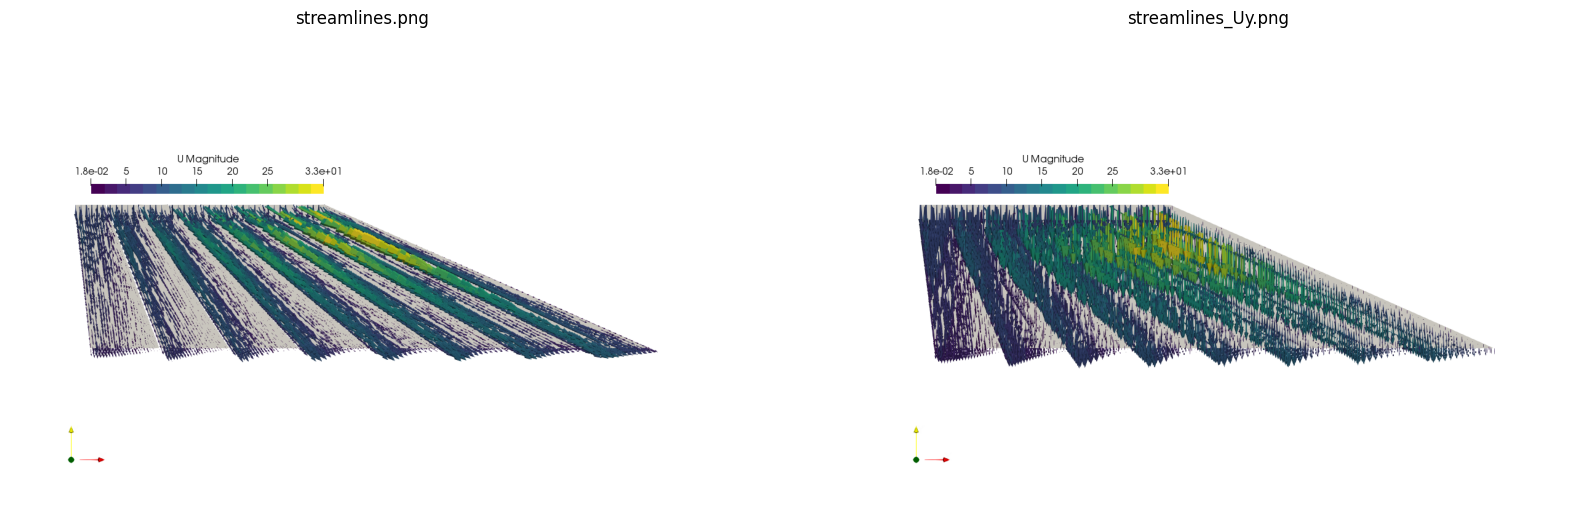

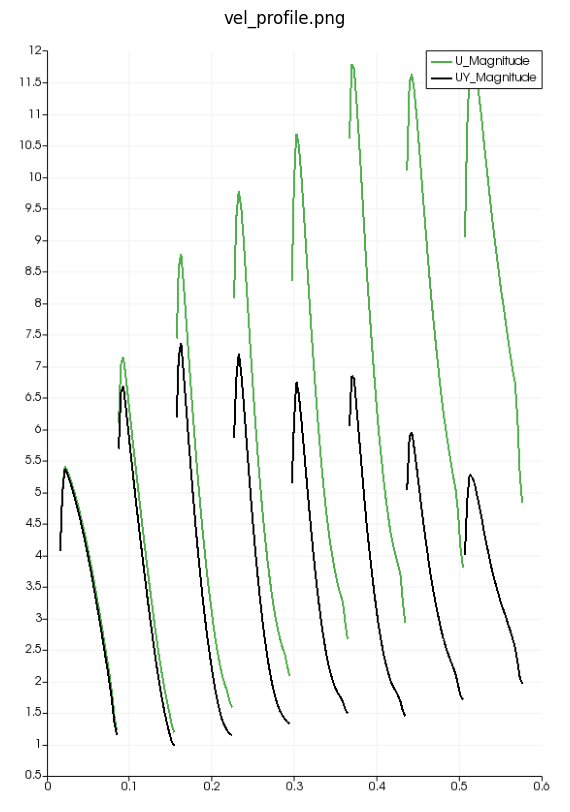

In [72]:
CoV_outlets = []; UI_outlets = []; averaged_velocities = [];
print(csv_files)
df = pd.read_csv(os.path.join(folder_path, csv_files[16]))


outlet_1= df.iloc[0:23,0]
outlet_y = extract_y_component(outlet_1, 1)
outlet_x = extract_y_component(outlet_1, 0)
vel_mag = np.sqrt(outlet_y**2)
CoV_outlets.append(np.abs(statistics.stdev(vel_mag) / np.mean(vel_mag)))
UI_outlets.append(np.abs(1-CoV_outlets[-1]))
averaged_velocities.append(np.mean(vel_mag))


outlet_2 = df.iloc[0:23,1] 
outlet_y = extract_y_component(outlet_2, 1) 
outlet_x = extract_y_component(outlet_2, 0)
vel_mag = np.sqrt(outlet_y**2)
CoV_outlets.append(np.abs(statistics.stdev(vel_mag) / np.mean(vel_mag)))
UI_outlets.append(np.abs(1-CoV_outlets[-1]))
averaged_velocities.append(np.mean(vel_mag))


outlet_3 = df.iloc[0:23,2];
outlet_y = extract_y_component(outlet_3, 1)
outlet_x = extract_y_component(outlet_3, 0)
vel_mag = np.sqrt(outlet_y**2)
CoV_outlets.append(np.abs(statistics.stdev(vel_mag) / np.mean(vel_mag)))
UI_outlets.append(np.abs(1-CoV_outlets[-1]))
averaged_velocities.append(np.mean(vel_mag))


outlet_4 = df.iloc[0:23,3]
outlet_y = extract_y_component(outlet_4, 1)
outlet_x = extract_y_component(outlet_4, 0)
vel_mag = np.sqrt(outlet_y**2)
CoV_outlets.append(np.abs(statistics.stdev(vel_mag) / np.mean(vel_mag)))
UI_outlets.append(np.abs(1-CoV_outlets[-1]))
averaged_velocities.append(np.mean(vel_mag))


outlet_5 = df.iloc[0:23,4]
outlet_y = extract_y_component(outlet_5, 1) 
outlet_x = extract_y_component(outlet_5, 0)
vel_mag = np.sqrt(outlet_y**2)
CoV_outlets.append(np.abs(statistics.stdev(vel_mag) / np.mean(vel_mag)))
UI_outlets.append(np.abs(1-CoV_outlets[-1]))
averaged_velocities.append(np.mean(vel_mag))


outlet_6 = df.iloc[0:23,5]
outlet_y = extract_y_component(outlet_6, 1)
outlet_x = extract_y_component(outlet_6, 0)
vel_mag = np.sqrt(outlet_y**2)
CoV_outlets.append(np.abs(statistics.stdev(vel_mag) / np.mean(vel_mag)))
UI_outlets.append(np.abs(1-CoV_outlets[-1]))
averaged_velocities.append(np.mean(vel_mag))


outlet_7 = df.iloc[0:23,6]
outlet_y = extract_y_component(outlet_7, 1)
outlet_x = extract_y_component(outlet_7, 0)
vel_mag = np.sqrt(outlet_y**2)
CoV_outlets.append(np.abs(statistics.stdev(vel_mag) / np.mean(vel_mag)))
UI_outlets.append(np.abs(1-CoV_outlets[-1]))
averaged_velocities.append(np.mean(vel_mag))


outlet_8 = df.iloc[0:24,7]
outlet_y = extract_y_component(outlet_8, 1)
outlet_x = extract_y_component(outlet_8, 0)
vel_mag = np.sqrt(outlet_y**2)
CoV_outlets.append(np.abs(statistics.stdev(vel_mag) / np.mean(vel_mag)))
UI_outlets.append(np.abs(1-CoV_outlets[-1]))
averaged_velocities.append(np.mean(vel_mag))


outlet_overall = df.iloc[0:185,8]
outlet_y = extract_y_component(outlet_overall, 1)
outlet_x = extract_y_component(outlet_overall, 0)
vel_mag = np.sqrt(outlet_y**2)
CoV_outlets.append(np.abs(statistics.stdev(vel_mag) / np.mean(vel_mag)))
UI_outlets.append(np.abs(1-CoV_outlets[-1]))
averaged_velocities.append(np.mean(vel_mag))
std_dev = statistics.stdev(vel_mag)

# Convert each element to a standard Python float
CoV_outlets = [float(value) for value in CoV_outlets];
UI_outlets = [float(value) for value in UI_outlets];
print("\n"*2)
names = ["Outlet 1", "Outlet 2", "Outlet 3", "Outlet 4", "Outlet 5", "Outlet 6", "Outlet 7", "Outlet 8", "Overall"]

df = pd.DataFrame({
    "Name": names,
    "CoV outlet": CoV_outlets,
    "UI outlet": UI_outlets, 
    "Average |U|": averaged_velocities
})

print(df)
print("\n"*2)
print("Overall standard deviation at outlet: ", std_dev)




# Specify the directory where your PNG files are located
image_dir = '/home/affu5154/OpenFOAM/affu5154-9/run/pygmsh/Mesh_gmsh/Header/Optimized_trials/7vanes_2.0'
# List all files in the folder
files_image = os.listdir(image_dir)
# Filter out PNG files
png_files = sorted([f for f in files_image if f.endswith('.png')], reverse=False)
images = []

# Load the images and store them in the array
for png_file in png_files:
    full_image_path = os.path.join(image_dir, png_file)  # Use a new variable to store the full path
    image = Image.open(full_image_path)
    images.append(np.array(image))

fig, axes = plt.subplots(1, 2, figsize=(20, 20))  # Adjust the figsize as needed

# Ensure axes is iterable
if not isinstance(axes, (list, np.ndarray)):
    axes = [axes]
image_indices = [2, 3]

# Display the specific images on each subplot
for ax, image_index in zip(axes, image_indices):
    ax.imshow(images[image_index])
    ax.axis('off')  # Hide the axis
    ax.set_title(png_files[image_index])  # Set the title to the filename

plt.show()

fig, axes = plt.subplots(1, 1, figsize=(10, 10))  # Adjust the figsize as needed

# Ensure axes is iterable
if not isinstance(axes, (list, np.ndarray)):
    axes = [axes]
image_indices = [4]

# Display the specific images on each subplot
for ax, image_index in zip(axes, image_indices):
    ax.imshow(images[image_index])
    ax.axis('off')  # Hide the axis
    ax.set_title(png_files[image_index])  # Set the title to the filename

plt.show()

##### 8 vanes

['10_straight_vanes_2.0.csv', '1_straight_vanes_2.0.csv', '27k_simple.csv', '2_straight_vanes_2.0.csv', '3_curved_vanes_2.0.csv', '3_straight_vanes_1.0.csv', '47k.csv', '4_curved_vanes_2.0.csv', '4_straight_vanes_2.0.csv', '5_curved_vanes_2.0.csv', '5_partial13rd_curved_2.0.csv', '5_partial13rd_straight_2.0.csv', '5_partial23rd_curved_2.0.csv', '5_partial23rd_straight_2.0.csv', '5_straight_vanes_2.0.csv', '6_straight_vanes_2.0.csv', '7_straight_vanes_2.0.csv', '8_straight_vanes_2.0.csv', '9_straight_vanes_2.0.csv', '9k.csv']



       Name  CoV outlet  UI outlet  Average |U|
0  Outlet 1    0.310578   0.689422     3.708063
1  Outlet 2    0.450472   0.549528     3.625302
2  Outlet 3    0.532828   0.467172     3.622049
3  Outlet 4    0.552269   0.447731     3.618739
4  Outlet 5    0.508293   0.491707     3.617084
5  Outlet 6    0.495414   0.504586     3.592332
6  Outlet 7    0.365903   0.634097     3.595643
7  Outlet 8    0.299646   0.700354     3.597410
8  Outlet 9    0.242389   0.757611

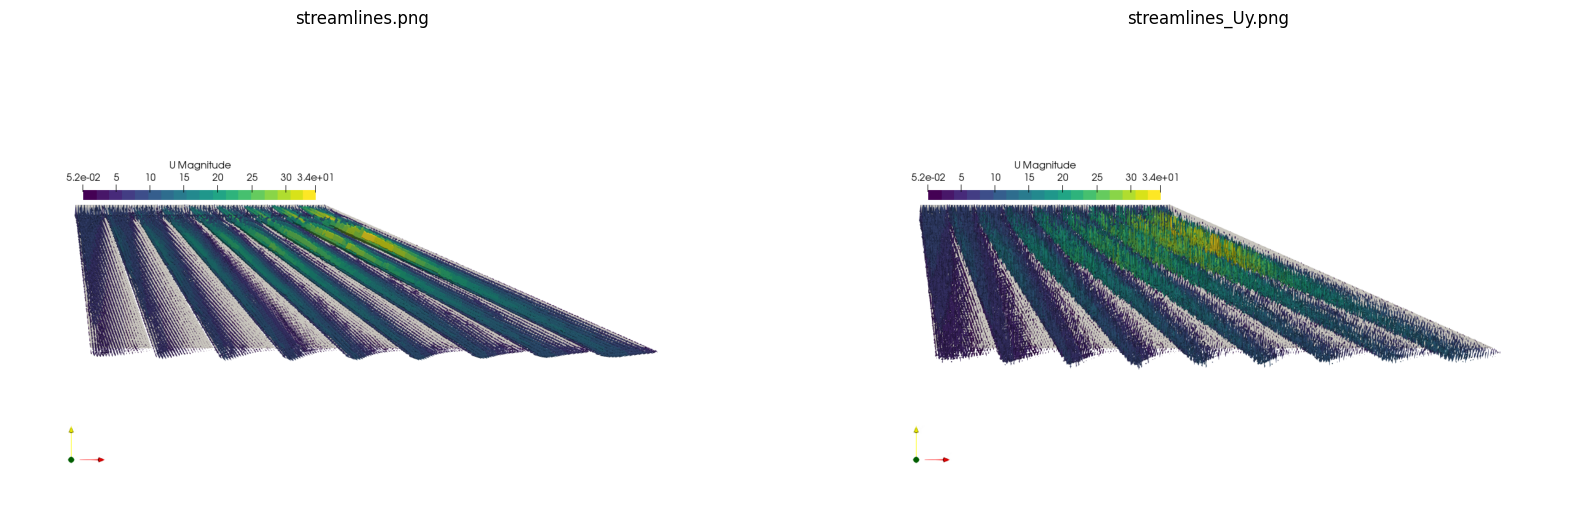

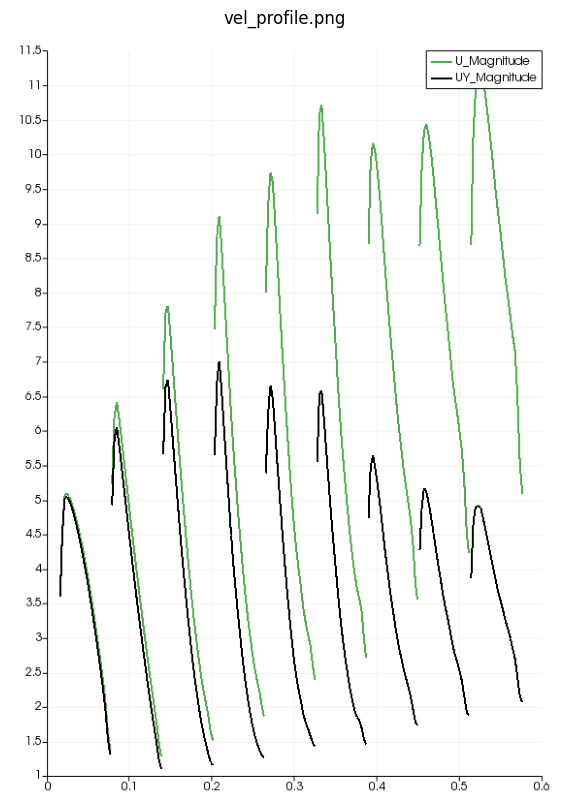

In [73]:
CoV_outlets = []; UI_outlets = []; averaged_velocities = [];
print(csv_files)
df = pd.read_csv(os.path.join(folder_path, csv_files[17]))


outlet_1= df.iloc[0:21,0]
outlet_y = extract_y_component(outlet_1, 1)
outlet_x = extract_y_component(outlet_1, 0)
vel_mag = np.sqrt(outlet_y**2)
CoV_outlets.append(np.abs(statistics.stdev(vel_mag) / np.mean(vel_mag)))
UI_outlets.append(np.abs(1-CoV_outlets[-1]))
averaged_velocities.append(np.mean(vel_mag))


outlet_2 = df.iloc[0:21,1] 
outlet_y = extract_y_component(outlet_2, 1) 
outlet_x = extract_y_component(outlet_2, 0)
vel_mag = np.sqrt(outlet_y**2)
CoV_outlets.append(np.abs(statistics.stdev(vel_mag) / np.mean(vel_mag)))
UI_outlets.append(np.abs(1-CoV_outlets[-1]))
averaged_velocities.append(np.mean(vel_mag))


outlet_3 = df.iloc[0:21,2];
outlet_y = extract_y_component(outlet_3, 1)
outlet_x = extract_y_component(outlet_3, 0)
vel_mag = np.sqrt(outlet_y**2)
CoV_outlets.append(np.abs(statistics.stdev(vel_mag) / np.mean(vel_mag)))
UI_outlets.append(np.abs(1-CoV_outlets[-1]))
averaged_velocities.append(np.mean(vel_mag))


outlet_4 = df.iloc[0:21,3]
outlet_y = extract_y_component(outlet_4, 1)
outlet_x = extract_y_component(outlet_4, 0)
vel_mag = np.sqrt(outlet_y**2)
CoV_outlets.append(np.abs(statistics.stdev(vel_mag) / np.mean(vel_mag)))
UI_outlets.append(np.abs(1-CoV_outlets[-1]))
averaged_velocities.append(np.mean(vel_mag))


outlet_5 = df.iloc[0:21,4]
outlet_y = extract_y_component(outlet_5, 1) 
outlet_x = extract_y_component(outlet_5, 0)
vel_mag = np.sqrt(outlet_y**2)
CoV_outlets.append(np.abs(statistics.stdev(vel_mag) / np.mean(vel_mag)))
UI_outlets.append(np.abs(1-CoV_outlets[-1]))
averaged_velocities.append(np.mean(vel_mag))


outlet_6 = df.iloc[0:21,5]
outlet_y = extract_y_component(outlet_6, 1)
outlet_x = extract_y_component(outlet_6, 0)
vel_mag = np.sqrt(outlet_y**2)
CoV_outlets.append(np.abs(statistics.stdev(vel_mag) / np.mean(vel_mag)))
UI_outlets.append(np.abs(1-CoV_outlets[-1]))
averaged_velocities.append(np.mean(vel_mag))


outlet_7 = df.iloc[0:21,6]
outlet_y = extract_y_component(outlet_7, 1)
outlet_x = extract_y_component(outlet_7, 0)
vel_mag = np.sqrt(outlet_y**2)
CoV_outlets.append(np.abs(statistics.stdev(vel_mag) / np.mean(vel_mag)))
UI_outlets.append(np.abs(1-CoV_outlets[-1]))
averaged_velocities.append(np.mean(vel_mag))


outlet_8 = df.iloc[0:21,7]
outlet_y = extract_y_component(outlet_8, 1)
outlet_x = extract_y_component(outlet_8, 0)
vel_mag = np.sqrt(outlet_y**2)
CoV_outlets.append(np.abs(statistics.stdev(vel_mag) / np.mean(vel_mag)))
UI_outlets.append(np.abs(1-CoV_outlets[-1]))
averaged_velocities.append(np.mean(vel_mag))


outlet_9 = df.iloc[0:21,8]
outlet_y = extract_y_component(outlet_9, 1)
outlet_x = extract_y_component(outlet_9, 0)
vel_mag = np.sqrt(outlet_y**2)
CoV_outlets.append(np.abs(statistics.stdev(vel_mag) / np.mean(vel_mag)))
UI_outlets.append(np.abs(1-CoV_outlets[-1]))
averaged_velocities.append(np.mean(vel_mag))


outlet_overall = df.iloc[0:189,9]
outlet_y = extract_y_component(outlet_overall, 1)
outlet_x = extract_y_component(outlet_overall, 0)
vel_mag = np.sqrt(outlet_y**2)
CoV_outlets.append(np.abs(statistics.stdev(vel_mag) / np.mean(vel_mag)))
UI_outlets.append(np.abs(1-CoV_outlets[-1]))
averaged_velocities.append(np.mean(vel_mag))
std_dev = statistics.stdev(vel_mag)

# Convert each element to a standard Python float
CoV_outlets = [float(value) for value in CoV_outlets];
UI_outlets = [float(value) for value in UI_outlets];
print("\n"*2)
names = ["Outlet 1", "Outlet 2", "Outlet 3", "Outlet 4", "Outlet 5", "Outlet 6", "Outlet 7", "Outlet 8", "Outlet 9", "Overall"]

df = pd.DataFrame({
    "Name": names,
    "CoV outlet": CoV_outlets,
    "UI outlet": UI_outlets, 
    "Average |U|": averaged_velocities
})

print(df)
print("\n"*2)
print("Overall standard deviation at outlet: ", std_dev)




# Specify the directory where your PNG files are located
image_dir = '/home/affu5154/OpenFOAM/affu5154-9/run/pygmsh/Mesh_gmsh/Header/Optimized_trials/8vanes_2.0'
# List all files in the folder
files_image = os.listdir(image_dir)
# Filter out PNG files
png_files = sorted([f for f in files_image if f.endswith('.png')], reverse=False)
images = []

# Load the images and store them in the array
for png_file in png_files:
    full_image_path = os.path.join(image_dir, png_file)  # Use a new variable to store the full path
    image = Image.open(full_image_path)
    images.append(np.array(image))

fig, axes = plt.subplots(1, 2, figsize=(20, 20))  # Adjust the figsize as needed

# Ensure axes is iterable
if not isinstance(axes, (list, np.ndarray)):
    axes = [axes]
image_indices = [3, 4]

# Display the specific images on each subplot
for ax, image_index in zip(axes, image_indices):
    ax.imshow(images[image_index])
    ax.axis('off')  # Hide the axis
    ax.set_title(png_files[image_index])  # Set the title to the filename

plt.show()

fig, axes = plt.subplots(1, 1, figsize=(10, 10))  # Adjust the figsize as needed

# Ensure axes is iterable
if not isinstance(axes, (list, np.ndarray)):
    axes = [axes]
image_indices = [5]

# Display the specific images on each subplot
for ax, image_index in zip(axes, image_indices):
    ax.imshow(images[image_index])
    ax.axis('off')  # Hide the axis
    ax.set_title(png_files[image_index])  # Set the title to the filename

plt.show()

##### 9 vanes

['10_straight_vanes_2.0.csv', '1_straight_vanes_2.0.csv', '27k_simple.csv', '2_straight_vanes_2.0.csv', '3_curved_vanes_2.0.csv', '3_straight_vanes_1.0.csv', '47k.csv', '4_curved_vanes_2.0.csv', '4_straight_vanes_2.0.csv', '5_curved_vanes_2.0.csv', '5_partial13rd_curved_2.0.csv', '5_partial13rd_straight_2.0.csv', '5_partial23rd_curved_2.0.csv', '5_partial23rd_straight_2.0.csv', '5_straight_vanes_2.0.csv', '6_straight_vanes_2.0.csv', '7_straight_vanes_2.0.csv', '8_straight_vanes_2.0.csv', '9_straight_vanes_2.0.csv', '9k.csv']



         Name  CoV outlet  UI outlet  Average |U|
0    Outlet 1    0.266232   0.733768     3.698770
1    Outlet 2    0.399730   0.600270     3.608164
2    Outlet 3    0.450195   0.549805     3.604505
3    Outlet 4    0.495067   0.504933     3.600677
4    Outlet 5    0.445047   0.554953     3.599973
5    Outlet 6    0.385483   0.614517     3.598265
6    Outlet 7    0.393105   0.606895     3.577822
7    Outlet 8    0.298017   0.701983     3.586809
8    Outlet 9   

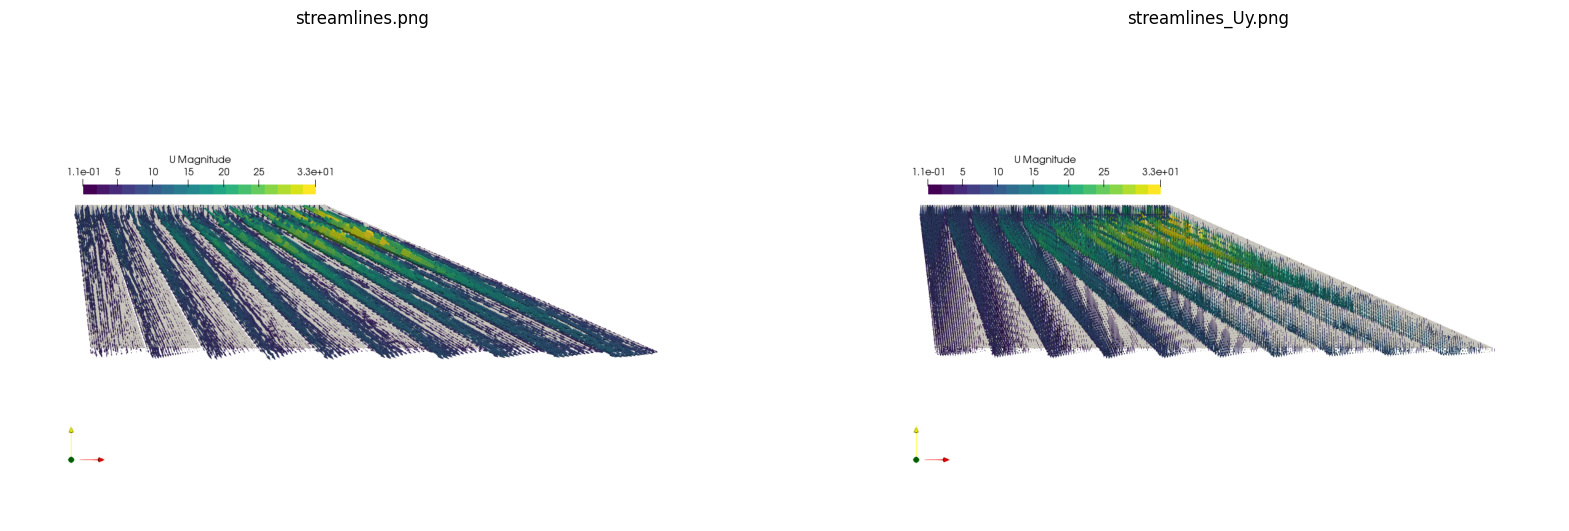

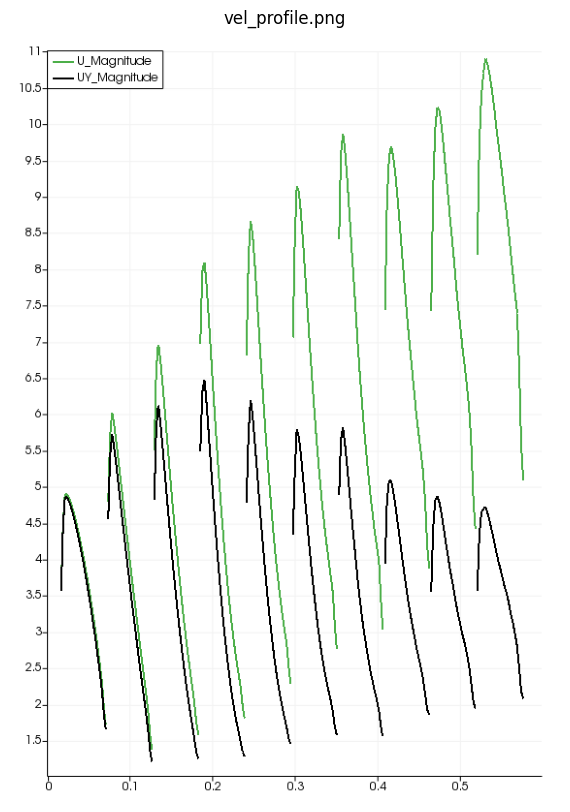

In [74]:
CoV_outlets = []; UI_outlets = []; averaged_velocities = [];
print(csv_files)
df = pd.read_csv(os.path.join(folder_path, csv_files[18]))


outlet_1= df.iloc[0:22,0]
outlet_y = extract_y_component(outlet_1, 1)
outlet_x = extract_y_component(outlet_1, 0)
vel_mag = np.sqrt(outlet_y**2)
CoV_outlets.append(np.abs(statistics.stdev(vel_mag) / np.mean(vel_mag)))
UI_outlets.append(np.abs(1-CoV_outlets[-1]))
averaged_velocities.append(np.mean(vel_mag))


outlet_2 = df.iloc[0:21,1] 
outlet_y = extract_y_component(outlet_2, 1) 
outlet_x = extract_y_component(outlet_2, 0)
vel_mag = np.sqrt(outlet_y**2)
CoV_outlets.append(np.abs(statistics.stdev(vel_mag) / np.mean(vel_mag)))
UI_outlets.append(np.abs(1-CoV_outlets[-1]))
averaged_velocities.append(np.mean(vel_mag))


outlet_3 = df.iloc[0:21,2];
outlet_y = extract_y_component(outlet_3, 1)
outlet_x = extract_y_component(outlet_3, 0)
vel_mag = np.sqrt(outlet_y**2)
CoV_outlets.append(np.abs(statistics.stdev(vel_mag) / np.mean(vel_mag)))
UI_outlets.append(np.abs(1-CoV_outlets[-1]))
averaged_velocities.append(np.mean(vel_mag))


outlet_4 = df.iloc[0:21,3]
outlet_y = extract_y_component(outlet_4, 1)
outlet_x = extract_y_component(outlet_4, 0)
vel_mag = np.sqrt(outlet_y**2)
CoV_outlets.append(np.abs(statistics.stdev(vel_mag) / np.mean(vel_mag)))
UI_outlets.append(np.abs(1-CoV_outlets[-1]))
averaged_velocities.append(np.mean(vel_mag))


outlet_5 = df.iloc[0:21,4]
outlet_y = extract_y_component(outlet_5, 1) 
outlet_x = extract_y_component(outlet_5, 0)
vel_mag = np.sqrt(outlet_y**2)
CoV_outlets.append(np.abs(statistics.stdev(vel_mag) / np.mean(vel_mag)))
UI_outlets.append(np.abs(1-CoV_outlets[-1]))
averaged_velocities.append(np.mean(vel_mag))


outlet_6 = df.iloc[0:21,5]
outlet_y = extract_y_component(outlet_6, 1)
outlet_x = extract_y_component(outlet_6, 0)
vel_mag = np.sqrt(outlet_y**2)
CoV_outlets.append(np.abs(statistics.stdev(vel_mag) / np.mean(vel_mag)))
UI_outlets.append(np.abs(1-CoV_outlets[-1]))
averaged_velocities.append(np.mean(vel_mag))


outlet_7 = df.iloc[0:21,6]
outlet_y = extract_y_component(outlet_7, 1)
outlet_x = extract_y_component(outlet_7, 0)
vel_mag = np.sqrt(outlet_y**2)
CoV_outlets.append(np.abs(statistics.stdev(vel_mag) / np.mean(vel_mag)))
UI_outlets.append(np.abs(1-CoV_outlets[-1]))
averaged_velocities.append(np.mean(vel_mag))


outlet_8 = df.iloc[0:21,7]
outlet_y = extract_y_component(outlet_8, 1)
outlet_x = extract_y_component(outlet_8, 0)
vel_mag = np.sqrt(outlet_y**2)
CoV_outlets.append(np.abs(statistics.stdev(vel_mag) / np.mean(vel_mag)))
UI_outlets.append(np.abs(1-CoV_outlets[-1]))
averaged_velocities.append(np.mean(vel_mag))


outlet_9 = df.iloc[0:21,8]
outlet_y = extract_y_component(outlet_9, 1)
outlet_x = extract_y_component(outlet_9, 0)
vel_mag = np.sqrt(outlet_y**2)
CoV_outlets.append(np.abs(statistics.stdev(vel_mag) / np.mean(vel_mag)))
UI_outlets.append(np.abs(1-CoV_outlets[-1]))
averaged_velocities.append(np.mean(vel_mag))


outlet_10 = df.iloc[0:22,9]
outlet_y = extract_y_component(outlet_10, 1)
outlet_x = extract_y_component(outlet_10, 0)
vel_mag = np.sqrt(outlet_y**2)
CoV_outlets.append(np.abs(statistics.stdev(vel_mag) / np.mean(vel_mag)))
UI_outlets.append(np.abs(1-CoV_outlets[-1]))
averaged_velocities.append(np.mean(vel_mag))



outlet_overall = df.iloc[0:212,10]
outlet_y = extract_y_component(outlet_overall, 1)
outlet_x = extract_y_component(outlet_overall, 0)
vel_mag = np.sqrt(outlet_y**2)
CoV_outlets.append(np.abs(statistics.stdev(vel_mag) / np.mean(vel_mag)))
UI_outlets.append(np.abs(1-CoV_outlets[-1]))
averaged_velocities.append(np.mean(vel_mag))
std_dev = statistics.stdev(vel_mag)

# Convert each element to a standard Python float
CoV_outlets = [float(value) for value in CoV_outlets];
UI_outlets = [float(value) for value in UI_outlets];
print("\n"*2)
names = ["Outlet 1", "Outlet 2", "Outlet 3", "Outlet 4", "Outlet 5", "Outlet 6", "Outlet 7", "Outlet 8", "Outlet 9", "Outlet 10", "Overall"]

df = pd.DataFrame({
    "Name": names,
    "CoV outlet": CoV_outlets,
    "UI outlet": UI_outlets, 
    "Average |U|": averaged_velocities
})

print(df)
print("\n"*2)
print("Overall standard deviation at outlet: ", std_dev)




# Specify the directory where your PNG files are located
image_dir = '/home/affu5154/OpenFOAM/affu5154-9/run/pygmsh/Mesh_gmsh/Header/Optimized_trials/9vanes_2.0'
# List all files in the folder
files_image = os.listdir(image_dir)
# Filter out PNG files
png_files = sorted([f for f in files_image if f.endswith('.png')], reverse=False)
images = []

# Load the images and store them in the array
for png_file in png_files:
    full_image_path = os.path.join(image_dir, png_file)  # Use a new variable to store the full path
    image = Image.open(full_image_path)
    images.append(np.array(image))

fig, axes = plt.subplots(1, 2, figsize=(20, 20))  # Adjust the figsize as needed

# Ensure axes is iterable
if not isinstance(axes, (list, np.ndarray)):
    axes = [axes]
image_indices = [3, 4]

# Display the specific images on each subplot
for ax, image_index in zip(axes, image_indices):
    ax.imshow(images[image_index])
    ax.axis('off')  # Hide the axis
    ax.set_title(png_files[image_index])  # Set the title to the filename

plt.show()

fig, axes = plt.subplots(1, 1, figsize=(10, 10))  # Adjust the figsize as needed

# Ensure axes is iterable
if not isinstance(axes, (list, np.ndarray)):
    axes = [axes]
image_indices = [5]

# Display the specific images on each subplot
for ax, image_index in zip(axes, image_indices):
    ax.imshow(images[image_index])
    ax.axis('off')  # Hide the axis
    ax.set_title(png_files[image_index])  # Set the title to the filename

plt.show()

##### 10 vanes

['10_straight_vanes_2.0.csv', '1_straight_vanes_2.0.csv', '27k_simple.csv', '2_straight_vanes_2.0.csv', '3_curved_vanes_2.0.csv', '3_straight_vanes_1.0.csv', '47k.csv', '4_curved_vanes_2.0.csv', '4_straight_vanes_2.0.csv', '5_curved_vanes_2.0.csv', '5_partial13rd_curved_2.0.csv', '5_partial13rd_straight_2.0.csv', '5_partial23rd_curved_2.0.csv', '5_partial23rd_straight_2.0.csv', '5_straight_vanes_2.0.csv', '6_straight_vanes_2.0.csv', '7_straight_vanes_2.0.csv', '8_straight_vanes_2.0.csv', '9_straight_vanes_2.0.csv', '9k.csv']



         Name  CoV outlet  UI outlet  Average |U|
0    Outlet 1    0.244421   0.755579     3.691039
1    Outlet 2    0.369413   0.630587     3.589151
2    Outlet 3    0.447766   0.552234     3.586553
3    Outlet 4    0.478733   0.521267     3.582222
4    Outlet 5    0.452255   0.547745     3.582978
5    Outlet 6    0.380982   0.619018     3.579575
6    Outlet 7    0.391568   0.608432     3.558969
7    Outlet 8    0.313356   0.686644     3.560058
8    Outlet 9   

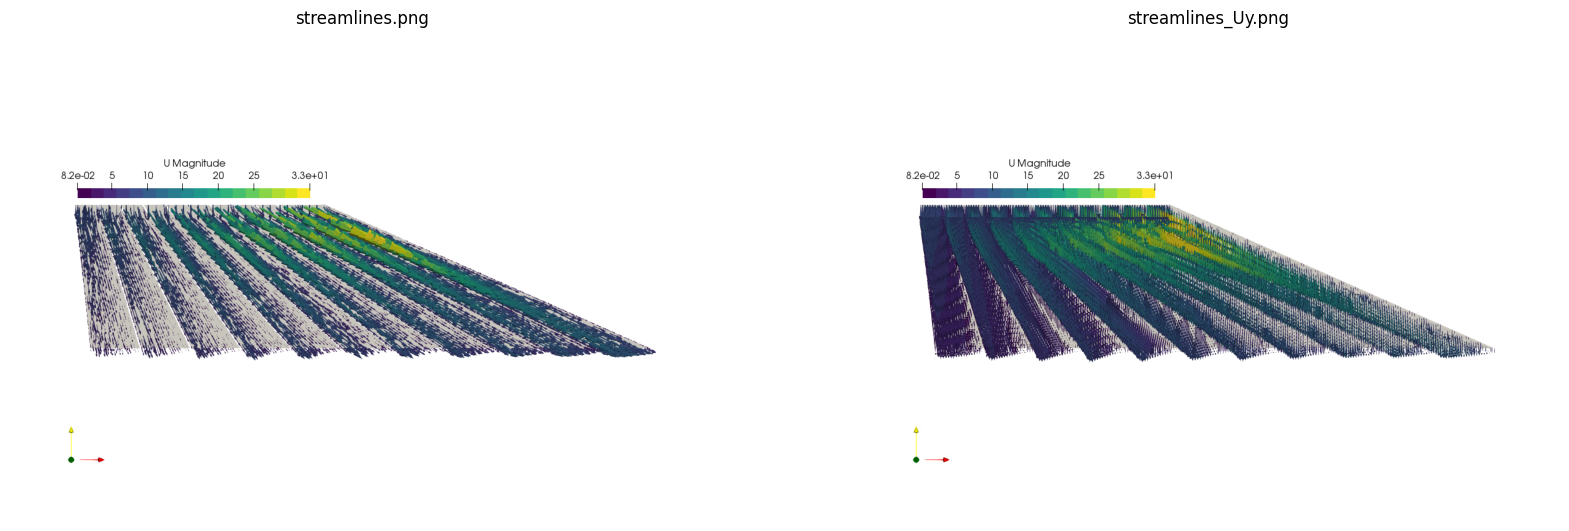

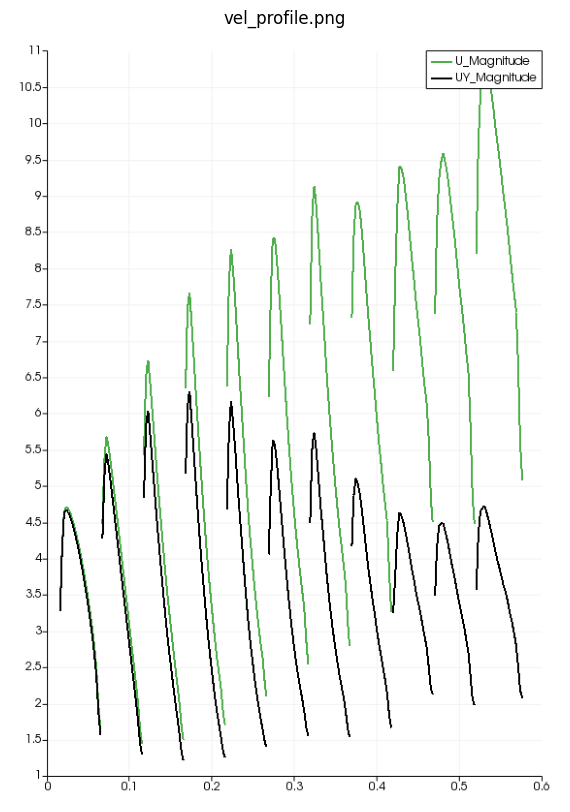

In [75]:
CoV_outlets = []; UI_outlets = []; averaged_velocities = [];
print(csv_files)
df = pd.read_csv(os.path.join(folder_path, csv_files[0]))


outlet_1= df.iloc[0:19,0]
outlet_y = extract_y_component(outlet_1, 1)
outlet_x = extract_y_component(outlet_1, 0)
vel_mag = np.sqrt(outlet_y**2)
CoV_outlets.append(np.abs(statistics.stdev(vel_mag) / np.mean(vel_mag)))
UI_outlets.append(np.abs(1-CoV_outlets[-1]))
averaged_velocities.append(np.mean(vel_mag))


outlet_2 = df.iloc[0:19,1] 
outlet_y = extract_y_component(outlet_2, 1) 
outlet_x = extract_y_component(outlet_2, 0)
vel_mag = np.sqrt(outlet_y**2)
CoV_outlets.append(np.abs(statistics.stdev(vel_mag) / np.mean(vel_mag)))
UI_outlets.append(np.abs(1-CoV_outlets[-1]))
averaged_velocities.append(np.mean(vel_mag))


outlet_3 = df.iloc[0:19,2];
outlet_y = extract_y_component(outlet_3, 1)
outlet_x = extract_y_component(outlet_3, 0)
vel_mag = np.sqrt(outlet_y**2)
CoV_outlets.append(np.abs(statistics.stdev(vel_mag) / np.mean(vel_mag)))
UI_outlets.append(np.abs(1-CoV_outlets[-1]))
averaged_velocities.append(np.mean(vel_mag))


outlet_4 = df.iloc[0:19,3]
outlet_y = extract_y_component(outlet_4, 1)
outlet_x = extract_y_component(outlet_4, 0)
vel_mag = np.sqrt(outlet_y**2)
CoV_outlets.append(np.abs(statistics.stdev(vel_mag) / np.mean(vel_mag)))
UI_outlets.append(np.abs(1-CoV_outlets[-1]))
averaged_velocities.append(np.mean(vel_mag))


outlet_5 = df.iloc[0:19,4]
outlet_y = extract_y_component(outlet_5, 1) 
outlet_x = extract_y_component(outlet_5, 0)
vel_mag = np.sqrt(outlet_y**2)
CoV_outlets.append(np.abs(statistics.stdev(vel_mag) / np.mean(vel_mag)))
UI_outlets.append(np.abs(1-CoV_outlets[-1]))
averaged_velocities.append(np.mean(vel_mag))


outlet_6 = df.iloc[0:19,5]
outlet_y = extract_y_component(outlet_6, 1)
outlet_x = extract_y_component(outlet_6, 0)
vel_mag = np.sqrt(outlet_y**2)
CoV_outlets.append(np.abs(statistics.stdev(vel_mag) / np.mean(vel_mag)))
UI_outlets.append(np.abs(1-CoV_outlets[-1]))
averaged_velocities.append(np.mean(vel_mag))


outlet_7 = df.iloc[0:19,6]
outlet_y = extract_y_component(outlet_7, 1)
outlet_x = extract_y_component(outlet_7, 0)
vel_mag = np.sqrt(outlet_y**2)
CoV_outlets.append(np.abs(statistics.stdev(vel_mag) / np.mean(vel_mag)))
UI_outlets.append(np.abs(1-CoV_outlets[-1]))
averaged_velocities.append(np.mean(vel_mag))


outlet_8 = df.iloc[0:19,7]
outlet_y = extract_y_component(outlet_8, 1)
outlet_x = extract_y_component(outlet_8, 0)
vel_mag = np.sqrt(outlet_y**2)
CoV_outlets.append(np.abs(statistics.stdev(vel_mag) / np.mean(vel_mag)))
UI_outlets.append(np.abs(1-CoV_outlets[-1]))
averaged_velocities.append(np.mean(vel_mag))


outlet_9 = df.iloc[0:19,8]
outlet_y = extract_y_component(outlet_9, 1)
outlet_x = extract_y_component(outlet_9, 0)
vel_mag = np.sqrt(outlet_y**2)
CoV_outlets.append(np.abs(statistics.stdev(vel_mag) / np.mean(vel_mag)))
UI_outlets.append(np.abs(1-CoV_outlets[-1]))
averaged_velocities.append(np.mean(vel_mag))


outlet_10 = df.iloc[0:19,9]
outlet_y = extract_y_component(outlet_10, 1)
outlet_x = extract_y_component(outlet_10, 0)
vel_mag = np.sqrt(outlet_y**2)
CoV_outlets.append(np.abs(statistics.stdev(vel_mag) / np.mean(vel_mag)))
UI_outlets.append(np.abs(1-CoV_outlets[-1]))
averaged_velocities.append(np.mean(vel_mag))


outlet_11 = df.iloc[0:22,10]
outlet_y = extract_y_component(outlet_11, 1)
outlet_x = extract_y_component(outlet_11, 0)
vel_mag = np.sqrt(outlet_y**2)
CoV_outlets.append(np.abs(statistics.stdev(vel_mag) / np.mean(vel_mag)))
UI_outlets.append(np.abs(1-CoV_outlets[-1]))
averaged_velocities.append(np.mean(vel_mag))



outlet_overall = df.iloc[0:212,11]
outlet_y = extract_y_component(outlet_overall, 1)
outlet_x = extract_y_component(outlet_overall, 0)
vel_mag = np.sqrt(outlet_y**2)
CoV_outlets.append(np.abs(statistics.stdev(vel_mag) / np.mean(vel_mag)))
UI_outlets.append(np.abs(1-CoV_outlets[-1]))
averaged_velocities.append(np.mean(vel_mag))
std_dev = statistics.stdev(vel_mag)

# Convert each element to a standard Python float
CoV_outlets = [float(value) for value in CoV_outlets];
UI_outlets = [float(value) for value in UI_outlets];
print("\n"*2)
names = ["Outlet 1", "Outlet 2", "Outlet 3", "Outlet 4", "Outlet 5", "Outlet 6", "Outlet 7", "Outlet 8", "Outlet 9", "Outlet 10", "Outlet 11", "Overall"]

df = pd.DataFrame({
    "Name": names,
    "CoV outlet": CoV_outlets,
    "UI outlet": UI_outlets, 
    "Average |U|": averaged_velocities
})

print(df)
print("\n"*2)
print("Overall standard deviation at outlet: ", std_dev)




# Specify the directory where your PNG files are located
image_dir = '/home/affu5154/OpenFOAM/affu5154-9/run/pygmsh/Mesh_gmsh/Header/Optimized_trials/10vanes_2.0'
# List all files in the folder
files_image = os.listdir(image_dir)
# Filter out PNG files
png_files = sorted([f for f in files_image if f.endswith('.png')], reverse=False)
images = []

# Load the images and store them in the array
for png_file in png_files:
    full_image_path = os.path.join(image_dir, png_file)  # Use a new variable to store the full path
    image = Image.open(full_image_path)
    images.append(np.array(image))

fig, axes = plt.subplots(1, 2, figsize=(20, 20))  # Adjust the figsize as needed

# Ensure axes is iterable
if not isinstance(axes, (list, np.ndarray)):
    axes = [axes]
image_indices = [2, 3]

# Display the specific images on each subplot
for ax, image_index in zip(axes, image_indices):
    ax.imshow(images[image_index])
    ax.axis('off')  # Hide the axis
    ax.set_title(png_files[image_index])  # Set the title to the filename

plt.show()

fig, axes = plt.subplots(1, 1, figsize=(10, 10))  # Adjust the figsize as needed

# Ensure axes is iterable
if not isinstance(axes, (list, np.ndarray)):
    axes = [axes]
image_indices = [4]

# Display the specific images on each subplot
for ax, image_index in zip(axes, image_indices):
    ax.imshow(images[image_index])
    ax.axis('off')  # Hide the axis
    ax.set_title(png_files[image_index])  # Set the title to the filename

plt.show()

#### Curved Vanes

##### 5 vanes

       Name  CoV outlet  UI outlet  Average |U|
0  Outlet 1    0.224215   0.775785     6.211120
1  Outlet 2    0.254360   0.745640     5.147306
2  Outlet 3    0.271317   0.728683     5.106456
3  Outlet 4    0.195152   0.804848     4.317353
4  Outlet 5    0.808908   0.191092     1.445571
5  Outlet 6    0.399313   0.600687     1.245460
6   Overall    0.621283   0.378717     3.700853



Overall standard deviation at outlet:  2.2992788903574146


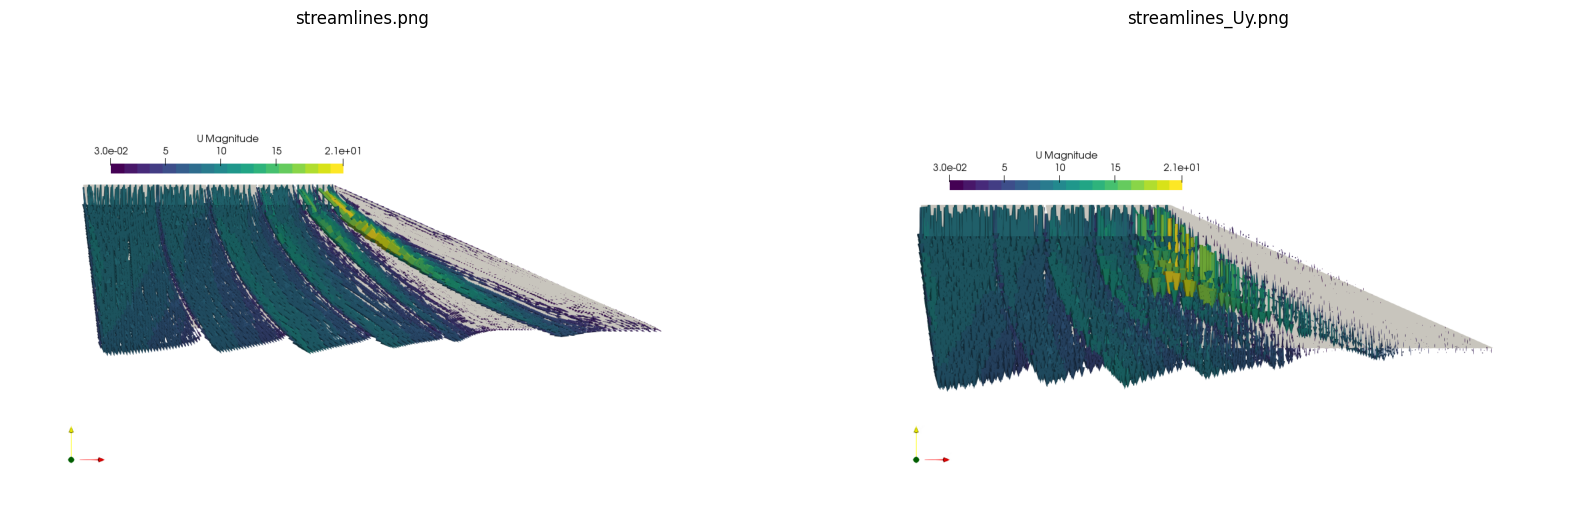

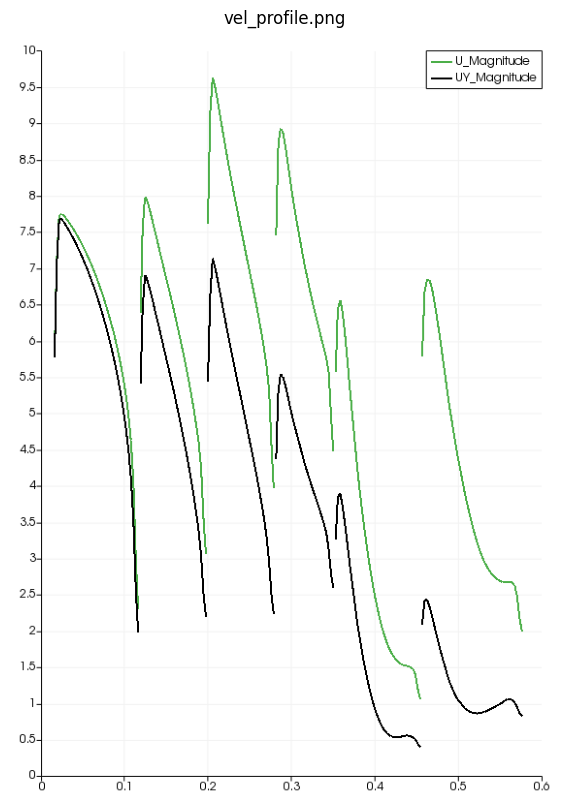

In [76]:
CoV_outlets = []; UI_outlets = []; averaged_velocities = [];

df = pd.read_csv(os.path.join(folder_path, csv_files[9]))


outlet_1= df.iloc[0:34,0]
outlet_y = extract_y_component(outlet_1, 1)
outlet_x = extract_y_component(outlet_1, 0)
vel_mag = np.sqrt(outlet_y**2)
CoV_outlets.append(np.abs(statistics.stdev(vel_mag) / np.mean(vel_mag)))
UI_outlets.append(np.abs(1-CoV_outlets[-1]))
averaged_velocities.append(np.mean(vel_mag))


outlet_2 = df.iloc[0:27,1] 
outlet_y = extract_y_component(outlet_2, 1) 
outlet_x = extract_y_component(outlet_2, 0)
vel_mag = np.sqrt(outlet_y**2)
CoV_outlets.append(np.abs(statistics.stdev(vel_mag) / np.mean(vel_mag)))
UI_outlets.append(np.abs(1-CoV_outlets[-1]))
averaged_velocities.append(np.mean(vel_mag))


outlet_3 = df.iloc[0:27,2];
outlet_y = extract_y_component(outlet_3, 1)
outlet_x = extract_y_component(outlet_3, 0)
vel_mag = np.sqrt(outlet_y**2)
CoV_outlets.append(np.abs(statistics.stdev(vel_mag) / np.mean(vel_mag)))
UI_outlets.append(np.abs(1-CoV_outlets[-1]))
averaged_velocities.append(np.mean(vel_mag))


outlet_4 = df.iloc[0:24,3]
outlet_y = extract_y_component(outlet_4, 1)
outlet_x = extract_y_component(outlet_4, 0)
vel_mag = np.sqrt(outlet_y**2)
CoV_outlets.append(np.abs(statistics.stdev(vel_mag) / np.mean(vel_mag)))
UI_outlets.append(np.abs(1-CoV_outlets[-1]))
averaged_velocities.append(np.mean(vel_mag))


outlet_5 = df.iloc[0:35,4]
outlet_y = extract_y_component(outlet_5, 1) 
outlet_x = extract_y_component(outlet_5, 0)
vel_mag = np.sqrt(outlet_y**2)
CoV_outlets.append(np.abs(statistics.stdev(vel_mag) / np.mean(vel_mag)))
UI_outlets.append(np.abs(1-CoV_outlets[-1]))
averaged_velocities.append(np.mean(vel_mag))


outlet_6 = df.iloc[0:40,5]
outlet_y = extract_y_component(outlet_6, 1)
outlet_x = extract_y_component(outlet_6, 0)
vel_mag = np.sqrt(outlet_y**2)
CoV_outlets.append(np.abs(statistics.stdev(vel_mag) / np.mean(vel_mag)))
UI_outlets.append(np.abs(1-CoV_outlets[-1]))
averaged_velocities.append(np.mean(vel_mag))


outlet_overall = df.iloc[0:187,6]
outlet_y = extract_y_component(outlet_overall, 1)
outlet_x = extract_y_component(outlet_overall, 0)
vel_mag = np.sqrt(outlet_y**2)
CoV_outlets.append(np.abs(statistics.stdev(vel_mag) / np.mean(vel_mag)))
UI_outlets.append(np.abs(1-CoV_outlets[-1]))
averaged_velocities.append(np.mean(vel_mag))
std_dev = statistics.stdev(vel_mag)

# Convert each element to a standard Python float
CoV_outlets = [float(value) for value in CoV_outlets];
UI_outlets = [float(value) for value in UI_outlets];

names = ["Outlet 1", "Outlet 2", "Outlet 3", "Outlet 4", "Outlet 5", "Outlet 6", "Overall"]

df = pd.DataFrame({
    "Name": names,
    "CoV outlet": CoV_outlets,
    "UI outlet": UI_outlets, 
    "Average |U|": averaged_velocities
})

print(df)
print("\n"*2)
print("Overall standard deviation at outlet: ", std_dev)




# Specify the directory where your PNG files are located
image_dir = '/home/affu5154/OpenFOAM/affu5154-9/run/pygmsh/Mesh_gmsh/Header/Optimized_trials/Trial_5_curved/5_vanes_2.0'
# List all files in the folder
files_image = os.listdir(image_dir)
# Filter out PNG files
png_files = sorted([f for f in files_image if f.endswith('.png')], reverse=False)
images = []

# Load the images and store them in the array
for png_file in png_files:
    full_image_path = os.path.join(image_dir, png_file)  # Use a new variable to store the full path
    image = Image.open(full_image_path)
    images.append(np.array(image))

fig, axes = plt.subplots(1, 2, figsize=(20, 20))  # Adjust the figsize as needed

# Ensure axes is iterable
if not isinstance(axes, (list, np.ndarray)):
    axes = [axes]
image_indices = [2, 3]

# Display the specific images on each subplot
for ax, image_index in zip(axes, image_indices):
    ax.imshow(images[image_index])
    ax.axis('off')  # Hide the axis
    ax.set_title(png_files[image_index])  # Set the title to the filename

plt.show()

fig, axes = plt.subplots(1, 1, figsize=(10, 10))  # Adjust the figsize as needed

# Ensure axes is iterable
if not isinstance(axes, (list, np.ndarray)):
    axes = [axes]
image_indices = [4]

# Display the specific images on each subplot
for ax, image_index in zip(axes, image_indices):
    ax.imshow(images[image_index])
    ax.axis('off')  # Hide the axis
    ax.set_title(png_files[image_index])  # Set the title to the filename

plt.show()

##### 4 vanes

       Name  CoV outlet  UI outlet  Average |U|
0  Outlet 1    0.408127   0.591873     5.014412
1  Outlet 2    0.203664   0.796336     6.070707
2  Outlet 3    0.206753   0.793247     6.014214
3  Outlet 4    0.195152   0.804848     4.317352
4  Outlet 5    1.047732   0.047732     1.737930
5   Overall    0.634796   0.365204     3.863742



Overall standard deviation at outlet:  2.452687726504324


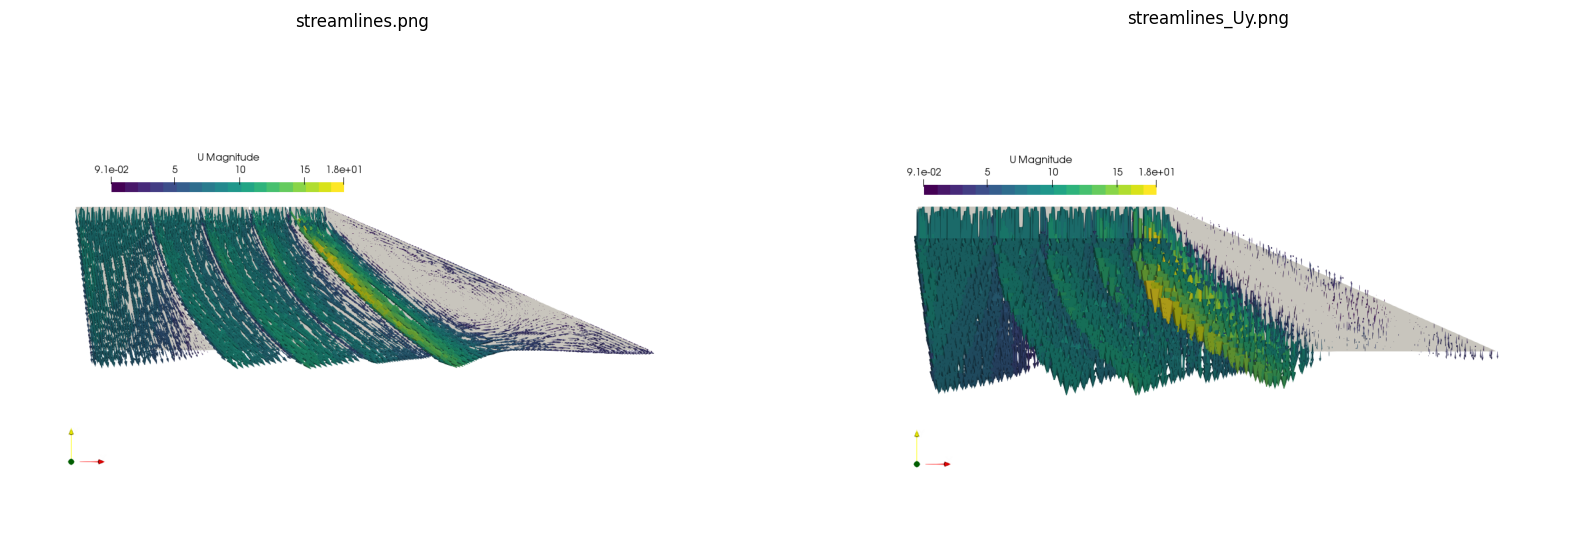

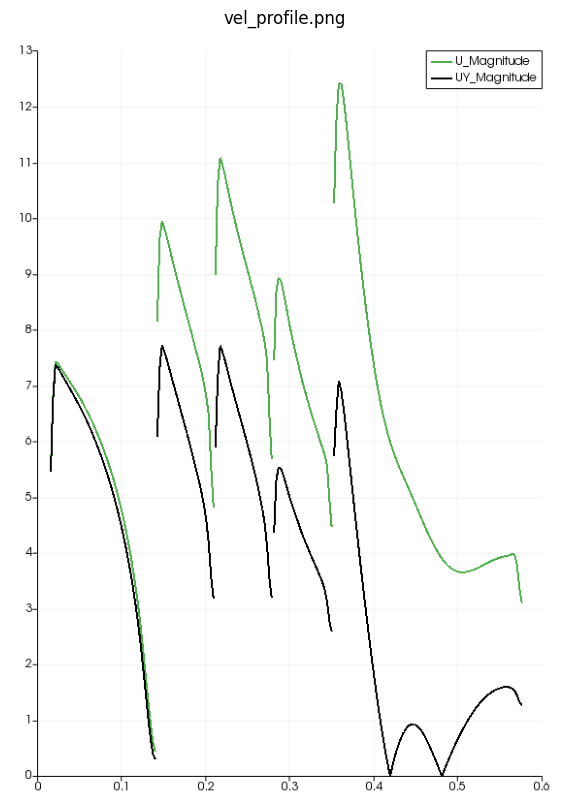

In [77]:
CoV_outlets = []; UI_outlets = []; averaged_velocities = [];


# Specify the directory where your CSV files are located
df = pd.read_csv(os.path.join(folder_path, csv_files[7]))


outlet_1= df.iloc[0:42,0]
outlet_y = extract_y_component(outlet_1, 1)
outlet_x = extract_y_component(outlet_1, 0)
vel_mag = np.sqrt(outlet_y**2)
CoV_outlets.append(np.abs(statistics.stdev(vel_mag) / np.mean(vel_mag)))
UI_outlets.append(np.abs(1-CoV_outlets[-1]))
averaged_velocities.append(np.mean(vel_mag))


outlet_2 = df.iloc[0:23,1] 
outlet_y = extract_y_component(outlet_2, 1) 
outlet_x = extract_y_component(outlet_2, 0)
vel_mag = np.sqrt(outlet_y**2)
CoV_outlets.append(np.abs(statistics.stdev(vel_mag) / np.mean(vel_mag)))
UI_outlets.append(np.abs(1-CoV_outlets[-1]))
averaged_velocities.append(np.mean(vel_mag))


outlet_3 = df.iloc[0:23,2];
outlet_y = extract_y_component(outlet_3, 1)
outlet_x = extract_y_component(outlet_3, 0)
vel_mag = np.sqrt(outlet_y**2)
CoV_outlets.append(np.abs(statistics.stdev(vel_mag) / np.mean(vel_mag)))
UI_outlets.append(np.abs(1-CoV_outlets[-1]))
averaged_velocities.append(np.mean(vel_mag))


outlet_4 = df.iloc[0:24,3]
outlet_y = extract_y_component(outlet_4, 1)
outlet_x = extract_y_component(outlet_4, 0)
vel_mag = np.sqrt(outlet_y**2)
CoV_outlets.append(np.abs(statistics.stdev(vel_mag) / np.mean(vel_mag)))
UI_outlets.append(np.abs(1-CoV_outlets[-1]))
averaged_velocities.append(np.mean(vel_mag))


outlet_5 = df.iloc[0:75,4]
outlet_y = extract_y_component(outlet_5, 1) 
outlet_x = extract_y_component(outlet_5, 0)
vel_mag = np.sqrt(outlet_y**2)
CoV_outlets.append(np.abs(statistics.stdev(vel_mag) / np.mean(vel_mag)))
UI_outlets.append(np.abs(1-CoV_outlets[-1]))
averaged_velocities.append(np.mean(vel_mag))


outlet_overall = df.iloc[0:187,5]
outlet_y = extract_y_component(outlet_overall, 1) 
outlet_x = extract_y_component(outlet_overall, 0)
vel_mag = np.sqrt(outlet_y**2)
CoV_outlets.append(np.abs(statistics.stdev(vel_mag) / np.mean(vel_mag)))
UI_outlets.append(np.abs(1-CoV_outlets[-1]))
averaged_velocities.append(np.mean(vel_mag))
std_dev = statistics.stdev(vel_mag)

# Convert each element to a standard Python float
CoV_outlets = [float(value) for value in CoV_outlets];
UI_outlets = [float(value) for value in UI_outlets];

names = ["Outlet 1", "Outlet 2", "Outlet 3", "Outlet 4", "Outlet 5", "Overall"]

df = pd.DataFrame({
    "Name": names,
    "CoV outlet": CoV_outlets,
    "UI outlet": UI_outlets, 
    "Average |U|": averaged_velocities
})

print(df)
print("\n"*2)
print("Overall standard deviation at outlet: ", std_dev)



# Specify the directory where your PNG files are located
image_dir = '/home/affu5154/OpenFOAM/affu5154-9/run/pygmsh/Mesh_gmsh/Header/Optimized_trials/Trial_5_curved/2nd_order_4vanes_1.0'
# List all files in the folder
files_image = os.listdir(image_dir)
# Filter out PNG files
png_files = sorted([f for f in files_image if f.endswith('.png')], reverse=False)
images = []

# Load the images and store them in the array
for png_file in png_files:
    full_image_path = os.path.join(image_dir, png_file)  # Use a new variable to store the full path
    image = Image.open(full_image_path)
    images.append(np.array(image))

fig, axes = plt.subplots(1, 2, figsize=(20, 20))  # Adjust the figsize as needed

# Ensure axes is iterable
if not isinstance(axes, (list, np.ndarray)):
    axes = [axes]
image_indices = [1, 2]

# Display the specific images on each subplot
for ax, image_index in zip(axes, image_indices):
    ax.imshow(images[image_index])
    ax.axis('off')  # Hide the axis
    ax.set_title(png_files[image_index])  # Set the title to the filename

plt.show()

fig, axes = plt.subplots(1, 1, figsize=(10, 10))  # Adjust the figsize as needed

# Ensure axes is iterable
if not isinstance(axes, (list, np.ndarray)):
    axes = [axes]
image_indices = [3]

# Display the specific images on each subplot
for ax, image_index in zip(axes, image_indices):
    ax.imshow(images[image_index])
    ax.axis('off')  # Hide the axis
    ax.set_title(png_files[image_index])  # Set the title to the filename

plt.show()

##### 3 vanes

       Name  CoV outlet  UI outlet  Average |U|
0  Outlet 1    0.527787   0.472213     5.439100
1  Outlet 2    0.206752   0.793248     6.014212
2  Outlet 3    0.195300   0.804700     4.317345
3  Outlet 4    1.048491   0.048491     1.738058
4   Overall    0.715595   0.284405     3.881492



Overall standard deviation at outlet:  2.7775758554647143


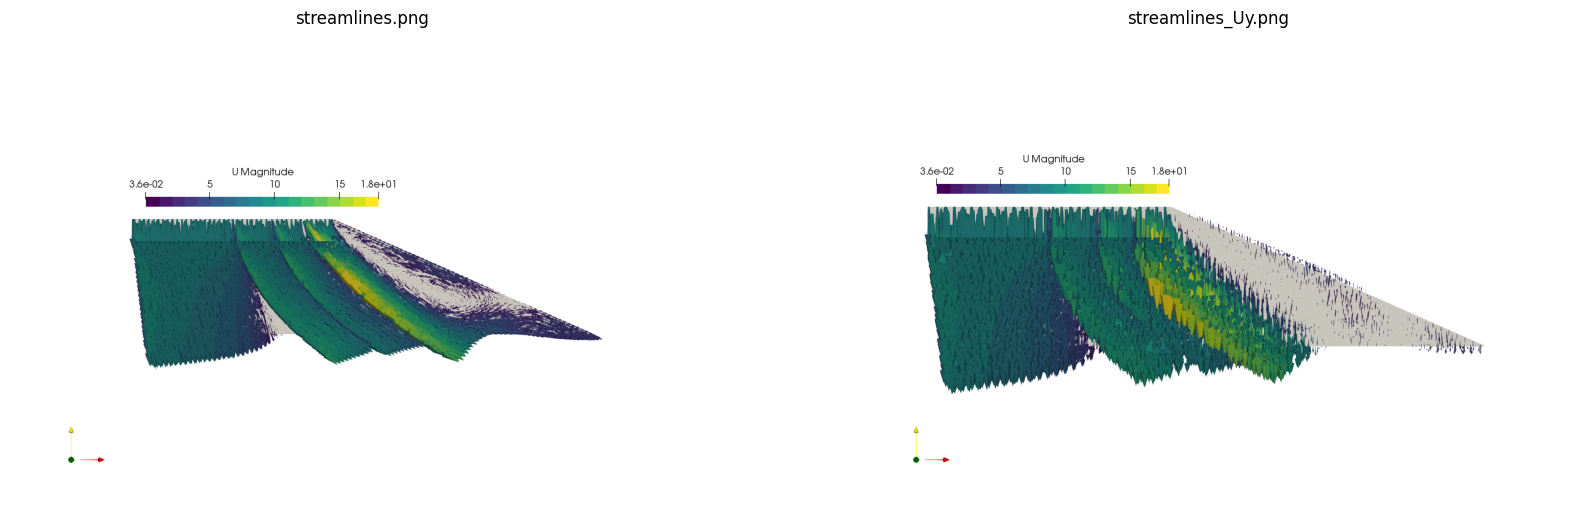

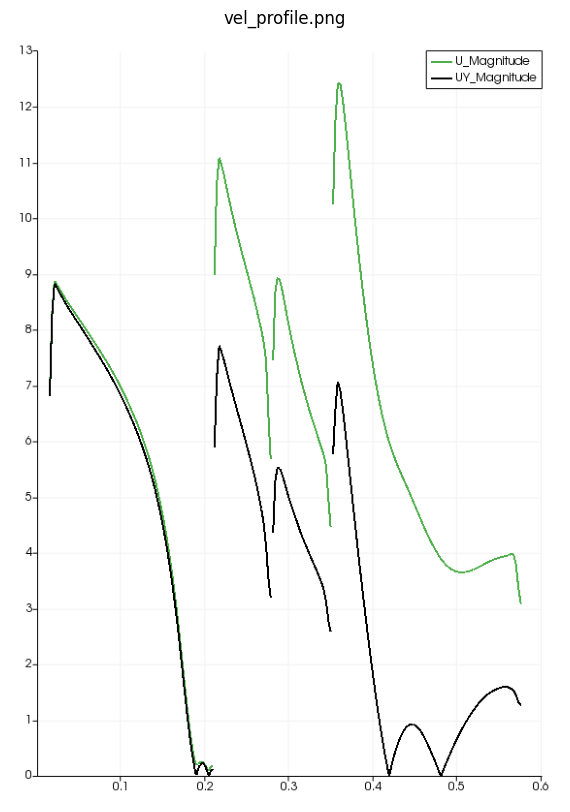

In [78]:
CoV_outlets = []; UI_outlets = []; averaged_velocities = [];


# Specify the directory where your CSV files are located
df = pd.read_csv(os.path.join(folder_path, csv_files[4]))


outlet_1= df.iloc[0:65,0]
outlet_y = extract_y_component(outlet_1, 1)
outlet_x = extract_y_component(outlet_1, 0)
vel_mag = np.sqrt(outlet_y**2)
CoV_outlets.append(np.abs(statistics.stdev(vel_mag) / np.mean(vel_mag)))
UI_outlets.append(np.abs(1-CoV_outlets[-1]))
averaged_velocities.append(np.mean(vel_mag))


outlet_2 = df.iloc[0:23,1] 
outlet_y = extract_y_component(outlet_2, 1) 
outlet_x = extract_y_component(outlet_2, 0)
vel_mag = np.sqrt(outlet_y**2)
CoV_outlets.append(np.abs(statistics.stdev(vel_mag) / np.mean(vel_mag)))
UI_outlets.append(np.abs(1-CoV_outlets[-1]))
averaged_velocities.append(np.mean(vel_mag))


outlet_3 = df.iloc[0:24,2];
outlet_y = extract_y_component(outlet_3, 1)
outlet_x = extract_y_component(outlet_3, 0)
vel_mag = np.sqrt(outlet_y**2)
CoV_outlets.append(np.abs(statistics.stdev(vel_mag) / np.mean(vel_mag)))
UI_outlets.append(np.abs(1-CoV_outlets[-1]))
averaged_velocities.append(np.mean(vel_mag))


outlet_4 = df.iloc[0:75,3]
outlet_y = extract_y_component(outlet_4, 1)
outlet_x = extract_y_component(outlet_4, 0)
vel_mag = np.sqrt(outlet_y**2)
CoV_outlets.append(np.abs(statistics.stdev(vel_mag) / np.mean(vel_mag)))
UI_outlets.append(np.abs(1-CoV_outlets[-1]))
averaged_velocities.append(np.mean(vel_mag))


outlet_overall = df.iloc[0:187,4]
outlet_y = extract_y_component(outlet_overall, 1)
outlet_x = extract_y_component(outlet_overall, 0)
vel_mag = np.sqrt(outlet_y**2)
CoV_outlets.append(np.abs(statistics.stdev(vel_mag) / np.mean(vel_mag)))
UI_outlets.append(np.abs(1-CoV_outlets[-1]))
averaged_velocities.append(np.mean(vel_mag))
std_dev = statistics.stdev(vel_mag)


# Convert each element to a standard Python float
CoV_outlets = [float(value) for value in CoV_outlets];
UI_outlets = [float(value) for value in UI_outlets];

names = ["Outlet 1", "Outlet 2", "Outlet 3", "Outlet 4", "Overall"]

df = pd.DataFrame({
    "Name": names,
    "CoV outlet": CoV_outlets,
    "UI outlet": UI_outlets, 
    "Average |U|": averaged_velocities
})

print(df)
print("\n"*2)
print("Overall standard deviation at outlet: ", std_dev)



# Specify the directory where your PNG files are located
image_dir = '/home/affu5154/OpenFOAM/affu5154-9/run/pygmsh/Mesh_gmsh/Header/Optimized_trials/Trial_5_curved/3_vanes_2.0'
# List all files in the folder
files_image = os.listdir(image_dir)
# Filter out PNG files
png_files = sorted([f for f in files_image if f.endswith('.png')], reverse=False)
images = []

# Load the images and store them in the array
for png_file in png_files:
    full_image_path = os.path.join(image_dir, png_file)  # Use a new variable to store the full path
    image = Image.open(full_image_path)
    images.append(np.array(image))

fig, axes = plt.subplots(1, 2, figsize=(20, 20))  # Adjust the figsize as needed

# Ensure axes is iterable
if not isinstance(axes, (list, np.ndarray)):
    axes = [axes]
image_indices = [0, 1]

# Display the specific images on each subplot
for ax, image_index in zip(axes, image_indices):
    ax.imshow(images[image_index])
    ax.axis('off')  # Hide the axis
    ax.set_title(png_files[image_index])  # Set the title to the filename

plt.show()

fig, axes = plt.subplots(1, 1, figsize=(10, 10))  # Adjust the figsize as needed

# Ensure axes is iterable
if not isinstance(axes, (list, np.ndarray)):
    axes = [axes]
image_indices = [2]

# Display the specific images on each subplot
for ax, image_index in zip(axes, image_indices):
    ax.imshow(images[image_index])
    ax.axis('off')  # Hide the axis
    ax.set_title(png_files[image_index])  # Set the title to the filename

plt.show()

### Partial Designs

##### $\frac{1}{3}^{rd}$ vanes

##### Straights

['10_straight_vanes_2.0.csv', '1_straight_vanes_2.0.csv', '27k_simple.csv', '2_straight_vanes_2.0.csv', '3_curved_vanes_2.0.csv', '3_straight_vanes_1.0.csv', '47k.csv', '4_curved_vanes_2.0.csv', '4_straight_vanes_2.0.csv', '5_curved_vanes_2.0.csv', '5_partial13rd_curved_2.0.csv', '5_partial13rd_straight_2.0.csv', '5_partial23rd_curved_2.0.csv', '5_partial23rd_straight_2.0.csv', '5_straight_vanes_2.0.csv', '6_straight_vanes_2.0.csv', '7_straight_vanes_2.0.csv', '8_straight_vanes_2.0.csv', '9_straight_vanes_2.0.csv', '9k.csv']



        Name  CoV outlet  UI outlet  Average |U|
0  Straights    0.505908   0.494092     3.641778
1     Curved    0.268327   0.731673     3.638188



Overall standard deviation at straight vaned-outlet:  1.842404611199261
Overall standard deviation at curved vaned-outlet:  0.976224822065499


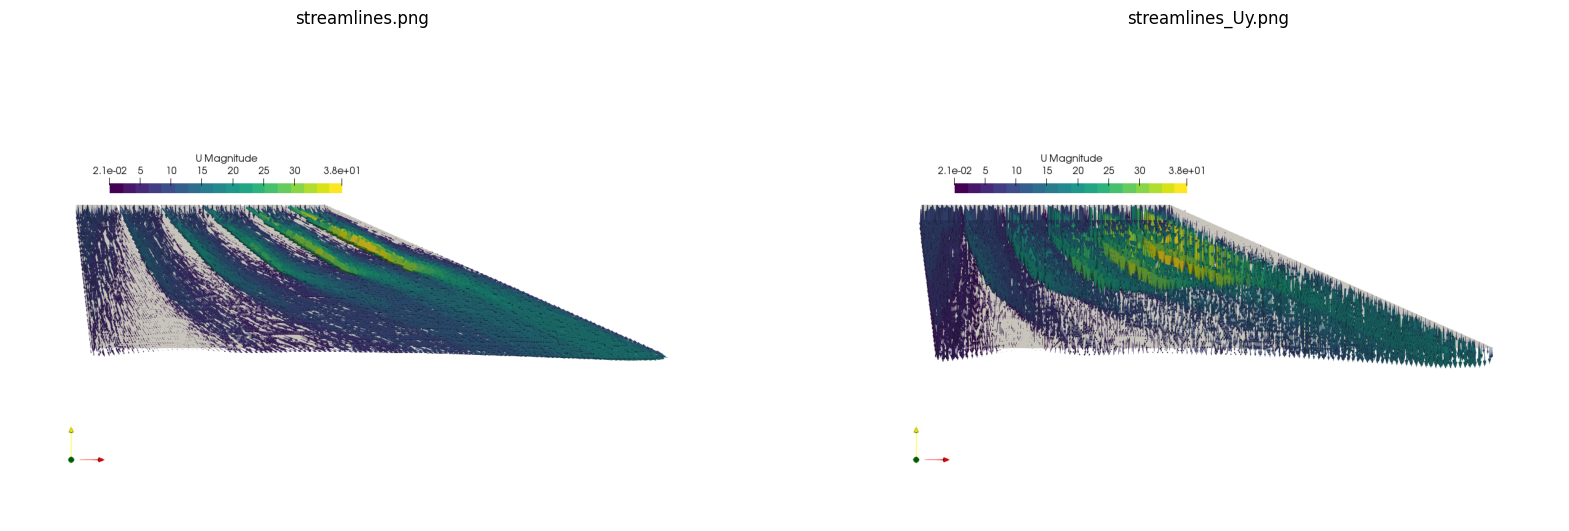

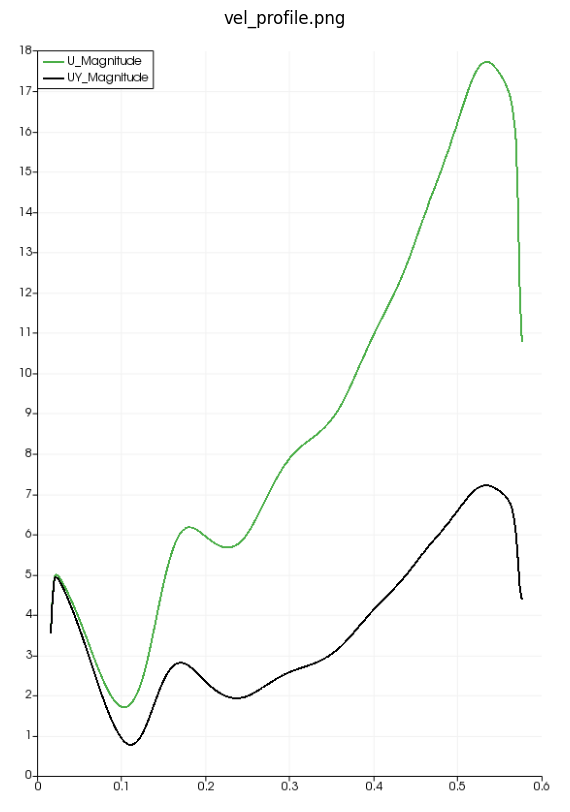

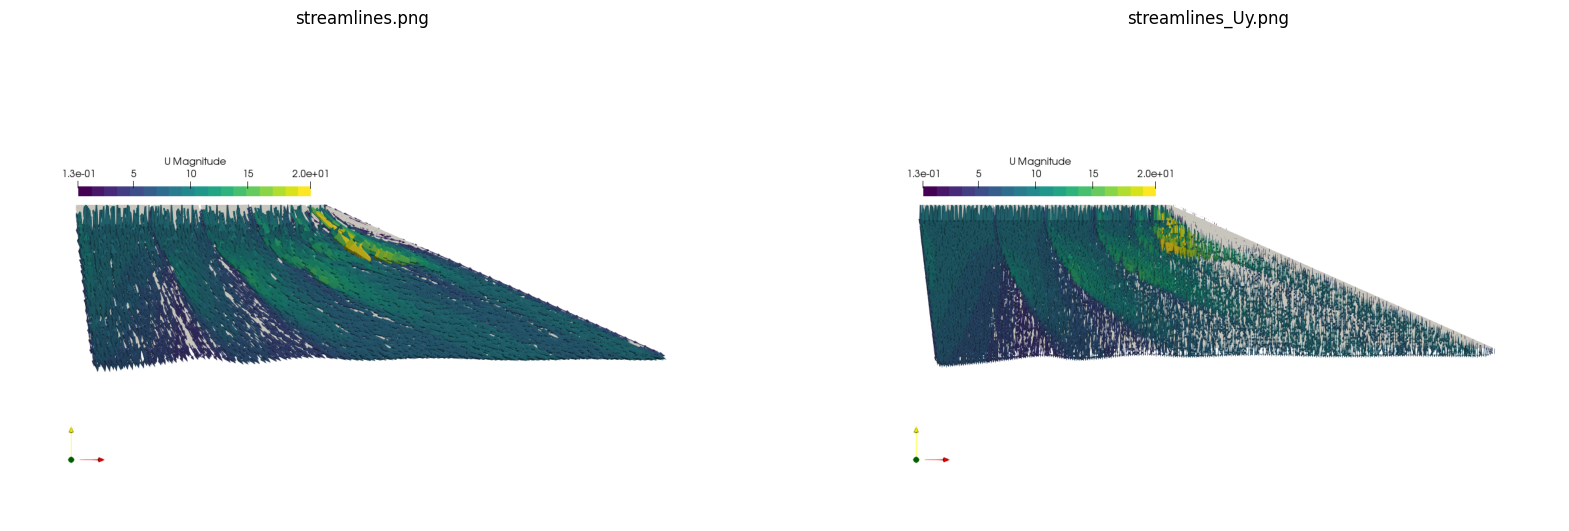

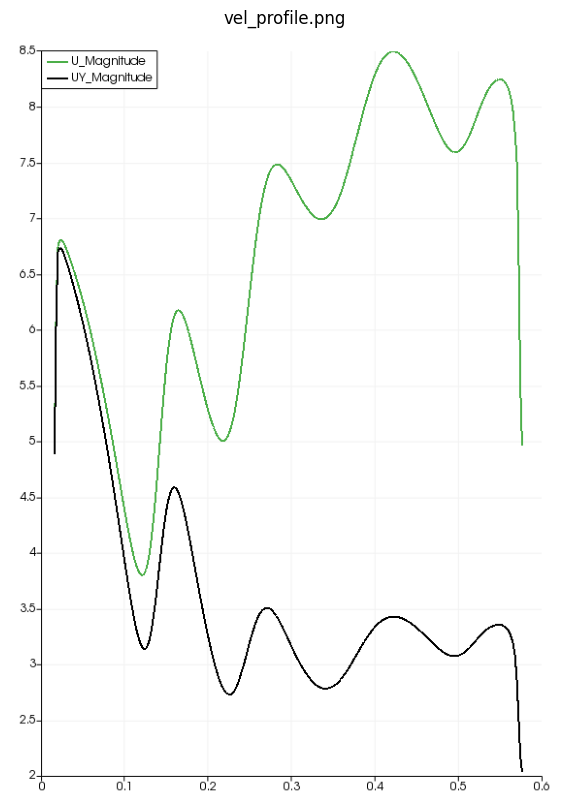

In [79]:
CoV_outlets = []; UI_outlets = []; averaged_velocities = [];
print(csv_files)
df = pd.read_csv(os.path.join(folder_path, csv_files[11]))


outlet_overall = df.iloc[0:229,0]
outlet_y = extract_y_component(outlet_overall, 1)
outlet_x = extract_y_component(outlet_overall, 0)
vel_mag = np.sqrt(outlet_y**2)
CoV_outlets.append(np.abs(statistics.stdev(vel_mag) / np.mean(vel_mag)))
UI_outlets.append(np.abs(1-CoV_outlets[-1]))
averaged_velocities.append(np.mean(vel_mag))
std_dev_straight = statistics.stdev(vel_mag)


df = pd.read_csv(os.path.join(folder_path, csv_files[10]))


outlet_overall = df.iloc[0:261,0]
outlet_y = extract_y_component(outlet_overall, 1)
outlet_x = extract_y_component(outlet_overall, 0)
vel_mag = np.sqrt(outlet_y**2)
CoV_outlets.append(np.abs(statistics.stdev(vel_mag) / np.mean(vel_mag)))
UI_outlets.append(np.abs(1-CoV_outlets[-1]))
averaged_velocities.append(np.mean(vel_mag))
std_dev_curved = statistics.stdev(vel_mag)

# Convert each element to a standard Python float
CoV_outlets = [float(value) for value in CoV_outlets];
UI_outlets = [float(value) for value in UI_outlets];
print("\n"*2)
names = ["Straights", "Curved"]

df = pd.DataFrame({
    "Name": names,
    "CoV outlet": CoV_outlets,
    "UI outlet": UI_outlets, 
    "Average |U|": averaged_velocities
})

print(df)
print("\n"*2)
print("Overall standard deviation at straight vaned-outlet: ", std_dev_straight)
print("Overall standard deviation at curved vaned-outlet: ", std_dev_curved)




# Specify the directory where your PNG files are located
image_dir = '/home/affu5154/OpenFOAM/affu5154-9/run/pygmsh/Mesh_gmsh/Header/Optimized_trials/Trial_6_partial/one_third/5vanes_straight_2.0'
# List all files in the folder
files_image = os.listdir(image_dir)
# Filter out PNG files
png_files = sorted([f for f in files_image if f.endswith('.png')], reverse=False)
images = []

# Load the images and store them in the array
for png_file in png_files:
    full_image_path = os.path.join(image_dir, png_file)  # Use a new variable to store the full path
    image = Image.open(full_image_path)
    images.append(np.array(image))

fig, axes = plt.subplots(1, 2, figsize=(20, 20))  # Adjust the figsize as needed

# Ensure axes is iterable
if not isinstance(axes, (list, np.ndarray)):
    axes = [axes]
image_indices = [2, 3]

# Display the specific images on each subplot
for ax, image_index in zip(axes, image_indices):
    ax.imshow(images[image_index])
    ax.axis('off')  # Hide the axis
    ax.set_title(png_files[image_index])  # Set the title to the filename

plt.show()

fig, axes = plt.subplots(1, 1, figsize=(10, 10))  # Adjust the figsize as needed

# Ensure axes is iterable
if not isinstance(axes, (list, np.ndarray)):
    axes = [axes]
image_indices = [4]

# Display the specific images on each subplot
for ax, image_index in zip(axes, image_indices):
    ax.imshow(images[image_index])
    ax.axis('off')  # Hide the axis
    ax.set_title(png_files[image_index])  # Set the title to the filename

plt.show()



# Specify the directory where your PNG files are located
image_dir = '/home/affu5154/OpenFOAM/affu5154-9/run/pygmsh/Mesh_gmsh/Header/Optimized_trials/Trial_6_partial/one_third/5vanes_curved_2.0'
# List all files in the folder
files_image = os.listdir(image_dir)
# Filter out PNG files
png_files = sorted([f for f in files_image if f.endswith('.png')], reverse=False)
images = []

# Load the images and store them in the array
for png_file in png_files:
    full_image_path = os.path.join(image_dir, png_file)  # Use a new variable to store the full path
    image = Image.open(full_image_path)
    images.append(np.array(image))

fig, axes = plt.subplots(1, 2, figsize=(20, 20))  # Adjust the figsize as needed

# Ensure axes is iterable
if not isinstance(axes, (list, np.ndarray)):
    axes = [axes]
image_indices = [2, 3]

# Display the specific images on each subplot
for ax, image_index in zip(axes, image_indices):
    ax.imshow(images[image_index])
    ax.axis('off')  # Hide the axis
    ax.set_title(png_files[image_index])  # Set the title to the filename

plt.show()

fig, axes = plt.subplots(1, 1, figsize=(10, 10))  # Adjust the figsize as needed

# Ensure axes is iterable
if not isinstance(axes, (list, np.ndarray)):
    axes = [axes]
image_indices = [4]

# Display the specific images on each subplot
for ax, image_index in zip(axes, image_indices):
    ax.imshow(images[image_index])
    ax.axis('off')  # Hide the axis
    ax.set_title(png_files[image_index])  # Set the title to the filename

plt.show()

##### $\frac{2}{3}^{rd}$ vanes

['10_straight_vanes_2.0.csv', '1_straight_vanes_2.0.csv', '27k_simple.csv', '2_straight_vanes_2.0.csv', '3_curved_vanes_2.0.csv', '3_straight_vanes_1.0.csv', '47k.csv', '4_curved_vanes_2.0.csv', '4_straight_vanes_2.0.csv', '5_curved_vanes_2.0.csv', '5_partial13rd_curved_2.0.csv', '5_partial13rd_straight_2.0.csv', '5_partial23rd_curved_2.0.csv', '5_partial23rd_straight_2.0.csv', '5_straight_vanes_2.0.csv', '6_straight_vanes_2.0.csv', '7_straight_vanes_2.0.csv', '8_straight_vanes_2.0.csv', '9_straight_vanes_2.0.csv', '9k.csv']



        Name  CoV outlet  UI outlet  Average |U|
0  Straights    0.347217   0.652783     3.638574
1     Curved    0.455235   0.544765     3.636161



Overall standard deviation at straight vaned-outlet:  1.2633732470316352
Overall standard deviation at curved vaned-outlet:  1.6553080746233093


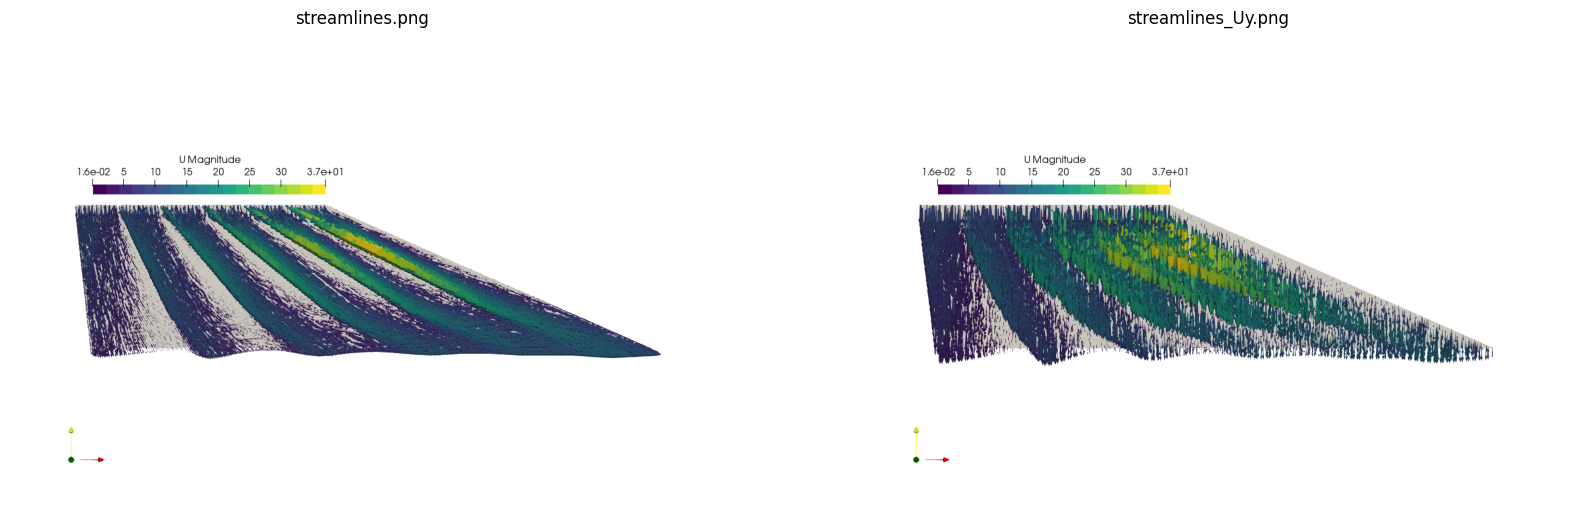

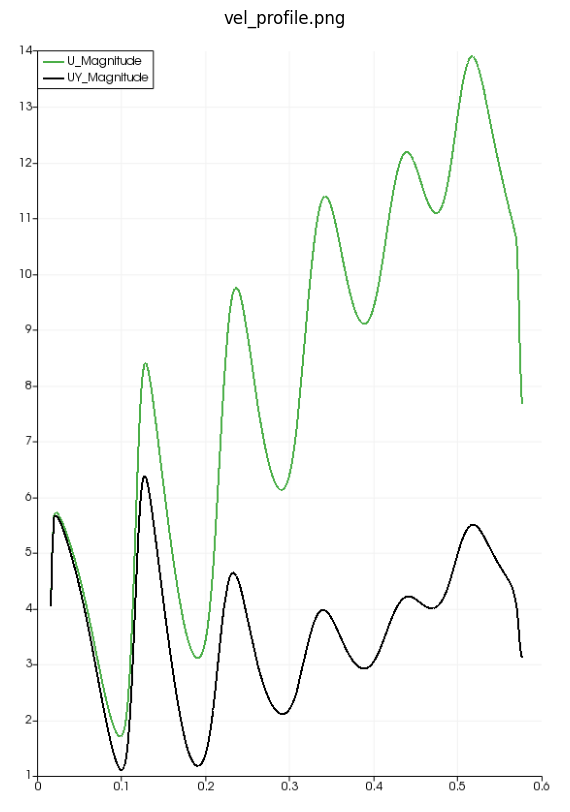

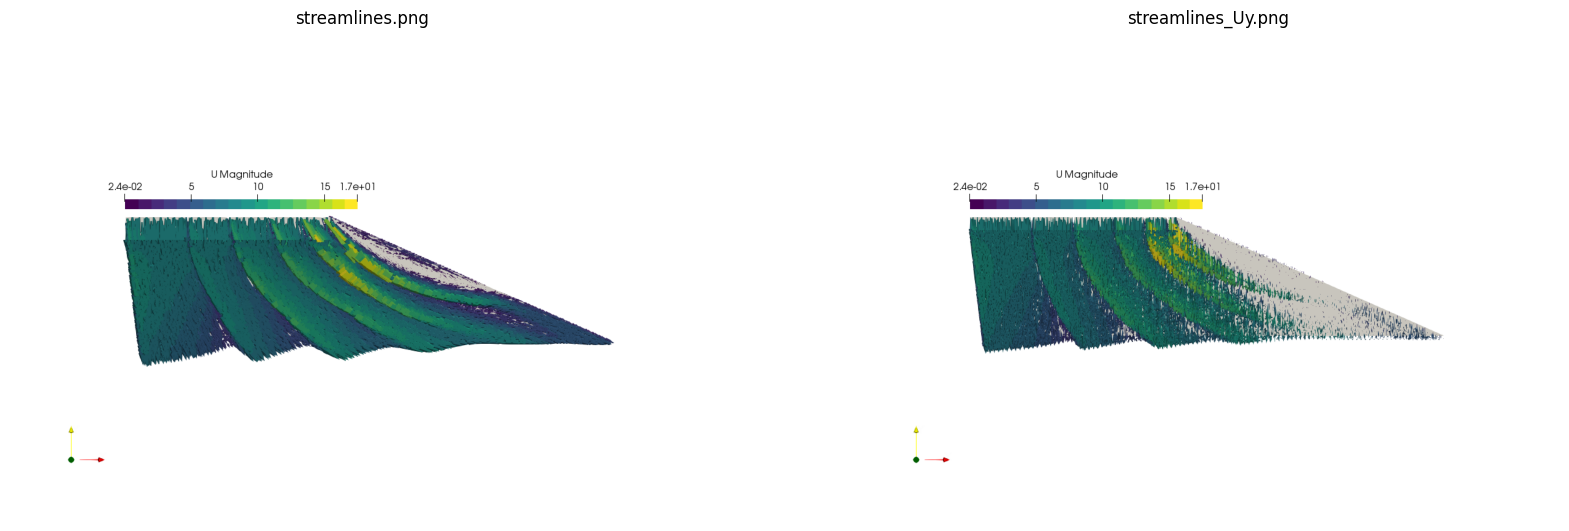

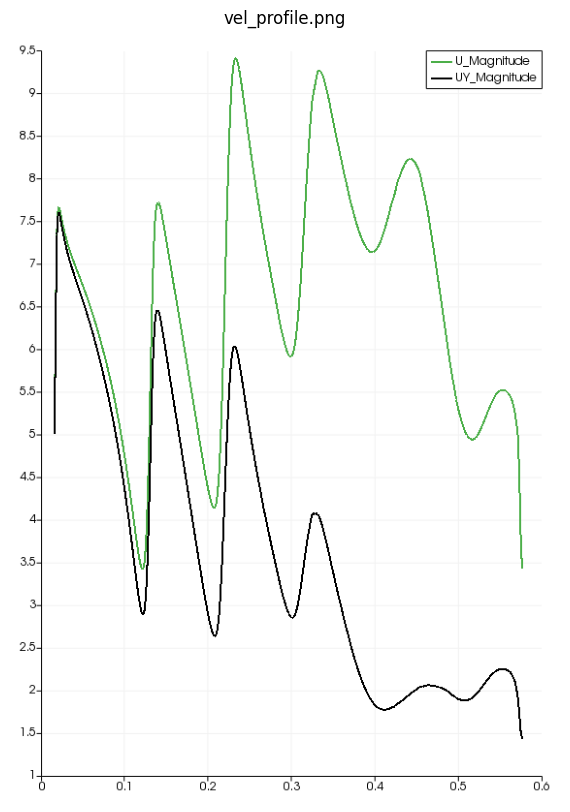

In [80]:
CoV_outlets = []; UI_outlets = []; averaged_velocities = [];
print(csv_files)
df = pd.read_csv(os.path.join(folder_path, csv_files[13]))


outlet_overall = df.iloc[0:261,0]
outlet_y = extract_y_component(outlet_overall, 1)
outlet_x = extract_y_component(outlet_overall, 0)
vel_mag = np.sqrt(outlet_y**2)
CoV_outlets.append(np.abs(statistics.stdev(vel_mag) / np.mean(vel_mag)))
UI_outlets.append(np.abs(1-CoV_outlets[-1]))
averaged_velocities.append(np.mean(vel_mag))
std_dev_straight = statistics.stdev(vel_mag)


df = pd.read_csv(os.path.join(folder_path, csv_files[12]))


outlet_overall = df.iloc[0:321,0]
outlet_y = extract_y_component(outlet_overall, 1)
outlet_x = extract_y_component(outlet_overall, 0)
vel_mag = np.sqrt(outlet_y**2)
CoV_outlets.append(np.abs(statistics.stdev(vel_mag) / np.mean(vel_mag)))
UI_outlets.append(np.abs(1-CoV_outlets[-1]))
averaged_velocities.append(np.mean(vel_mag))
std_dev_curved = statistics.stdev(vel_mag)

# Convert each element to a standard Python float
CoV_outlets = [float(value) for value in CoV_outlets];
UI_outlets = [float(value) for value in UI_outlets];
print("\n"*2)
names = ["Straights", "Curved"]

df = pd.DataFrame({
    "Name": names,
    "CoV outlet": CoV_outlets,
    "UI outlet": UI_outlets, 
    "Average |U|": averaged_velocities
})

print(df)
print("\n"*2)
print("Overall standard deviation at straight vaned-outlet: ", std_dev_straight)
print("Overall standard deviation at curved vaned-outlet: ", std_dev_curved)




# Specify the directory where your PNG files are located
image_dir = '/home/affu5154/OpenFOAM/affu5154-9/run/pygmsh/Mesh_gmsh/Header/Optimized_trials/Trial_6_partial/two_third/5vanes_straight_2.0'
# List all files in the folder
files_image = os.listdir(image_dir)
# Filter out PNG files
png_files = sorted([f for f in files_image if f.endswith('.png')], reverse=False)
images = []

# Load the images and store them in the array
for png_file in png_files:
    full_image_path = os.path.join(image_dir, png_file)  # Use a new variable to store the full path
    image = Image.open(full_image_path)
    images.append(np.array(image))

fig, axes = plt.subplots(1, 2, figsize=(20, 20))  # Adjust the figsize as needed

# Ensure axes is iterable
if not isinstance(axes, (list, np.ndarray)):
    axes = [axes]
image_indices = [2, 3]

# Display the specific images on each subplot
for ax, image_index in zip(axes, image_indices):
    ax.imshow(images[image_index])
    ax.axis('off')  # Hide the axis
    ax.set_title(png_files[image_index])  # Set the title to the filename

plt.show()

fig, axes = plt.subplots(1, 1, figsize=(10, 10))  # Adjust the figsize as needed

# Ensure axes is iterable
if not isinstance(axes, (list, np.ndarray)):
    axes = [axes]
image_indices = [4]

# Display the specific images on each subplot
for ax, image_index in zip(axes, image_indices):
    ax.imshow(images[image_index])
    ax.axis('off')  # Hide the axis
    ax.set_title(png_files[image_index])  # Set the title to the filename

plt.show()



# Specify the directory where your PNG files are located
image_dir = '/home/affu5154/OpenFOAM/affu5154-9/run/pygmsh/Mesh_gmsh/Header/Optimized_trials/Trial_6_partial/two_third/5vanes_curved_2.0'
# List all files in the folder
files_image = os.listdir(image_dir)
# Filter out PNG files
png_files = sorted([f for f in files_image if f.endswith('.png')], reverse=False)
images = []

# Load the images and store them in the array
for png_file in png_files:
    full_image_path = os.path.join(image_dir, png_file)  # Use a new variable to store the full path
    image = Image.open(full_image_path)
    images.append(np.array(image))

fig, axes = plt.subplots(1, 2, figsize=(20, 20))  # Adjust the figsize as needed

# Ensure axes is iterable
if not isinstance(axes, (list, np.ndarray)):
    axes = [axes]
image_indices = [0, 1]

# Display the specific images on each subplot
for ax, image_index in zip(axes, image_indices):
    ax.imshow(images[image_index])
    ax.axis('off')  # Hide the axis
    ax.set_title(png_files[image_index])  # Set the title to the filename

plt.show()

fig, axes = plt.subplots(1, 1, figsize=(10, 10))  # Adjust the figsize as needed

# Ensure axes is iterable
if not isinstance(axes, (list, np.ndarray)):
    axes = [axes]
image_indices = [2]

# Display the specific images on each subplot
for ax, image_index in zip(axes, image_indices):
    ax.imshow(images[image_index])
    ax.axis('off')  # Hide the axis
    ax.set_title(png_files[image_index])  # Set the title to the filename

plt.show()

### A visual comparison between all the design iterations

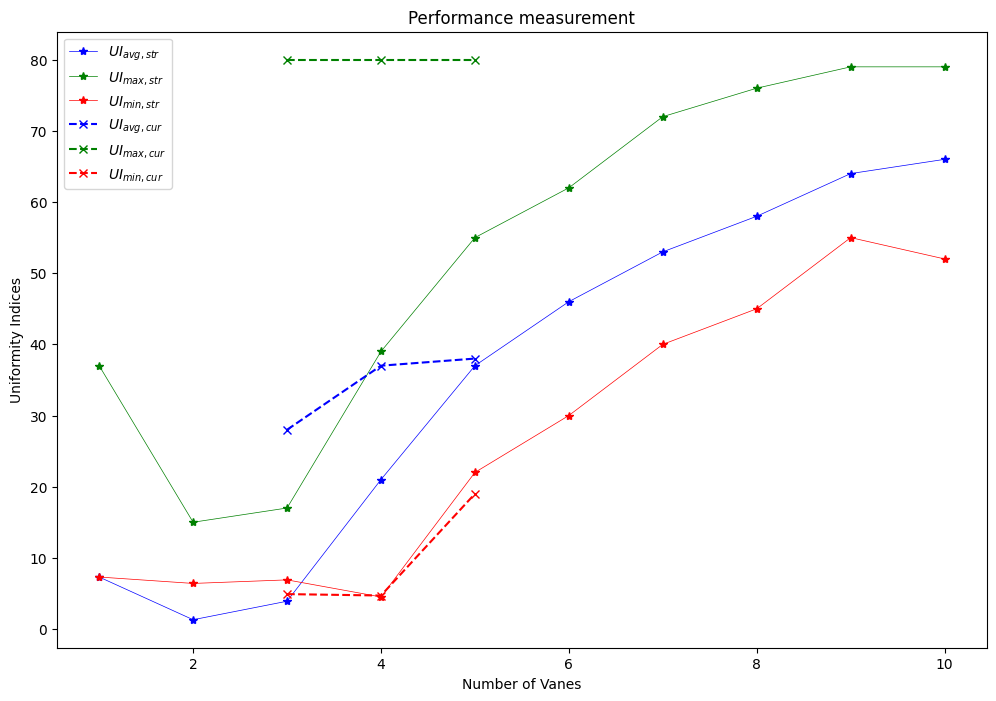

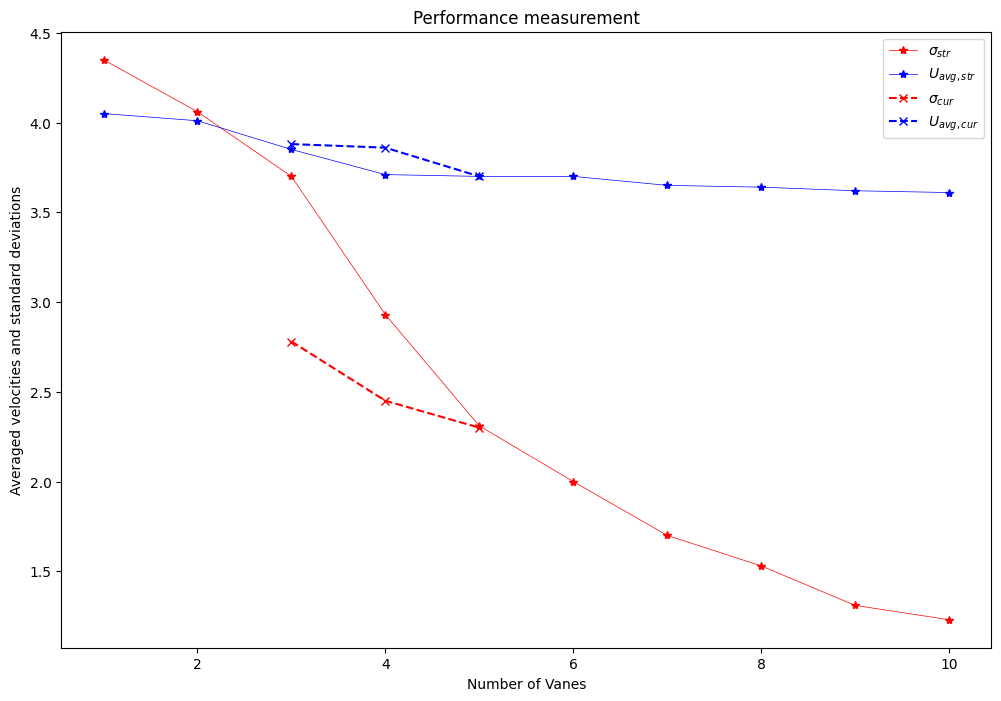

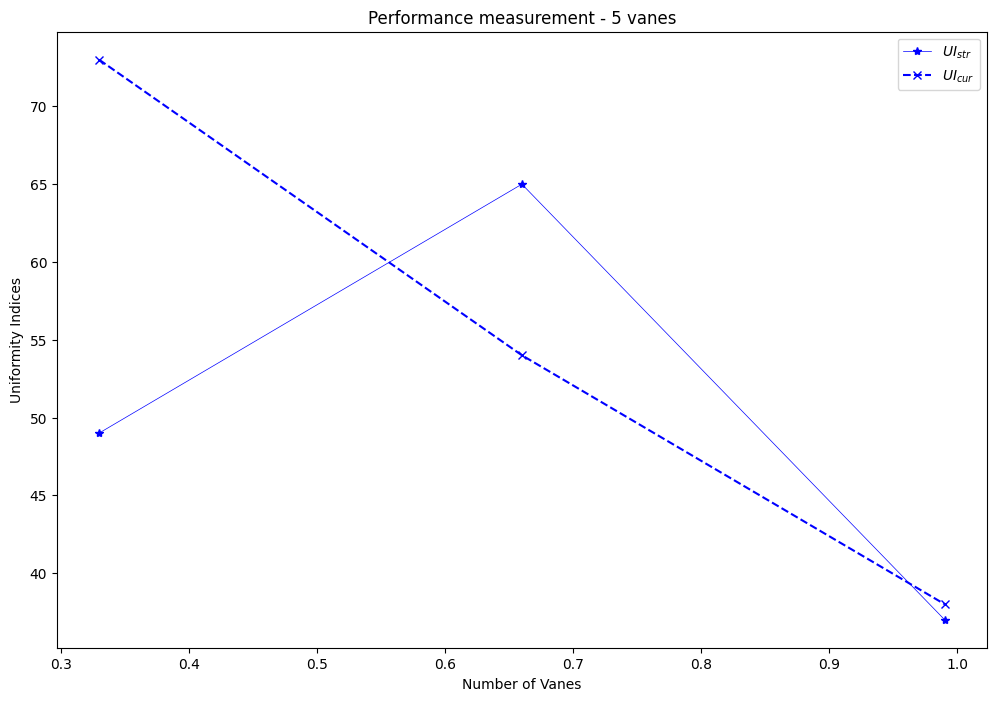

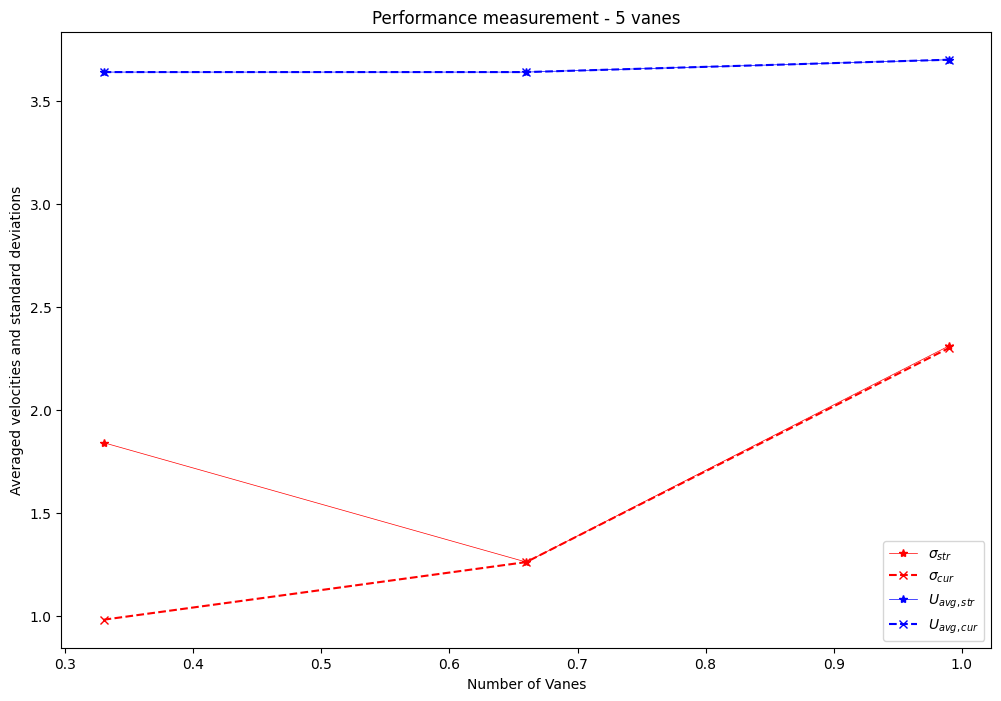

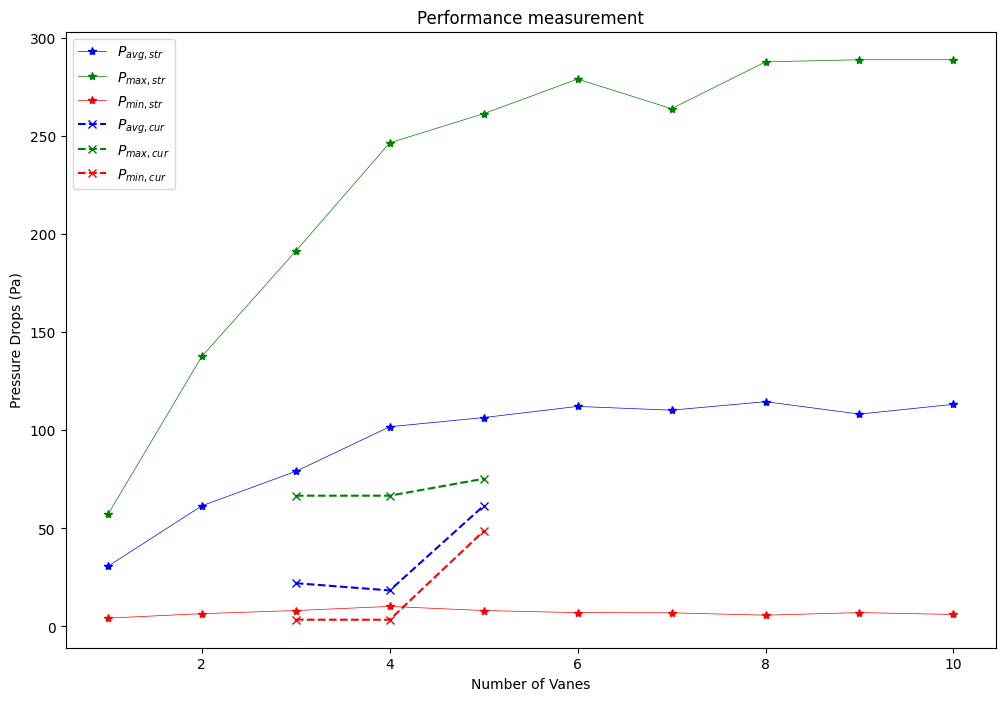

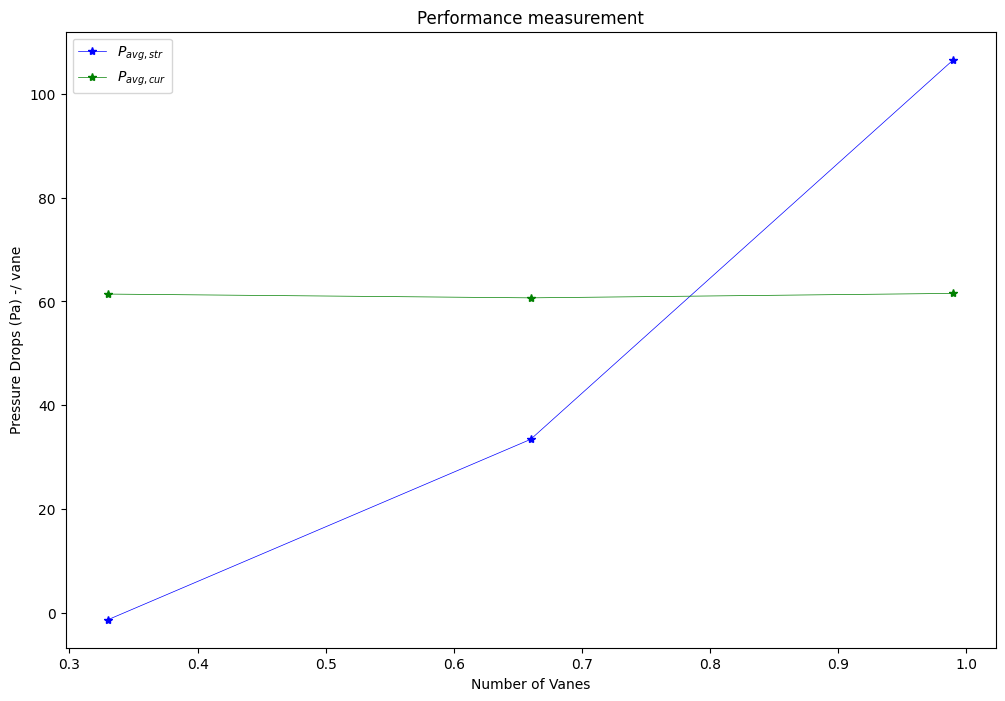

In [11]:
UI_avg_straights = [0.073*100, 0.013*100, 0.039*100, 0.21*100, 0.37*100, 0.46*100, 0.53*100, 0.58*100, 0.64*100, 0.66*100]
UI_max_straights = [0.37*100, 0.15*100, 0.17*100, 0.39*100, 0.55*100, 0.62*100, 0.72*100, 0.76*100, 0.79*100, 0.79*100]
UI_min_straights = [0.073*100, 0.064*100, 0.069*100, 0.045*100, 0.22*100, 0.30*100, 0.40*100, 0.45*100, 0.55*100, 0.52*100]
U_avg_straights = [4.05, 4.01, 3.85, 3.71, 3.70, 3.70, 3.65, 3.64, 3.62, 3.61]
std_dev_straights = [4.35, 4.06, 3.7, 2.93, 2.31, 2.00, 1.70, 1.53, 1.31, 1.23]
num_vanes_straight = np.arange(1, 11, 1)


UI_avg_curved = [0.28*100, 0.37*100, 0.38*100]
UI_max_curved = [0.80*100, 0.80*100, 0.80*100]
UI_min_curved = [0.049*100, 0.047*100, 0.19*100]
U_avg_curved = [3.88, 3.86, 3.7]
std_dev_curved = [2.78, 2.45, 2.3]
num_vanes_curved = np.arange(3, 6, 1)

UI_partial_straight = [0.49*100, 0.65*100, 0.37*100]
std_dev_partial_straight = [1.84, 1.26, 2.31]
U_avg_partial_straight = [3.64, 3.64, 3.70]


UI_partial_curved = [0.73*100, 0.54*100, 0.38*100]
std_dev_partial_curved = [0.98, 1.26, 2.3]
U_avg_partial_curved = [3.64, 3.64, 3.70]

partial_lengths = [0.33, 0.66, 0.99]

# Increase the size of the figure
plt.figure(figsize=(12, 8))  # Width = 12 inches, Height = 8 inches

plt.plot(num_vanes_straight, UI_avg_straights, "b", linewidth = 0.5, marker='*', label = r'$UI_{avg,str}$')
plt.plot(num_vanes_straight, UI_max_straights, "g", linewidth = 0.5,  marker='*', label = r'$UI_{max,str}$')
plt.plot(num_vanes_straight, UI_min_straights, "r", linewidth = 0.5,  marker='*', label = r'$UI_{min,str}$')

plt.plot(num_vanes_curved, UI_avg_curved, "b--", linewidth =1.5,  marker='x', label = r'$UI_{avg,cur}$')
plt.plot(num_vanes_curved, UI_max_curved, "g--", linewidth = 1.5, marker='x', label = r'$UI_{max,cur}$')
plt.plot(num_vanes_curved, UI_min_curved, "r--", linewidth = 1.5, marker='x', label = r'$UI_{min,cur}$')

plt.title("Performance measurement")
plt.xlabel("Number of Vanes")
plt.ylabel("Uniformity Indices")
plt.legend()
plt.show()


# Increase the size of the figure
plt.figure(figsize=(12, 8))  # Width = 12 inches, Height = 8 inches

plt.plot(num_vanes_straight, std_dev_straights, "r", linewidth = 0.5,  marker='*', label = r'$\sigma_{str}$')
plt.plot(num_vanes_straight, U_avg_straights, "b", linewidth = 0.5,  marker='*', label = r'$U_{avg,str}$')

plt.plot(num_vanes_curved, std_dev_curved, "r--", linewidth = 1.5, marker='x', label = r'$\sigma_{cur}$')
plt.plot(num_vanes_curved, U_avg_curved, "b--", linewidth = 1.5, marker='x', label = r'$U_{avg,cur}$')

plt.title("Performance measurement")
plt.xlabel("Number of Vanes")
plt.ylabel("Averaged velocities and standard deviations")
plt.legend()
plt.show()

# Increase the size of the figure
plt.figure(figsize=(12, 8))  # Width = 12 inches, Height = 8 inches

plt.plot(partial_lengths, UI_partial_straight, "b", linewidth =0.5, marker='*', label = r'$UI_{str}$')
plt.plot(partial_lengths, UI_partial_curved, "b--", linewidth = 1.5, marker='x', label = r'$UI_{cur}$')

plt.title("Performance measurement - 5 vanes")
plt.xlabel("Number of Vanes")
plt.ylabel("Uniformity Indices")
plt.legend()
plt.show()


# Increase the size of the figure
plt.figure(figsize=(12, 8))  # Width = 12 inches, Height = 8 inches

plt.plot(partial_lengths, std_dev_partial_straight, "r", linewidth = 0.5, marker='*', label = r'$\sigma_{str}$')
plt.plot(partial_lengths, std_dev_partial_curved, "r--", linewidth = 1.5, marker='x', label = r'$\sigma_{cur}$')
plt.plot(partial_lengths, U_avg_partial_straight, "b", linewidth = 0.5, marker='*', label = r'$U_{avg,str}$')
plt.plot(partial_lengths, U_avg_partial_curved, "b--", linewidth = 1.5, marker='x', label = r'$U_{avg,cur}$')

plt.title("Performance measurement - 5 vanes")
plt.xlabel("Number of Vanes")
plt.ylabel("Averaged velocities and standard deviations")
plt.legend()
plt.show()







P_avg_straights = [30.67, 61.53, 79.09, 101.86, 106.53, 112.22, 110.31, 114.64, 108.31, 113.28]
P_max_straights = [57.1, 137.73, 191.48, 246.71, 261.56, 279.22, 264.11, 287.98, 289.08, 289.08]
P_min_straights = [4.23, 6.5, 8.1, 10.184, 8.097, 7.03, 6.94, 5.72, 7.05, 6.1]
num_vanes_straight = np.arange(1, 11, 1)


P_avg_curved = [22.05, 18.36, 61.54]
P_max_curved = [66.68, 66.68, 75.33]
P_min_curved = [3.43, 3.41, 48.63]
num_vanes_curved = np.arange(3, 6, 1)

P_partial_straight = [-1.29, 33.44, 106.53]
P_partial_curved = [61.41, 60.68, 61.54]


partial_lengths = [0.33, 0.66, 0.99]

# Increase the size of the figure
plt.figure(figsize=(12, 8))  # Width = 12 inches, Height = 8 inches

plt.plot(num_vanes_straight, P_avg_straights, "b", linewidth = 0.5, marker='*', label = r'$P_{avg,str}$')
plt.plot(num_vanes_straight, P_max_straights, "g", linewidth = 0.5,  marker='*', label = r'$P_{max,str}$')
plt.plot(num_vanes_straight, P_min_straights, "r", linewidth = 0.5,  marker='*', label = r'$P_{min,str}$')

plt.plot(num_vanes_curved, P_avg_curved, "b--", linewidth =1.5,  marker='x', label = r'$P_{avg,cur}$')
plt.plot(num_vanes_curved, P_max_curved, "g--", linewidth = 1.5, marker='x', label = r'$P_{max,cur}$')
plt.plot(num_vanes_curved, P_min_curved, "r--", linewidth = 1.5, marker='x', label = r'$P_{min,cur}$')

plt.title("Performance measurement")
plt.xlabel("Number of Vanes")
plt.ylabel("Pressure Drops (Pa)")
plt.legend()
plt.show()



# Increase the size of the figure
plt.figure(figsize=(12, 8))  # Width = 12 inches, Height = 8 inches

plt.plot(partial_lengths, P_partial_straight, "b", linewidth = 0.5, marker='*', label = r'$P_{avg,str}$')
plt.plot(partial_lengths, P_partial_curved, "g", linewidth = 0.5,  marker='*', label = r'$P_{avg,cur}$')

plt.title("Performance measurement")
plt.xlabel("Number of Vanes")
plt.ylabel("Pressure Drops (Pa) -/ vane")
plt.legend()
plt.show()





# # Specify the directory where your CSV files are located
# folder_path = '/home/affu5154/OpenFOAM/affu5154-9/run/pygmsh/Mesh_gmsh/Header/Optimized_trials/Gradients/5vanes_2.0'

# # List all CSV files in the directory
# csv_files = sorted([file for file in os.listdir(folder_path) if file.endswith('.csv')])
# # Read the first CSV file with the full path

# df = pd.read_csv(os.path.join(folder_path, csv_files[0]))
# Uy = df.iloc[:,1]
# df = pd.read_csv(os.path.join(folder_path, csv_files[1]))
# Uy_grad = df.iloc[:,1]

# # Increase the size of the figure
# plt.figure(figsize=(12, 8))  # Width = 12 inches, Height = 8 inches
# plt.plot(np.abs(Uy), "b", linewidth = 2.0, marker = '*', label = r'$zeroGradient$')
# plt.plot(np.abs(Uy_grad), "r--", linewidth =1.5, label = r'$fixedGradient = 427$')
# plt.ylabel(r'$U_y$')
# plt.legend()
# plt.show()

#### Optimized Trials

##### Noob

In [106]:
import gmsh
import os
import subprocess
import meshio
import numpy as np
import sys

def header():
    gmsh.initialize()
    gmsh.model.add("Header")


    lc = 3e-3; lc_boundary = 5e-2; z_coor = 0; scale = 1000;

    gmsh.model.geo.addPoint(675.044420652/scale, 941.810501494/scale, z_coor, lc, 1)
    gmsh.model.geo.addPoint(1001.29293311/scale, 797.332371989/scale, z_coor, lc, 2)
    gmsh.model.geo.addPoint(440.29388129/scale, 797.332371989/scale, z_coor, lc, 3)
    gmsh.model.geo.addPoint(425.148947625/scale, 941.810501494/scale, z_coor, lc, 4)

    # Adding 1 mm thick walls

    gmsh.model.geo.addPoint(425.148947625/scale + 0.75*0.249, 941.810501494/scale, z_coor, lc, 5)
    gmsh.model.geo.addPoint(440.29388129/scale + 0.60*0.56, 797.332371989/scale, z_coor, lc, 6)

    gmsh.model.geo.addPoint(425.148947625/scale + 0.25*0.249, 941.810501494/scale, z_coor, lc, 7)
    gmsh.model.geo.addPoint(440.29388129/scale + 0.20*0.56, 797.332371989/scale, z_coor, lc, 8)

    gmsh.model.geo.addLine(1, 2, 9)
    gmsh.model.geo.addLine(2, 6, 10)
    gmsh.model.geo.addLine(6, 8, 11)
    gmsh.model.geo.addLine(8, 3, 12)
    gmsh.model.geo.addLine(3, 4, 13)
    gmsh.model.geo.addLine(4, 7, 14)
    gmsh.model.geo.addLine(7, 5, 15)
    gmsh.model.geo.addLine(5, 1, 16)
    gmsh.model.geo.addLine(7, 8, 17)
    gmsh.model.geo.addLine(5, 6, 18)

    gmsh.model.geo.synchronize()

    gmsh.model.geo.addCurveLoop([14, 17, 12, 13], 1)
    gmsh.model.geo.addCurveLoop([15, 18, 11, -17], 2)
    gmsh.model.geo.addCurveLoop([16, 9, 10, -18], 3)

    gmsh.model.geo.addPlaneSurface([1], 4)
    gmsh.model.geo.addPlaneSurface([2], 5)
    gmsh.model.geo.addPlaneSurface([3], 6)


    # for l in [8]:
    #     gmsh.model.geo.mesh.setTransfiniteCurve(l, 100, "Progression", 1)
    # for l in [5]:
    #     gmsh.model.geo.mesh.setTransfiniteCurve(l, 200, "Progression", 1)
    # for l in [7, 6]:
    #     gmsh.model.geo.mesh.setTransfiniteCurve(l, 150, "Progression", 1)

    gmsh.model.geo.synchronize()

    #Extrusion
    layers = 1; extrude_height = 0.152; extrude_vector = [0, 0, extrude_height];
    ex = gmsh.model.geo.extrude([(2, 4), (2, 5), (2, 6)], extrude_vector[0], extrude_vector[1], extrude_vector[2], numElements = [layers], recombine = True)

    gmsh.model.geo.synchronize()

    surface_ids = sorted([e[1] for e in ex if e[0] == 2])
    volume_ids = sorted([e[1] for e in ex if e[0] == 3])

    # # List of surfaces to display
    # surfaces_to_display = [surface_ids[0], surface_ids[20]]

    print(surface_ids, volume_ids)
    gmsh.model.addPhysicalGroup(3, volume_ids, 1)
    gmsh.model.setPhysicalName(3, 1, "Fluid")

    gmsh.model.addPhysicalGroup(2, [27], 2)
    gmsh.model.setPhysicalName(2, 2, "Inlet_1")
    gmsh.model.addPhysicalGroup(2, [49], 3)
    gmsh.model.setPhysicalName(2, 3, "Inlet_2")
    gmsh.model.addPhysicalGroup(2, [71], 4)
    gmsh.model.setPhysicalName(2, 4, "Inlet_3")

    gmsh.model.addPhysicalGroup(2, [35], 5)
    gmsh.model.setPhysicalName(2, 5, "Outlet_1")
    gmsh.model.addPhysicalGroup(2, [57], 6)
    gmsh.model.setPhysicalName(2, 6, "Outlet_2")
    gmsh.model.addPhysicalGroup(2, [79], 7)
    gmsh.model.setPhysicalName(2, 7, "Outlet_3")

    gmsh.model.addPhysicalGroup(2, [40, 4], 8)
    gmsh.model.setPhysicalName(2, 8, "Side_1")
    gmsh.model.addPhysicalGroup(2, [5, 62], 9)
    gmsh.model.setPhysicalName(2, 9, "Side_2")
    gmsh.model.addPhysicalGroup(2, [6, 84], 10)
    gmsh.model.setPhysicalName(2, 10, "Side_3")

    gmsh.model.addPhysicalGroup(2, [75, 39], 11)
    gmsh.model.setPhysicalName(2, 11, "Walls")
    gmsh.model.addPhysicalGroup(2, [31], 12)
    gmsh.model.setPhysicalName(2, 12, "partition_1")
    gmsh.model.addPhysicalGroup(2, [53], 13)
    gmsh.model.setPhysicalName(2, 13, "partition_2")
    
    # Mesh Generation
    gmsh.model.mesh.generate(3)
    mesh_file = os.path.abspath("Header_unstruct_optimized.msh2")
    gmsh.write(mesh_file)

    # Launch the GUI to see the results:
    if '-nopopup' not in sys.argv:
        gmsh.fltk.run()

    gmsh.finalize()

    # Saving the mesh file, and opening it
    # mesh = meshio.read(mesh_file)

    # # Extract only the necessary parts of the mesh to avoid issues with cell sets
    # cells = [(cell_block.type, cell_block.data) for cell_block in mesh.cells]

    # # Create a new mesh object without cell sets
    # mesh_clean = meshio.Mesh(points=mesh.points, cells=cells)

    # meshio.write("36k_unstruct.vtk", mesh_clean)


if __name__ == "__main__":
    header()

[27, 31, 31, 35, 39, 40, 49, 53, 53, 57, 62, 71, 75, 79, 84] [1, 2, 3]
Info    : Meshing 1D...
Info    : [  0%] Meshing curve 9 (Line)
Info    : [ 10%] Meshing curve 10 (Line)
Info    : [ 10%] Meshing curve 11 (Line)
Info    : [ 20%] Meshing curve 12 (Line)
Info    : [ 20%] Meshing curve 13 (Line)
Info    : [ 20%] Meshing curve 14 (Line)
Info    : [ 30%] Meshing curve 15 (Line)
Info    : [ 30%] Meshing curve 16 (Line)
Info    : [ 30%] Meshing curve 17 (Line)
Info    : [ 40%] Meshing curve 18 (Line)
Info    : [ 40%] Meshing curve 20 (Extruded)
Info    : [ 40%] Meshing curve 21 (Extruded)
Info    : [ 50%] Meshing curve 22 (Extruded)
Info    : [ 50%] Meshing curve 23 (Extruded)
Info    : [ 60%] Meshing curve 25 (Extruded)
Info    : [ 60%] Meshing curve 26 (Extruded)
Info    : [ 60%] Meshing curve 30 (Extruded)
Info    : [ 70%] Meshing curve 34 (Extruded)
Info    : [ 70%] Meshing curve 42 (Extruded)
Info    : [ 70%] Meshing curve 43 (Extruded)
Info    : [ 80%] Meshing curve 44 (Extruded)
I

#### With wall thicknesses


##### demo try

In [2]:
import gmsh
import os
import subprocess
import meshio
import numpy as np
import sys

def header():
    gmsh.initialize()
    gmsh.model.add("Header")


    lc = 3e-3; lc_boundary = 5e-2; z_coor = 0; scale = 1000; thickness = 1;
    

    gmsh.model.geo.addPoint(675.044420652/scale, 941.810501494/scale, z_coor, lc, 1)
    gmsh.model.geo.addPoint(1001.29293311/scale, 797.332371989/scale, z_coor, lc, 2)
    gmsh.model.geo.addPoint(440.29388129/scale + 0.80*0.56 + thickness/scale, 797.332371989/scale, z_coor, lc, 3)
    gmsh.model.geo.addPoint(425.148947625/scale + 0.80*0.249 + thickness/scale, 941.810501494/scale, z_coor, lc, 4)
    gmsh.model.geo.addLine(1, 2, 5)
    gmsh.model.geo.addLine(2, 3, 6)
    gmsh.model.geo.addLine(3, 4, 7)
    gmsh.model.geo.addLine(4, 1, 8)
    gmsh.model.geo.addCurveLoop([5, 6, 7, 8], 1)


    gmsh.model.geo.addPoint(425.148947625/scale + 0.80*0.249 - thickness/scale, 941.810501494/scale, z_coor, lc, 9)
    gmsh.model.geo.addPoint(440.29388129/scale + 0.80*0.56 - thickness/scale, 797.332371989/scale, z_coor, lc, 10)
    gmsh.model.geo.addPoint(440.29388129/scale + 0.60*0.56 + thickness/scale, 797.332371989/scale, z_coor, lc, 11)
    gmsh.model.geo.addPoint(425.148947625/scale + 0.60*0.249 + thickness/scale, 941.810501494/scale, z_coor, lc, 12)
    gmsh.model.geo.addLine(9, 10, 13)
    gmsh.model.geo.addLine(10, 11, 14)
    gmsh.model.geo.addLine(11, 12, 15)
    gmsh.model.geo.addLine(12, 9, 16)
    gmsh.model.geo.addCurveLoop([13, 14, 15, 16], 2)


    gmsh.model.geo.addPoint(425.148947625/scale + 0.20*0.249 - thickness/scale, 941.810501494/scale, z_coor, lc, 17)
    gmsh.model.geo.addPoint(440.29388129/scale + 0.20*0.56 - thickness/scale, 797.332371989/scale, z_coor, lc, 18)
    gmsh.model.geo.addPoint(440.29388129/scale, 797.332371989/scale, z_coor, lc, 19)
    gmsh.model.geo.addPoint(425.148947625/scale, 941.810501494/scale, z_coor, lc, 20)
    gmsh.model.geo.addLine(17, 18, 21)
    gmsh.model.geo.addLine(18, 19, 22)
    gmsh.model.geo.addLine(19, 20, 23)
    gmsh.model.geo.addLine(20, 17, 24)
    gmsh.model.geo.addCurveLoop([21, 22, 23, 24], 3)


    gmsh.model.geo.addPoint(425.148947625/scale + 0.20*0.249 + thickness/scale, 941.810501494/scale, z_coor, lc, 25)
    gmsh.model.geo.addPoint(425.148947625/scale + 0.40*0.249 - thickness/scale, 941.810501494/scale, z_coor, lc, 26)
    gmsh.model.geo.addPoint(440.29388129/scale + 0.40*0.56 - thickness/scale, 797.332371989/scale, z_coor, lc, 28)
    gmsh.model.geo.addPoint(440.29388129/scale + 0.20*0.56 + thickness/scale, 797.332371989/scale, z_coor, lc, 29)
    gmsh.model.geo.addLine(25, 26, 29)
    gmsh.model.geo.addLine(26, 28, 30)
    gmsh.model.geo.addLine(28, 29, 32)
    gmsh.model.geo.addLine(29, 25, 33)
    gmsh.model.geo.addCurveLoop([29, 30, 32, 33], 7)
    

    gmsh.model.geo.addPoint(425.148947625/scale + 0.60*0.249 - thickness/scale, 941.810501494/scale, z_coor, lc, 34)
    gmsh.model.geo.addPoint(440.29388129/scale + 0.60*0.56 - thickness/scale, 797.332371989/scale, z_coor, lc, 35)
    gmsh.model.geo.addPoint(440.29388129/scale + 0.40*0.56 + thickness/scale, 797.332371989/scale, z_coor, lc, 36)
    gmsh.model.geo.addPoint(425.148947625/scale + 0.40*0.249 + thickness/scale, 941.810501494/scale, z_coor, lc, 38)

    gmsh.model.geo.addLine(34, 35, 39)
    gmsh.model.geo.addLine(35, 36, 40)
    gmsh.model.geo.addLine(36, 38, 41)
    gmsh.model.geo.addLine(38, 34, 43)
    gmsh.model.geo.addCurveLoop([39, 40, 41, 43], 9)



    gmsh.model.geo.synchronize()



    gmsh.model.geo.addPlaneSurface([1], 4)
    gmsh.model.geo.addPlaneSurface([2], 5)
    gmsh.model.geo.addPlaneSurface([3], 6)
    gmsh.model.geo.addPlaneSurface([7], 8)
    gmsh.model.geo.addPlaneSurface([9], 10)

    gmsh.model.geo.synchronize()

    #Extrusion
    layers = 1; extrude_height = 0.01; extrude_vector = [0, 0, extrude_height];
    ex = gmsh.model.geo.extrude([(2, 4), (2, 5), (2, 6), (2, 8), (2, 10)], extrude_vector[0], extrude_vector[1], extrude_vector[2], numElements = [layers], recombine = True)

    gmsh.model.geo.synchronize()

    surface_ids = sorted([e[1] for e in ex if e[0] == 2])
    volume_ids = sorted([e[1] for e in ex if e[0] == 3])

    # # List of surfaces to display
    # surfaces_to_display = [surface_ids[0], surface_ids[20]]

    print(surface_ids, volume_ids)
    gmsh.model.addPhysicalGroup(3, volume_ids, 1)
    gmsh.model.setPhysicalName(3, 1, "Fluid")


    gmsh.model.addPhysicalGroup(2, [108], 2)
    gmsh.model.setPhysicalName(2, 2, "Inlet_1")
    gmsh.model.addPhysicalGroup(2, [100], 3)
    gmsh.model.setPhysicalName(2, 3, "Outlet_1")
    gmsh.model.addPhysicalGroup(2, [6, 109], 4)
    gmsh.model.setPhysicalName(2, 4, "Sides_1")
    gmsh.model.addPhysicalGroup(2, [104, 96], 5)
    gmsh.model.setPhysicalName(2, 5, "Walls_1")


    gmsh.model.addPhysicalGroup(2, [118], 6)
    gmsh.model.setPhysicalName(2, 6, "Inlet_2")
    gmsh.model.addPhysicalGroup(2, [126], 7)
    gmsh.model.setPhysicalName(2, 7, "Outlet_2")
    gmsh.model.addPhysicalGroup(2, [8, 131], 8)
    gmsh.model.setPhysicalName(2, 8, "Sides_2")
    gmsh.model.addPhysicalGroup(2, [130, 122], 9)
    gmsh.model.setPhysicalName(2, 9, "Walls_2")


    gmsh.model.addPhysicalGroup(2, [152], 10)
    gmsh.model.setPhysicalName(2, 10, "Inlet_3")
    gmsh.model.addPhysicalGroup(2, [144], 11)
    gmsh.model.setPhysicalName(2, 11, "Outlet_3")
    gmsh.model.addPhysicalGroup(2, [10, 153], 12)
    gmsh.model.setPhysicalName(2, 12, "Sides_3")
    gmsh.model.addPhysicalGroup(2, [148, 140], 13)
    gmsh.model.setPhysicalName(2, 13, "Walls_3")


    gmsh.model.addPhysicalGroup(2, [86], 14)
    gmsh.model.setPhysicalName(2, 14, "Inlet_4")
    gmsh.model.addPhysicalGroup(2, [78], 15)
    gmsh.model.setPhysicalName(2, 15, "Outlet_4")
    gmsh.model.addPhysicalGroup(2, [5, 87], 16)
    gmsh.model.setPhysicalName(2, 16, "Sides_4")
    gmsh.model.addPhysicalGroup(2, [82, 74], 17)
    gmsh.model.setPhysicalName(2, 17, "Walls_4")


    gmsh.model.addPhysicalGroup(2, [64], 18)
    gmsh.model.setPhysicalName(2, 18, "Inlet_5")
    gmsh.model.addPhysicalGroup(2, [56], 19)
    gmsh.model.setPhysicalName(2, 19, "Outlet_5")
    gmsh.model.addPhysicalGroup(2, [4, 65], 20)
    gmsh.model.setPhysicalName(2, 20, "Sides_5")
    gmsh.model.addPhysicalGroup(2, [60, 52], 21)
    gmsh.model.setPhysicalName(2, 21, "Walls_5")
    
    # Mesh Generation
    gmsh.model.mesh.generate(3)
    mesh_file = os.path.abspath("four_straights.msh2")
    gmsh.write(mesh_file)

    # Launch the GUI to see the results:
    if '-nopopup' not in sys.argv:
        gmsh.fltk.run()

    gmsh.finalize()

    # Saving the mesh file, and opening it
    # mesh = meshio.read(mesh_file)

    # # Extract only the necessary parts of the mesh to avoid issues with cell sets
    # cells = [(cell_block.type, cell_block.data) for cell_block in mesh.cells]

    # # Create a new mesh object without cell sets
    # mesh_clean = meshio.Mesh(points=mesh.points, cells=cells)

    # meshio.write("36k_unstruct.vtk", mesh_clean)


if __name__ == "__main__":
    header()

[52, 56, 60, 64, 65, 74, 78, 82, 86, 87, 96, 100, 104, 108, 109, 118, 122, 126, 130, 131, 140, 144, 148, 152, 153] [1, 2, 3, 4, 5]
Info    : Meshing 1D...
Info    : [  0%] Meshing curve 5 (Line)
Info    : [ 10%] Meshing curve 6 (Line)
Info    : [ 10%] Meshing curve 7 (Line)
Info    : [ 10%] Meshing curve 8 (Line)
Info    : [ 10%] Meshing curve 13 (Line)
Info    : [ 10%] Meshing curve 14 (Line)
Info    : [ 20%] Meshing curve 15 (Line)
Info    : [ 20%] Meshing curve 16 (Line)
Info    : [ 20%] Meshing curve 21 (Line)
Info    : [ 20%] Meshing curve 22 (Line)
Info    : [ 20%] Meshing curve 23 (Line)
Info    : [ 20%] Meshing curve 24 (Line)
Info    : [ 30%] Meshing curve 29 (Line)
Info    : [ 30%] Meshing curve 30 (Line)
Info    : [ 30%] Meshing curve 32 (Line)
Info    : [ 30%] Meshing curve 33 (Line)
Info    : [ 30%] Meshing curve 39 (Line)
Info    : [ 30%] Meshing curve 40 (Line)
Info    : [ 40%] Meshing curve 41 (Line)
Info    : [ 40%] Meshing curve 43 (Line)
Info    : [ 40%] Meshing curv

#### Curved domains

##### 5/4 vanes - for 4, just remove the first domain from the right

In [107]:
import gmsh
import os
import subprocess
import meshio
import numpy as np
import sys

def header():
    gmsh.initialize()
    gmsh.model.add("Header")


    lc = 3e-3; lc_boundary = 5e-2; z_coor = 0; scale = 1000; thickness = 1;
    angle = 18*np.pi/180; percentage = 20/100; sharp = percentage*144/scale; # 144 = y+length
    centre_tag = 1001; ratio = 1/3;

    def generate_arc_centre(x1, y1, x2, y2, centre_tag, rad):
        # Calculate the center of the arc
        x1, y1 = x1, y1
        x2, y2 = x2, y2
        mid_x = (x1 + x2) / 2
        mid_y = (y1 + y2) / 2

        radius = rad / scale  # Example radius

        dx = x1 - x2
        dy = y1 - y2
        length = np.sqrt(dx**2 + dy**2)
        offset_x = radius * dy / length
        offset_y = -radius * dx / length
        center_x = mid_x + offset_x
        center_y = mid_y + offset_y

        point_tag = gmsh.model.geo.addPoint(center_x, center_y, z_coor, lc, centre_tag)
        return point_tag
        


    gmsh.model.geo.addPoint(675.044420652/scale, 941.810501494/scale, z_coor, lc, 1)
    gmsh.model.geo.addPoint(1001.29293311/scale, 797.332371989/scale, z_coor, lc, 2)
    gmsh.model.geo.addPoint(777.29388129/scale + 0.46*0.224 + thickness/scale, 797.332371989/scale, z_coor, lc, 68)
    gmsh.model.geo.addPoint(637.79894/scale + 0.50*0.037 + thickness/scale, 941.810501494/scale, z_coor, lc, 69)
    point_tag = generate_arc_centre(637.79894/scale + 0.50*0.037 + thickness/scale, 941.810501494/scale, 777.29388129/scale + 0.46*0.224 + thickness/scale, 797.332371989/scale, centre_tag, 650)
    centre_tag += 1
    gmsh.model.geo.addCircleArc(68, point_tag, 69, 112)
    gmsh.model.geo.addLine(1, 2, 70)
    gmsh.model.geo.addLine(2, 68, 71)
    gmsh.model.geo.addLine(69, 1, 72)
    gmsh.model.geo.addCurveLoop([70, 71, 112, 72], 12)


    
    gmsh.model.geo.addPoint(637.79894/scale + 0.50*0.037 - thickness/scale, 941.810501494/scale, z_coor, lc, 60)
    gmsh.model.geo.addPoint(777.29388129/scale + 0.46*0.224 - thickness/scale, 797.332371989/scale, z_coor, lc, 61)
    point_tag = generate_arc_centre(637.79894/scale + 0.50*0.037 - thickness/scale, 941.810501494/scale, 777.29388129/scale + 0.46*0.224 - thickness/scale, 797.332371989/scale, centre_tag, 650)
    centre_tag += 1
    gmsh.model.geo.addCircleArc(60, point_tag, 61, 111)
    gmsh.model.geo.addPoint(440.29388129/scale + 0.60*0.56 + thickness/scale, 797.332371989/scale, z_coor, lc, 3)
    gmsh.model.geo.addPoint(425.148947625/scale + 0.85*0.249 + thickness/scale, 941.810501494/scale, z_coor, lc, 4)
    point_tag = generate_arc_centre(425.148947625/scale + 0.85*0.249 + thickness/scale, 941.810501494/scale, 440.29388129/scale + 0.60*0.56 + thickness/scale, 797.332371989/scale, centre_tag, 550)
    centre_tag += 1
    gmsh.model.geo.addCircleArc(3, point_tag, 4, 107)
    gmsh.model.geo.addLine(61, 3, 5)
    gmsh.model.geo.addLine(4, 60, 8)
    gmsh.model.geo.addCurveLoop([111, 5, 107, 8], 1)



    gmsh.model.geo.addPoint(425.148947625/scale + 0.85*0.249 - thickness/scale, 941.810501494/scale, z_coor, lc, 9)
    gmsh.model.geo.addPoint(440.29388129/scale + 0.60*0.56 - thickness/scale, 797.332371989/scale, z_coor, lc, 10)
    point_tag = generate_arc_centre(425.148947625/scale + 0.85*0.249 - thickness/scale, 941.810501494/scale, 440.29388129/scale + 0.60*0.56 - thickness/scale, 797.332371989/scale, centre_tag, 550)
    centre_tag += 1
    gmsh.model.geo.addCircleArc(9, point_tag, 10, 106)
    gmsh.model.geo.addPoint(440.29388129/scale + 0.42*0.63 + thickness/scale, 797.332371989/scale, z_coor, lc, 11)
    gmsh.model.geo.addPoint(425.148947625/scale + 0.70*0.249 + thickness/scale, 941.810501494/scale, z_coor, lc, 12)
    point_tag = generate_arc_centre(425.148947625/scale + 0.70*0.249 + thickness/scale, 941.810501494/scale, 440.29388129/scale + 0.42*0.63 + thickness/scale, 797.332371989/scale, centre_tag, 250)
    centre_tag += 1
    gmsh.model.geo.addCircleArc(11, point_tag, 12, 105)
    gmsh.model.geo.addLine(10, 11, 14)
    gmsh.model.geo.addLine(12, 9, 16)
    gmsh.model.geo.addCurveLoop([106, 14, 105, 16], 2)



    gmsh.model.geo.addPoint(425.148947625/scale + 0.30*0.249 - thickness/scale, 941.810501494/scale, z_coor, lc, 17)
    gmsh.model.geo.addPoint(440.29388129/scale + 0.20*0.51 - thickness/scale, 797.332371989/scale, z_coor, lc, 18)
    gmsh.model.geo.addPoint(440.29388129/scale, 797.332371989/scale, z_coor, lc, 19)
    gmsh.model.geo.addPoint(425.148947625/scale, 941.810501494/scale, z_coor, lc, 20)
    point_tag = generate_arc_centre(425.148947625/scale + 0.30*0.249 - thickness/scale, 941.810501494/scale, 440.29388129/scale + 0.20*0.51 - thickness/scale, 797.332371989/scale, centre_tag, 250)
    centre_tag += 1
    gmsh.model.geo.addCircleArc(17, point_tag, 18, 100)
    # gmsh.model.geo.addLine(17, 18, 21)
    gmsh.model.geo.addLine(18, 19, 22)
    gmsh.model.geo.addLine(19, 20, 23)
    gmsh.model.geo.addLine(20, 17, 24)
    gmsh.model.geo.addCurveLoop([100, 22, 23, 24], 3)


    gmsh.model.geo.addPoint(425.148947625/scale + 0.30*0.249 + thickness/scale, 941.810501494/scale, z_coor, lc, 25)
    gmsh.model.geo.addPoint(425.148947625/scale + 0.50*0.249 - thickness/scale, 941.810501494/scale, z_coor, lc, 26)
    gmsh.model.geo.addPoint(440.29388129/scale + 0.30*0.61 - thickness/scale, 797.332371989/scale, z_coor, lc, 28)
    gmsh.model.geo.addPoint(440.29388129/scale + 0.20*0.51 + thickness/scale, 797.332371989/scale, z_coor, lc, 29)   
    point_tag = generate_arc_centre(425.148947625/scale + 0.30*0.249 + thickness/scale, 941.810501494/scale, 440.29388129/scale + 0.20*0.51 + thickness/scale, 797.332371989/scale, centre_tag, 250)
    centre_tag += 1
    gmsh.model.geo.addCircleArc(29, point_tag, 25, 101)
    point_tag = generate_arc_centre(425.148947625/scale + 0.50*0.249 - thickness/scale, 941.810501494/scale, 440.29388129/scale + 0.30*0.61 - thickness/scale, 797.332371989/scale, centre_tag, 250)
    centre_tag += 1
    gmsh.model.geo.addCircleArc(26, point_tag, 28, 102)
    gmsh.model.geo.addLine(25, 26, 29)
    gmsh.model.geo.addLine(28, 29, 32)
    gmsh.model.geo.addCurveLoop([29, 102, 32, 101], 7)

    

    gmsh.model.geo.addPoint(425.148947625/scale + 0.70*0.249 - thickness/scale, 941.810501494/scale, z_coor, lc, 34)
    gmsh.model.geo.addPoint(440.29388129/scale + 0.42*0.63 - thickness/scale, 797.332371989/scale, z_coor, lc, 35)
    point_tag = generate_arc_centre(425.148947625/scale + 0.70*0.249 - thickness/scale, 941.810501494/scale, 440.29388129/scale + 0.42*0.63 - thickness/scale, 797.332371989/scale, centre_tag, 250)
    centre_tag += 1
    gmsh.model.geo.addCircleArc(34, point_tag, 35, 103)
    gmsh.model.geo.addPoint(440.29388129/scale + 0.30*0.61 + thickness/scale, 797.332371989/scale, z_coor, lc, 36)
    gmsh.model.geo.addPoint(425.148947625/scale + 0.50*0.249 + thickness/scale, 941.810501494/scale, z_coor, lc, 38)
    point_tag = generate_arc_centre(425.148947625/scale + 0.50*0.249 + thickness/scale, 941.810501494/scale, 440.29388129/scale + 0.30*0.61 + thickness/scale, 797.332371989/scale, centre_tag, 250)
    centre_tag += 1
    gmsh.model.geo.addCircleArc(36, point_tag, 38, 104)
    gmsh.model.geo.addLine(35, 36, 40)
    gmsh.model.geo.addLine(38, 34, 43)
    gmsh.model.geo.addCurveLoop([43, 103, 40, 104], 9)



    gmsh.model.geo.synchronize()



    gmsh.model.geo.addPlaneSurface([1], 4)
    gmsh.model.geo.addPlaneSurface([2], 5)
    gmsh.model.geo.addPlaneSurface([3], 6)
    gmsh.model.geo.addPlaneSurface([7], 8)
    gmsh.model.geo.addPlaneSurface([9], 10)
    gmsh.model.geo.addPlaneSurface([12], 7)

    gmsh.model.geo.synchronize()

    #Extrusion
    layers = 1; extrude_height = 0.01; extrude_vector = [0, 0, extrude_height];
    ex = gmsh.model.geo.extrude([(2, 4), (2, 5), (2, 6), (2, 8), (2, 7), (2, 10)], extrude_vector[0], extrude_vector[1], extrude_vector[2], numElements = [layers], recombine = True)

    gmsh.model.geo.synchronize()

    # surface_ids = sorted([e[1] for e in ex if e[0] == 2])
    volume_ids = sorted([e[1] for e in ex if e[0] == 3])

    # # List of surfaces to display
    # surfaces_to_display = [surface_ids[0], surface_ids[20]]

    # print(surface_ids, volume_ids)
    gmsh.model.addPhysicalGroup(3, volume_ids, 1)
    gmsh.model.setPhysicalName(3, 1, "Fluid")


    gmsh.model.addPhysicalGroup(2, [177], 2)
    gmsh.model.setPhysicalName(2, 2, "Inlet_1")
    gmsh.model.addPhysicalGroup(2, [169], 3)
    gmsh.model.setPhysicalName(2, 3, "Outlet_1")
    gmsh.model.addPhysicalGroup(2, [6, 178], 4)
    gmsh.model.setPhysicalName(2, 4, "Sides_1")
    gmsh.model.addPhysicalGroup(2, [173, 165], 5)
    gmsh.model.setPhysicalName(2, 5, "Walls_1")


    gmsh.model.addPhysicalGroup(2, [187], 6)
    gmsh.model.setPhysicalName(2, 6, "Inlet_2")
    gmsh.model.addPhysicalGroup(2, [195], 7)
    gmsh.model.setPhysicalName(2, 7, "Outlet_2")
    gmsh.model.addPhysicalGroup(2, [8, 200], 8)
    gmsh.model.setPhysicalName(2, 8, "Sides_2")
    gmsh.model.addPhysicalGroup(2, [199, 191], 9)
    gmsh.model.setPhysicalName(2, 9, "Walls_2")


    gmsh.model.addPhysicalGroup(2, [231], 10)
    gmsh.model.setPhysicalName(2, 10, "Inlet_3")
    gmsh.model.addPhysicalGroup(2, [239], 11)
    gmsh.model.setPhysicalName(2, 11, "Outlet_3")
    gmsh.model.addPhysicalGroup(2, [10, 244], 12)
    gmsh.model.setPhysicalName(2, 12, "Sides_3")
    gmsh.model.addPhysicalGroup(2, [243, 235], 13)
    gmsh.model.setPhysicalName(2, 13, "Walls_3")


    gmsh.model.addPhysicalGroup(2, [155], 14)
    gmsh.model.setPhysicalName(2, 14, "Inlet_4")
    gmsh.model.addPhysicalGroup(2, [147], 15)
    gmsh.model.setPhysicalName(2, 15, "Outlet_4")
    gmsh.model.addPhysicalGroup(2, [5, 156], 16)
    gmsh.model.setPhysicalName(2, 16, "Sides_4")
    gmsh.model.addPhysicalGroup(2, [151, 143], 17)
    gmsh.model.setPhysicalName(2, 17, "Walls_4")


    gmsh.model.addPhysicalGroup(2, [133], 18)
    gmsh.model.setPhysicalName(2, 18, "Inlet_5")
    gmsh.model.addPhysicalGroup(2, [125], 19)
    gmsh.model.setPhysicalName(2, 19, "Outlet_5")
    gmsh.model.addPhysicalGroup(2, [4, 134], 20)
    gmsh.model.setPhysicalName(2, 20, "Sides_5")
    gmsh.model.addPhysicalGroup(2, [129, 121], 21)
    gmsh.model.setPhysicalName(2, 21, "Walls_5")

    gmsh.model.addPhysicalGroup(2, [221], 22)
    gmsh.model.setPhysicalName(2, 22, "Inlet_6")
    gmsh.model.addPhysicalGroup(2, [213], 23)
    gmsh.model.setPhysicalName(2, 23, "Outlet_6")
    gmsh.model.addPhysicalGroup(2, [7, 222], 24)
    gmsh.model.setPhysicalName(2, 24, "Sides_6")
    gmsh.model.addPhysicalGroup(2, [217, 209], 25)
    gmsh.model.setPhysicalName(2, 25, "Walls_6")
    
    # Mesh Generation
    gmsh.model.mesh.generate(3)
    mesh_file = os.path.abspath("5curved_23rd.msh2")
    gmsh.write(mesh_file)

    # Launch the GUI to see the results:
    if '-nopopup' not in sys.argv:
        gmsh.fltk.run()

    gmsh.finalize()

    # Saving the mesh file, and opening it
    # mesh = meshio.read(mesh_file)

    # # Extract only the necessary parts of the mesh to avoid issues with cell sets
    # cells = [(cell_block.type, cell_block.data) for cell_block in mesh.cells]

    # # Create a new mesh object without cell sets
    # mesh_clean = meshio.Mesh(points=mesh.points, cells=cells)

    # meshio.write("36k_unstruct.vtk", mesh_clean)


if __name__ == "__main__":
    header()

Info    : Meshing 1D...
Info    : [  0%] Meshing curve 5 (Line)
Info    : [ 10%] Meshing curve 8 (Line)
Info    : [ 10%] Meshing curve 14 (Line)
Info    : [ 10%] Meshing curve 16 (Line)
Info    : [ 10%] Meshing curve 22 (Line)
Info    : [ 10%] Meshing curve 23 (Line)
Info    : [ 10%] Meshing curve 24 (Line)
Info    : [ 10%] Meshing curve 29 (Line)
Info    : [ 20%] Meshing curve 32 (Line)
Info    : [ 20%] Meshing curve 40 (Line)
Info    : [ 20%] Meshing curve 43 (Line)
Info    : [ 20%] Meshing curve 70 (Line)
Info    : [ 20%] Meshing curve 71 (Line)
Info    : [ 20%] Meshing curve 72 (Line)
Info    : [ 20%] Meshing curve 100 (Circle)
Info    : [ 30%] Meshing curve 101 (Circle)
Info    : [ 30%] Meshing curve 102 (Circle)
Info    : [ 30%] Meshing curve 103 (Circle)
Info    : [ 30%] Meshing curve 104 (Circle)
Info    : [ 30%] Meshing curve 105 (Circle)
Info    : [ 30%] Meshing curve 106 (Circle)
Info    : [ 30%] Meshing curve 107 (Circle)
Info    : [ 40%] Meshing curve 111 (Circle)
Info    

##### Partial vane designs

In [139]:
import gmsh
import os
import subprocess
import meshio
import numpy as np
import sys

def header():
    gmsh.initialize()
    gmsh.model.add("Header")


    lc = 1.75e-3; lc_boundary = 5e-2; z_coor = 0; scale = 1000; thickness = 1;
    angle = 18*np.pi/180; percentage = 20/100; sharp = percentage*144/scale; # 144 = y+length
    centre_tag = 1001; ratio = 2/3;

    def generate_arc_centre(x1, y1, x2, y2, centre_tag, rad):
        # Calculate the center of the arc
        x1, y1 = x1, y1
        x2, y2 = x2, y2
        mid_x = (x1 + x2) / 2
        mid_y = (y1 + y2) / 2

        radius = rad / scale  # Example radius

        dx = x1 - x2
        dy = y1 - y2
        length = np.sqrt(dx**2 + dy**2)
        offset_x = radius * dy / length
        offset_y = -radius * dx / length
        center_x = mid_x + offset_x
        center_y = mid_y + offset_y

        point_tag = gmsh.model.geo.addPoint(center_x, center_y, z_coor, lc, centre_tag)
        return point_tag
        


    gmsh.model.geo.addPoint(675.044420652/scale, 941.810501494/scale, z_coor, lc, 1)
    gmsh.model.geo.addPoint(1001.29293311/scale, 797.332371989/scale, z_coor, lc, 2)
    gmsh.model.geo.addPoint(637.79894/scale + 0.70*0.037 + thickness/scale, 941.810501494/scale, z_coor, lc, 69)
    gmsh.model.geo.addPoint((1-ratio)*(637.79894/scale + 0.70*0.037 + thickness/scale) + ratio*(777.29388129/scale + 0.46*0.224 + thickness/scale), (1-ratio)*(941.810501494/scale) + ratio*(797.332371989/scale), z_coor, lc, 5163)
    point_tag = generate_arc_centre(637.79894/scale + 0.70*0.037 + thickness/scale, 941.810501494/scale, (1-ratio)*(637.79894/scale + 0.70*0.037 + thickness/scale) + ratio*(777.29388129/scale + 0.46*0.224 + thickness/scale), (1-ratio)*(941.810501494/scale) + ratio*(797.332371989/scale), centre_tag, 250)
    centre_tag += 1
    gmsh.model.geo.addCircleArc(5163, point_tag, 69, 5173)
    gmsh.model.geo.addLine(1, 2, 70)
    gmsh.model.geo.addLine(69, 1, 72)



    
    gmsh.model.geo.addPoint(637.79894/scale + 0.70*0.037 - thickness/scale, 941.810501494/scale, z_coor, lc, 60)
    gmsh.model.geo.addPoint((1-ratio)*(637.79894/scale + 0.70*0.037 - thickness/scale) + ratio*(777.29388129/scale + 0.46*0.224 - thickness/scale), (1-ratio)*(941.810501494/scale) + ratio*(797.332371989/scale), z_coor, lc, 5162)
    point_tag = generate_arc_centre(637.79894/scale + 0.70*0.037 - thickness/scale, 941.810501494/scale, (1-ratio)*(637.79894/scale + 0.70*0.037 - thickness/scale) + ratio*(777.29388129/scale + 0.46*0.224 - thickness/scale), (1-ratio)*(941.810501494/scale) + ratio*(797.332371989/scale), centre_tag, 250)
    centre_tag += 1
    gmsh.model.geo.addCircleArc(60, point_tag, 5162, 5171)

    gmsh.model.geo.addPoint(425.148947625/scale + 0.85*0.249 + thickness/scale, 941.810501494/scale, z_coor, lc, 4)
    gmsh.model.geo.addPoint((1-ratio)*(425.148947625/scale + 0.85*0.249 + thickness/scale) + ratio*(440.29388129/scale + 0.60*0.56 + thickness/scale), (1-ratio)*(941.810501494/scale) + ratio*(797.332371989/scale), z_coor, lc, 5161)
    point_tag = generate_arc_centre(425.148947625/scale + 0.85*0.249 + thickness/scale, 941.810501494/scale, (1-ratio)*(425.148947625/scale + 0.85*0.249 + thickness/scale) + ratio*(440.29388129/scale + 0.60*0.56 + thickness/scale), (1-ratio)*(941.810501494/scale) + ratio*(797.332371989/scale), centre_tag, 300)
    centre_tag += 1
    gmsh.model.geo.addCircleArc(5161, point_tag, 4, 5172)
    gmsh.model.geo.addLine(4, 60, 8)




    gmsh.model.geo.addPoint(425.148947625/scale + 0.85*0.249 - thickness/scale, 941.810501494/scale, z_coor, lc, 9)
    gmsh.model.geo.addPoint((1-ratio)*(425.148947625/scale + 0.85*0.249 - thickness/scale) + ratio*(440.29388129/scale + 0.60*0.56 - thickness/scale), (1-ratio)*(941.810501494/scale) + ratio*(797.332371989/scale), z_coor, lc, 5160)
    point_tag = generate_arc_centre(425.148947625/scale + 0.85*0.249 - thickness/scale, 941.810501494/scale, (1-ratio)*(425.148947625/scale + 0.85*0.249 - thickness/scale) + ratio*(440.29388129/scale + 0.60*0.56 - thickness/scale), (1-ratio)*(941.810501494/scale) + ratio*(797.332371989/scale), centre_tag, 300)
    centre_tag += 1
    gmsh.model.geo.addCircleArc(9, point_tag, 5160, 5169)

    gmsh.model.geo.addPoint(425.148947625/scale + 0.70*0.249 + thickness/scale, 941.810501494/scale, z_coor, lc, 12)
    gmsh.model.geo.addPoint((1-ratio)*(425.148947625/scale + 0.70*0.249 + thickness/scale) + ratio*(440.29388129/scale + 0.42*0.63 + thickness/scale), (1-ratio)*(941.810501494/scale) + ratio*(797.332371989/scale), z_coor, lc, 5159)
    point_tag = generate_arc_centre(425.148947625/scale + 0.70*0.249 + thickness/scale, 941.810501494/scale, (1-ratio)*(425.148947625/scale + 0.70*0.249 + thickness/scale) + ratio*(440.29388129/scale + 0.42*0.63 + thickness/scale), (1-ratio)*(941.810501494/scale) + ratio*(797.332371989/scale), centre_tag, 170)
    centre_tag += 1
    gmsh.model.geo.addCircleArc(5159, point_tag, 12, 5170)
    gmsh.model.geo.addLine(12, 9, 16)




    gmsh.model.geo.addPoint(425.148947625/scale + 0.30*0.249 - thickness/scale, 941.810501494/scale, z_coor, lc, 17)
    gmsh.model.geo.addPoint(440.29388129/scale, 797.332371989/scale, z_coor, lc, 19)
    gmsh.model.geo.addPoint(425.148947625/scale, 941.810501494/scale, z_coor, lc, 20)
    gmsh.model.geo.addPoint((1-ratio)*(425.148947625/scale + 0.30*0.249 - thickness/scale) + ratio*(440.29388129/scale + 0.20*0.51 - thickness/scale), (1-ratio)*(941.810501494/scale) + ratio*(797.332371989/scale), z_coor, lc, 5154)
    point_tag = generate_arc_centre(425.148947625/scale + 0.30*0.249 - thickness/scale, 941.810501494/scale, (1-ratio)*(425.148947625/scale + 0.30*0.249 - thickness/scale) + ratio*(440.29388129/scale + 0.20*0.51 - thickness/scale), (1-ratio)*(941.810501494/scale) + ratio*(797.332371989/scale), centre_tag, 200)
    centre_tag += 1
    gmsh.model.geo.addCircleArc(17, point_tag, 5154, 5164)
    gmsh.model.geo.addLine(19, 20, 23)
    gmsh.model.geo.addLine(20, 17, 24)




    gmsh.model.geo.addPoint(425.148947625/scale + 0.30*0.249 + thickness/scale, 941.810501494/scale, z_coor, lc, 25)
    gmsh.model.geo.addPoint(425.148947625/scale + 0.50*0.249 - thickness/scale, 941.810501494/scale, z_coor, lc, 26)
    gmsh.model.geo.addPoint((1-ratio)*(425.148947625/scale + 0.30*0.249 + thickness/scale) + ratio*(440.29388129/scale + 0.20*0.51 + thickness/scale), (1-ratio)*(941.810501494/scale) + ratio*(797.332371989/scale), z_coor, lc, 5155)
    point_tag = generate_arc_centre(425.148947625/scale + 0.30*0.249 + thickness/scale, 941.810501494/scale, (1-ratio)*(425.148947625/scale + 0.30*0.249 + thickness/scale) + ratio*(440.29388129/scale + 0.20*0.51 + thickness/scale), (1-ratio)*(941.810501494/scale) + ratio*(797.332371989/scale), centre_tag, 200)
    centre_tag += 1
    gmsh.model.geo.addCircleArc(25, point_tag, 5155, 5165)
 
    gmsh.model.geo.addPoint((1-ratio)*(425.148947625/scale + 0.50*0.249 - thickness/scale) + ratio*(440.29388129/scale + 0.30*0.61 - thickness/scale), (1-ratio)*(941.810501494/scale) + ratio*(797.332371989/scale), z_coor, lc, 5156)
    point_tag = generate_arc_centre(425.148947625/scale + 0.50*0.249 - thickness/scale, 941.810501494/scale, (1-ratio)*(425.148947625/scale + 0.50*0.249 - thickness/scale) + ratio*(440.29388129/scale + 0.30*0.61 - thickness/scale), (1-ratio)*(941.810501494/scale) + ratio*(797.332371989/scale), centre_tag, 200)
    centre_tag += 1
    gmsh.model.geo.addCircleArc(26, point_tag, 5156, 5166)
    gmsh.model.geo.addLine(25, 26, 29)


    

    gmsh.model.geo.addPoint(425.148947625/scale + 0.70*0.249 - thickness/scale, 941.810501494/scale, z_coor, lc, 34)
    gmsh.model.geo.addPoint((1-ratio)*(425.148947625/scale + 0.70*0.249 - thickness/scale) + ratio*(440.29388129/scale + 0.42*0.63 - thickness/scale), (1-ratio)*(941.810501494/scale) + ratio*(797.332371989/scale), z_coor, lc, 5157)
    point_tag = generate_arc_centre(425.148947625/scale + 0.70*0.249 - thickness/scale, 941.810501494/scale, (1-ratio)*(425.148947625/scale + 0.70*0.249 - thickness/scale) + ratio*(440.29388129/scale + 0.42*0.63 - thickness/scale), (1-ratio)*(941.810501494/scale) + ratio*(797.332371989/scale), centre_tag, 170)
    centre_tag += 1
    gmsh.model.geo.addCircleArc(34, point_tag, 5157, 5167)

    gmsh.model.geo.addPoint(425.148947625/scale + 0.50*0.249 + thickness/scale, 941.810501494/scale, z_coor, lc, 38)
    gmsh.model.geo.addPoint((1-ratio)*(425.148947625/scale + 0.50*0.249 + thickness/scale) + ratio*(440.29388129/scale + 0.30*0.61 + thickness/scale), (1-ratio)*(941.810501494/scale) + ratio*(797.332371989/scale), z_coor, lc, 5158)
    point_tag = generate_arc_centre(425.148947625/scale + 0.50*0.249 + thickness/scale, 941.810501494/scale, (1-ratio)*(425.148947625/scale + 0.50*0.249 + thickness/scale) + ratio*(440.29388129/scale + 0.30*0.61 + thickness/scale), (1-ratio)*(941.810501494/scale) + ratio*(797.332371989/scale), centre_tag, 200)
    centre_tag += 1
    gmsh.model.geo.addCircleArc(38, point_tag, 5158, 5168)
    gmsh.model.geo.addLine(38, 34, 43)



    gmsh.model.geo.addLine(5163, 5162, 74)
    gmsh.model.geo.addLine(5161, 5160, 75)
    gmsh.model.geo.addLine(5159, 5157, 76)
    gmsh.model.geo.addLine(5158, 5156, 77)
    gmsh.model.geo.addLine(5155, 5154, 78)
    gmsh.model.geo.addLine(2, 19, 79)



    gmsh.model.geo.addCurveLoop([24, 5164, -78, -5165, 29, 5166, -77, -5168, 43, 5167, -76, 5170, 16, 5169, -75, 5172, 8, 5171, -74, 5173, 72, 70, 79, 23], 1)



    gmsh.model.geo.synchronize()



    gmsh.model.geo.addPlaneSurface([1], 2)

    gmsh.model.geo.synchronize()

    #Extrusion
    layers = 1; extrude_height = 0.01; extrude_vector = [0, 0, extrude_height];
    ex = gmsh.model.geo.extrude([(2, 2)], extrude_vector[0], extrude_vector[1], extrude_vector[2], numElements = [layers], recombine = True)

    gmsh.model.geo.synchronize()

    # surface_ids = sorted([e[1] for e in ex if e[0] == 2])
    volume_ids = sorted([e[1] for e in ex if e[0] == 3])

    # # List of surfaces to display
    # surfaces_to_display = [surface_ids[0], surface_ids[20]]

    # print(surface_ids, volume_ids)
    gmsh.model.addPhysicalGroup(3, volume_ids, 1)
    gmsh.model.setPhysicalName(3, 1, "Fluid")


    gmsh.model.addPhysicalGroup(2, [5202], 2)
    gmsh.model.setPhysicalName(2, 2, "Inlet_1")
    gmsh.model.addPhysicalGroup(2, [5290], 3)
    gmsh.model.setPhysicalName(2, 3, "Outlet_1")
    gmsh.model.addPhysicalGroup(2, [2, 5295], 4)
    gmsh.model.setPhysicalName(2, 4, "Sides_1")
    gmsh.model.addPhysicalGroup(2, [5294, 5286, 5206, 5214, 5210, 5222, 5226, 5230, 5238, 5242, 5246, 5254, 5258, 5262, 5270, 5274, 5278], 5)
    gmsh.model.setPhysicalName(2, 5, "Walls_1")


    gmsh.model.addPhysicalGroup(2, [5218], 6)
    gmsh.model.setPhysicalName(2, 6, "Inlet_2")
    gmsh.model.addPhysicalGroup(2, [5234], 7)
    gmsh.model.setPhysicalName(2, 7, "Inlet_3")
    gmsh.model.addPhysicalGroup(2, [5250], 8)
    gmsh.model.setPhysicalName(2, 8, "Inlet_4")
    gmsh.model.addPhysicalGroup(2, [5266], 9)
    gmsh.model.setPhysicalName(2, 9, "Inlet_5")
    gmsh.model.addPhysicalGroup(2, [5282], 10)
    gmsh.model.setPhysicalName(2, 10, "Inlet_6")
    
    # Mesh Generation
    gmsh.model.mesh.generate(3)
    mesh_file = os.path.abspath("5curved_23rd.msh2")
    gmsh.write(mesh_file)

    # Launch the GUI to see the results:
    if '-nopopup' not in sys.argv:
        gmsh.fltk.run()

    gmsh.finalize()

    # Saving the mesh file, and opening it
    # mesh = meshio.read(mesh_file)

    # # Extract only the necessary parts of the mesh to avoid issues with cell sets
    # cells = [(cell_block.type, cell_block.data) for cell_block in mesh.cells]

    # # Create a new mesh object without cell sets
    # mesh_clean = meshio.Mesh(points=mesh.points, cells=cells)

    # meshio.write("36k_unstruct.vtk", mesh_clean)


if __name__ == "__main__":
    header()

Info    : Meshing 1D...
Info    : [  0%] Meshing curve 8 (Line)
Info    : [ 10%] Meshing curve 16 (Line)
Info    : [ 10%] Meshing curve 23 (Line)
Info    : [ 10%] Meshing curve 24 (Line)
Info    : [ 10%] Meshing curve 29 (Line)
Info    : [ 10%] Meshing curve 43 (Line)
Info    : [ 10%] Meshing curve 70 (Line)
Info    : [ 10%] Meshing curve 72 (Line)
Info    : [ 20%] Meshing curve 74 (Line)
Info    : [ 20%] Meshing curve 75 (Line)
Info    : [ 20%] Meshing curve 76 (Line)
Info    : [ 20%] Meshing curve 77 (Line)
Info    : [ 20%] Meshing curve 78 (Line)
Info    : [ 20%] Meshing curve 79 (Line)
Info    : [ 20%] Meshing curve 5164 (Circle)
Info    : [ 30%] Meshing curve 5165 (Circle)
Info    : [ 30%] Meshing curve 5166 (Circle)
Info    : [ 30%] Meshing curve 5167 (Circle)
Info    : [ 30%] Meshing curve 5168 (Circle)
Info    : [ 30%] Meshing curve 5169 (Circle)
Info    : [ 30%] Meshing curve 5170 (Circle)
Info    : [ 30%] Meshing curve 5171 (Circle)
Info    : [ 40%] Meshing curve 5172 (Circle

### Individual curved domains

##### 3 vanes

In [2]:
import gmsh
import os
import subprocess
import meshio
import numpy as np
import sys

def header():
    gmsh.initialize()
    gmsh.model.add("Header")


    lc = 3e-3; lc_boundary = 5e-2; z_coor = 0; scale = 1000; thickness = 1;
    angle = 18*np.pi/180; percentage = 20/100; sharp = percentage*144/scale; # 144 = y+length
    centre_tag = 1001;

    def generate_arc_centre(x1, y1, x2, y2, centre_tag, rad):
        # Calculate the center of the arc
        x1, y1 = x1, y1
        x2, y2 = x2, y2
        mid_x = (x1 + x2) / 2
        mid_y = (y1 + y2) / 2

        radius = rad / scale  # Example radius

        dx = x1 - x2
        dy = y1 - y2
        length = np.sqrt(dx**2 + dy**2)
        offset_x = radius * dy / length
        offset_y = -radius * dx / length
        center_x = mid_x + offset_x
        center_y = mid_y + offset_y

        point_tag = gmsh.model.geo.addPoint(center_x, center_y, z_coor, lc, centre_tag)
        return point_tag
        


    gmsh.model.geo.addPoint(675.044420652/scale, 941.810501494/scale, z_coor, lc, 1)
    gmsh.model.geo.addPoint(1001.29293311/scale, 797.332371989/scale, z_coor, lc, 2)
    gmsh.model.geo.addPoint(440.29388129/scale + 0.60*0.56 + thickness/scale, 797.332371989/scale, z_coor, lc, 3)
    gmsh.model.geo.addPoint(425.148947625/scale + 0.85*0.249 + thickness/scale, 941.810501494/scale, z_coor, lc, 4)
    # gmsh.model.geo.addPoint(440.29388129/scale + 0.70*0.56 - thickness/scale, 797.332371989/scale, z_coor, lc, 5)
    point_tag = generate_arc_centre(425.148947625/scale + 0.85*0.249 + thickness/scale, 941.810501494/scale, 440.29388129/scale + 0.60*0.56 + thickness/scale, 797.332371989/scale, centre_tag, 550)
    centre_tag += 1
    gmsh.model.geo.addCircleArc(3, point_tag, 4, 107)
    gmsh.model.geo.addLine(1, 2, 5)
    gmsh.model.geo.addLine(2, 3, 6)
    gmsh.model.geo.addLine(4, 1, 8)
    gmsh.model.geo.addCurveLoop([5, 6, 107, 8], 1)



    gmsh.model.geo.addPoint(425.148947625/scale + 0.85*0.249 - thickness/scale, 941.810501494/scale, z_coor, lc, 9)
    gmsh.model.geo.addPoint(440.29388129/scale + 0.60*0.56 - thickness/scale, 797.332371989/scale, z_coor, lc, 10)
    point_tag = generate_arc_centre(425.148947625/scale + 0.85*0.249 - thickness/scale, 941.810501494/scale, 440.29388129/scale + 0.60*0.56 - thickness/scale, 797.332371989/scale, centre_tag, 550)
    centre_tag += 1
    gmsh.model.geo.addCircleArc(9, point_tag, 10, 106)
    gmsh.model.geo.addPoint(440.29388129/scale + 0.42*0.63 + thickness/scale, 797.332371989/scale, z_coor, lc, 11)
    gmsh.model.geo.addPoint(425.148947625/scale + 0.70*0.249 + thickness/scale, 941.810501494/scale, z_coor, lc, 12)
    point_tag = generate_arc_centre(425.148947625/scale + 0.70*0.249 + thickness/scale, 941.810501494/scale, 440.29388129/scale + 0.42*0.63 + thickness/scale, 797.332371989/scale, centre_tag, 250)
    centre_tag += 1
    gmsh.model.geo.addCircleArc(11, point_tag, 12, 105)
    gmsh.model.geo.addLine(10, 11, 14)
    gmsh.model.geo.addLine(12, 9, 16)
    gmsh.model.geo.addCurveLoop([106, 14, 105, 16], 2)



    # gmsh.model.geo.addPoint(425.148947625/scale + 0.30*0.249 - thickness/scale, 941.810501494/scale, z_coor, lc, 17)
    # gmsh.model.geo.addPoint(440.29388129/scale + 0.225*0.56 - thickness/scale, 797.332371989/scale, z_coor, lc, 18)
    gmsh.model.geo.addPoint(440.29388129/scale, 797.332371989/scale, z_coor, lc, 19)
    gmsh.model.geo.addPoint(425.148947625/scale, 941.810501494/scale, z_coor, lc, 20)
    gmsh.model.geo.addPoint(425.148947625/scale + 0.50*0.249 - thickness/scale, 941.810501494/scale, z_coor, lc, 26)
    gmsh.model.geo.addPoint(440.29388129/scale + 0.30*0.65 - thickness/scale, 797.332371989/scale, z_coor, lc, 28)

    point_tag = generate_arc_centre(425.148947625/scale + 0.50*0.249 - thickness/scale, 941.810501494/scale, 440.29388129/scale + 0.30*0.65 - thickness/scale, 797.332371989/scale, centre_tag, 250)
    centre_tag += 1
    gmsh.model.geo.addCircleArc(26, point_tag, 28, 102)
    gmsh.model.geo.addLine(28, 19, 32)
    gmsh.model.geo.addLine(19, 20, 23)
    gmsh.model.geo.addLine(20, 26, 24)
    gmsh.model.geo.addCurveLoop([24, 102, 32, 23], 7)

    

    gmsh.model.geo.addPoint(425.148947625/scale + 0.70*0.249 - thickness/scale, 941.810501494/scale, z_coor, lc, 34)
    gmsh.model.geo.addPoint(440.29388129/scale + 0.42*0.63 - thickness/scale, 797.332371989/scale, z_coor, lc, 35)
    point_tag = generate_arc_centre(425.148947625/scale + 0.70*0.249 - thickness/scale, 941.810501494/scale, 440.29388129/scale + 0.42*0.63 - thickness/scale, 797.332371989/scale, centre_tag, 250)
    centre_tag += 1
    gmsh.model.geo.addCircleArc(34, point_tag, 35, 103)
    gmsh.model.geo.addPoint(440.29388129/scale + 0.30*0.65 + thickness/scale, 797.332371989/scale, z_coor, lc, 36)
    gmsh.model.geo.addPoint(425.148947625/scale + 0.50*0.249 + thickness/scale, 941.810501494/scale, z_coor, lc, 38)
    point_tag = generate_arc_centre(425.148947625/scale + 0.50*0.249 + thickness/scale, 941.810501494/scale, 440.29388129/scale + 0.30*0.65 + thickness/scale, 797.332371989/scale, centre_tag, 250)
    centre_tag += 1
    gmsh.model.geo.addCircleArc(36, point_tag, 38, 104)
    gmsh.model.geo.addLine(35, 36, 40)
    gmsh.model.geo.addLine(38, 34, 43)
    gmsh.model.geo.addCurveLoop([43, 103, 40, 104], 9)



    gmsh.model.geo.synchronize()



    gmsh.model.geo.addPlaneSurface([1], 4)
    gmsh.model.geo.addPlaneSurface([2], 5)
    gmsh.model.geo.addPlaneSurface([7], 8)
    gmsh.model.geo.addPlaneSurface([9], 10)

    gmsh.model.geo.synchronize()

    #Extrusion
    layers = 1; extrude_height = 0.01; extrude_vector = [0, 0, extrude_height];
    ex = gmsh.model.geo.extrude([(2, 4), (2, 5), (2, 8), (2, 10)], extrude_vector[0], extrude_vector[1], extrude_vector[2], numElements = [layers], recombine = True)

    gmsh.model.geo.synchronize()

    # surface_ids = sorted([e[1] for e in ex if e[0] == 2])
    volume_ids = sorted([e[1] for e in ex if e[0] == 3])

    # # List of surfaces to display
    # surfaces_to_display = [surface_ids[0], surface_ids[20]]

    # print(surface_ids, volume_ids)
    gmsh.model.addPhysicalGroup(3, volume_ids, 1)
    gmsh.model.setPhysicalName(3, 1, "Fluid")


    gmsh.model.addPhysicalGroup(2, [160], 2)
    gmsh.model.setPhysicalName(2, 2, "Inlet_1")
    gmsh.model.addPhysicalGroup(2, [168], 3)
    gmsh.model.setPhysicalName(2, 3, "Outlet_1")
    gmsh.model.addPhysicalGroup(2, [8, 173], 4)
    gmsh.model.setPhysicalName(2, 4, "Sides_1")
    gmsh.model.addPhysicalGroup(2, [172, 164], 5)
    gmsh.model.setPhysicalName(2, 5, "Walls_1")


    gmsh.model.addPhysicalGroup(2, [182], 6)
    gmsh.model.setPhysicalName(2, 6, "Inlet_2")
    gmsh.model.addPhysicalGroup(2, [190], 7)
    gmsh.model.setPhysicalName(2, 7, "Outlet_2")
    gmsh.model.addPhysicalGroup(2, [10, 195], 8)
    gmsh.model.setPhysicalName(2, 8, "Sides_2")
    gmsh.model.addPhysicalGroup(2, [194, 186], 9)
    gmsh.model.setPhysicalName(2, 9, "Walls_2")


    gmsh.model.addPhysicalGroup(2, [150], 10)
    gmsh.model.setPhysicalName(2, 10, "Inlet_3")
    gmsh.model.addPhysicalGroup(2, [142], 11)
    gmsh.model.setPhysicalName(2, 11, "Outlet_3")
    gmsh.model.addPhysicalGroup(2, [5, 151], 12)
    gmsh.model.setPhysicalName(2, 12, "Sides_3")
    gmsh.model.addPhysicalGroup(2, [146, 138], 13)
    gmsh.model.setPhysicalName(2, 13, "Walls_3")


    gmsh.model.addPhysicalGroup(2, [128], 14)
    gmsh.model.setPhysicalName(2, 14, "Inlet_4")
    gmsh.model.addPhysicalGroup(2, [120], 15)
    gmsh.model.setPhysicalName(2, 15, "Outlet_4")
    gmsh.model.addPhysicalGroup(2, [4, 129], 16)
    gmsh.model.setPhysicalName(2, 16, "Sides_4")
    gmsh.model.addPhysicalGroup(2, [124, 116], 17)
    gmsh.model.setPhysicalName(2, 17, "Walls_4")


    # gmsh.model.addPhysicalGroup(2, [128], 18)
    # gmsh.model.setPhysicalName(2, 18, "Inlet_5")
    # gmsh.model.addPhysicalGroup(2, [120], 19)
    # gmsh.model.setPhysicalName(2, 19, "Outlet_5")
    # gmsh.model.addPhysicalGroup(2, [4, 129], 20)
    # gmsh.model.setPhysicalName(2, 20, "Sides_5")
    # gmsh.model.addPhysicalGroup(2, [124, 116], 21)
    # gmsh.model.setPhysicalName(2, 21, "Walls_5")
    
    # Mesh Generation
    gmsh.model.mesh.generate(3)
    mesh_file = os.path.abspath("new_day_6.msh2")
    gmsh.write(mesh_file)

    # Launch the GUI to see the results:
    if '-nopopup' not in sys.argv:
        gmsh.fltk.run()

    gmsh.finalize()

    # Saving the mesh file, and opening it
    # mesh = meshio.read(mesh_file)

    # # Extract only the necessary parts of the mesh to avoid issues with cell sets
    # cells = [(cell_block.type, cell_block.data) for cell_block in mesh.cells]

    # # Create a new mesh object without cell sets
    # mesh_clean = meshio.Mesh(points=mesh.points, cells=cells)

    # meshio.write("36k_unstruct.vtk", mesh_clean)


if __name__ == "__main__":
    header()

Info    : Meshing 1D...
Info    : [  0%] Meshing curve 5 (Line)
Info    : [ 10%] Meshing curve 6 (Line)
Info    : [ 10%] Meshing curve 8 (Line)
Info    : [ 10%] Meshing curve 14 (Line)
Info    : [ 10%] Meshing curve 16 (Line)
Info    : [ 20%] Meshing curve 23 (Line)
Info    : [ 20%] Meshing curve 24 (Line)
Info    : [ 20%] Meshing curve 32 (Line)
Info    : [ 20%] Meshing curve 40 (Line)
Info    : [ 20%] Meshing curve 43 (Line)
Info    : [ 30%] Meshing curve 102 (Circle)
Info    : [ 30%] Meshing curve 103 (Circle)
Info    : [ 30%] Meshing curve 104 (Circle)
Info    : [ 30%] Meshing curve 105 (Circle)
Info    : [ 30%] Meshing curve 106 (Circle)
Info    : [ 40%] Meshing curve 107 (Circle)
Info    : [ 40%] Meshing curve 109 (Extruded)
Info    : [ 40%] Meshing curve 110 (Extruded)
Info    : [ 40%] Meshing curve 111 (Extruded)
Info    : [ 40%] Meshing curve 112 (Extruded)
Info    : [ 50%] Meshing curve 114 (Extruded)
Info    : [ 50%] Meshing curve 115 (Extruded)
Info    : [ 50%] Meshing curv

### Benchmark divisions 1.0 - straights

In [27]:
import gmsh
import os
import subprocess
import meshio
import numpy as np
import sys

def header():
    gmsh.initialize()
    gmsh.model.add("Header")


    lc = 1.52e-3; lc_boundary = 5e-2; z_coor = 0; scale = 1000;

    gmsh.model.geo.addPoint(675.044420652/scale, 941.810501494/scale, z_coor, lc, 1)
    gmsh.model.geo.addPoint(1001.29293311/scale, 797.332371989/scale, z_coor, lc, 2)
    gmsh.model.geo.addPoint(440.29388129/scale, 797.332371989/scale, z_coor, lc, 3)
    gmsh.model.geo.addPoint(425.148947625/scale, 941.810501494/scale, z_coor, lc, 4)

    # Adding 2 mm thick walls

    gmsh.model.geo.addPoint(425.148947625/scale + 0.167*0.249 - 1/scale, 941.810501494/scale, z_coor, lc, 5)
    gmsh.model.geo.addPoint(425.148947625/scale + 0.167*0.249 + 1/scale, 941.810501494/scale, z_coor, lc, 6)

    gmsh.model.geo.addPoint(440.29388129/scale + 0.167*0.56 - 1/scale, 797.332371989/scale, z_coor, lc, 7)
    gmsh.model.geo.addPoint(440.29388129/scale + 0.167*0.56 + 1/scale, 797.332371989/scale, z_coor, lc, 8)

    gmsh.model.geo.addPoint(425.148947625/scale + 0.334*0.249 - 1/scale, 941.810501494/scale, z_coor, lc, 9)
    gmsh.model.geo.addPoint(425.148947625/scale + 0.334*0.249 + 1/scale, 941.810501494/scale, z_coor, lc, 10)

    gmsh.model.geo.addPoint(440.29388129/scale + 0.334*0.56 - 1/scale, 797.332371989/scale, z_coor, lc, 11)
    gmsh.model.geo.addPoint(440.29388129/scale + 0.334*0.56 + 1/scale, 797.332371989/scale, z_coor, lc, 12)

    gmsh.model.geo.addPoint(425.148947625/scale + 0.501*0.249 - 1/scale, 941.810501494/scale, z_coor, lc, 13)
    gmsh.model.geo.addPoint(425.148947625/scale + 0.501*0.249 + 1/scale, 941.810501494/scale, z_coor, lc, 14)

    gmsh.model.geo.addPoint(440.29388129/scale + 0.501*0.56 - 1/scale, 797.332371989/scale, z_coor, lc, 15)
    gmsh.model.geo.addPoint(440.29388129/scale + 0.501*0.56 + 1/scale, 797.332371989/scale, z_coor, lc, 16)

    gmsh.model.geo.addPoint(425.148947625/scale + 0.668*0.249 - 1/scale, 941.810501494/scale, z_coor, lc, 17)
    gmsh.model.geo.addPoint(425.148947625/scale + 0.668*0.249 + 1/scale, 941.810501494/scale, z_coor, lc, 18)

    gmsh.model.geo.addPoint(440.29388129/scale + 0.668*0.56 - 1/scale, 797.332371989/scale, z_coor, lc, 19)
    gmsh.model.geo.addPoint(440.29388129/scale + 0.668*0.56 + 1/scale, 797.332371989/scale, z_coor, lc, 20)

    gmsh.model.geo.addPoint(425.148947625/scale + 0.835*0.249 - 1/scale, 941.810501494/scale, z_coor, lc, 21)
    gmsh.model.geo.addPoint(425.148947625/scale + 0.835*0.249 + 1/scale, 941.810501494/scale, z_coor, lc, 22)

    gmsh.model.geo.addPoint(440.29388129/scale + 0.835*0.56 - 1/scale, 797.332371989/scale, z_coor, lc, 23)
    gmsh.model.geo.addPoint(440.29388129/scale + 0.835*0.56 + 1/scale, 797.332371989/scale, z_coor, lc, 24)

    gmsh.model.geo.addLine(1, 2, 25)
    gmsh.model.geo.addLine(2, 24, 26)
    gmsh.model.geo.addLine(23, 20, 27)
    gmsh.model.geo.addLine(19, 16, 28)
    gmsh.model.geo.addLine(15, 12, 29)
    gmsh.model.geo.addLine(11, 8, 30)
    gmsh.model.geo.addLine(7, 3, 31)
    gmsh.model.geo.addLine(3, 4, 32)
    gmsh.model.geo.addLine(4, 5, 33)
    gmsh.model.geo.addLine(6, 9, 34)
    gmsh.model.geo.addLine(10, 13, 35)
    gmsh.model.geo.addLine(14, 17, 36)
    gmsh.model.geo.addLine(18, 21, 37)

    gmsh.model.geo.addLine(5, 7, 38)
    gmsh.model.geo.addLine(6, 8, 39)
    gmsh.model.geo.addLine(9, 11, 40)
    gmsh.model.geo.addLine(10, 12, 41)
    gmsh.model.geo.addLine(13, 15, 42)
    gmsh.model.geo.addLine(14, 16, 43)
    gmsh.model.geo.addLine(17, 19, 44)
    gmsh.model.geo.addLine(18, 20, 45)
    gmsh.model.geo.addLine(21, 23, 46)
    gmsh.model.geo.addLine(22, 24, 47)
    gmsh.model.geo.addLine(22, 1, 48)

    gmsh.model.geo.synchronize()

    gmsh.model.geo.addCurveLoop([33, 38, 31, 32], 1)
    gmsh.model.geo.addCurveLoop([34, 40, 30, -39], 2)
    gmsh.model.geo.addCurveLoop([35, 42, 29, -41], 3)
    gmsh.model.geo.addCurveLoop([36, 44, 28, -43], 4)
    gmsh.model.geo.addCurveLoop([37, 46, 27, -45], 5)
    gmsh.model.geo.addCurveLoop([48, 25, 26, -47], 6)

    gmsh.model.geo.addPlaneSurface([1], 7)
    gmsh.model.geo.addPlaneSurface([2], 8)
    gmsh.model.geo.addPlaneSurface([3], 9)
    gmsh.model.geo.addPlaneSurface([4], 10)
    gmsh.model.geo.addPlaneSurface([5], 11)
    gmsh.model.geo.addPlaneSurface([6], 12)

    gmsh.model.geo.synchronize()

    #Extrusion
    layers = 1; extrude_height = 0.01; extrude_vector = [0, 0, extrude_height];
    ex = gmsh.model.geo.extrude([(2, 7), (2, 8), (2, 9), (2, 10),  (2, 11), (2, 12)], extrude_vector[0], extrude_vector[1], extrude_vector[2], numElements = [layers], recombine = True)

    gmsh.model.geo.synchronize()

    surface_ids = sorted([e[1] for e in ex if e[0] == 2])
    volume_ids = sorted([e[1] for e in ex if e[0] == 3])

    # # List of surfaces to display
    # surfaces_to_display = [surface_ids[0], surface_ids[20]]

    print(surface_ids, volume_ids)
    gmsh.model.addPhysicalGroup(3, volume_ids, 1)
    gmsh.model.setPhysicalName(3, 1, "Fluid")


    gmsh.model.addPhysicalGroup(2, [57], 2)
    gmsh.model.setPhysicalName(2, 2, "Inlet_1")
    gmsh.model.addPhysicalGroup(2, [65], 3)
    gmsh.model.setPhysicalName(2, 3, "Outlet_1")
    gmsh.model.addPhysicalGroup(2, [7, 70], 4)
    gmsh.model.setPhysicalName(2, 4, "Sides_1")
    gmsh.model.addPhysicalGroup(2, [69, 61], 5)
    gmsh.model.setPhysicalName(2, 5, "Walls_1")


    gmsh.model.addPhysicalGroup(2, [79], 6)
    gmsh.model.setPhysicalName(2, 6, "Inlet_2")
    gmsh.model.addPhysicalGroup(2, [87], 7)
    gmsh.model.setPhysicalName(2, 7, "Outlet_2")
    gmsh.model.addPhysicalGroup(2, [8, 92], 8)
    gmsh.model.setPhysicalName(2, 8, "Sides_2")
    gmsh.model.addPhysicalGroup(2, [91, 83], 9)
    gmsh.model.setPhysicalName(2, 9, "Walls_2")


    gmsh.model.addPhysicalGroup(2, [101], 10)
    gmsh.model.setPhysicalName(2, 10, "Inlet_3")
    gmsh.model.addPhysicalGroup(2, [109], 11)
    gmsh.model.setPhysicalName(2, 11, "Outlet_3")
    gmsh.model.addPhysicalGroup(2, [9, 114], 12)
    gmsh.model.setPhysicalName(2, 12, "Sides_3")
    gmsh.model.addPhysicalGroup(2, [113, 105], 13)
    gmsh.model.setPhysicalName(2, 13, "Walls_3")


    gmsh.model.addPhysicalGroup(2, [123], 14)
    gmsh.model.setPhysicalName(2, 14, "Inlet_4")
    gmsh.model.addPhysicalGroup(2, [131], 15)
    gmsh.model.setPhysicalName(2, 15, "Outlet_4")
    gmsh.model.addPhysicalGroup(2, [10, 136], 16)
    gmsh.model.setPhysicalName(2, 16, "Sides_4")
    gmsh.model.addPhysicalGroup(2, [135, 127], 17)
    gmsh.model.setPhysicalName(2, 17, "Walls_4")


    gmsh.model.addPhysicalGroup(2, [145], 18)
    gmsh.model.setPhysicalName(2, 18, "Inlet_5")
    gmsh.model.addPhysicalGroup(2, [153], 19)
    gmsh.model.setPhysicalName(2, 19, "Outlet_5")
    gmsh.model.addPhysicalGroup(2, [158, 11], 20)
    gmsh.model.setPhysicalName(2, 20, "Sides_5")
    gmsh.model.addPhysicalGroup(2, [157, 149], 21)
    gmsh.model.setPhysicalName(2, 21, "Walls_5")

    
    gmsh.model.addPhysicalGroup(2, [167], 22)
    gmsh.model.setPhysicalName(2, 22, "Inlet_6")
    gmsh.model.addPhysicalGroup(2, [175], 23)
    gmsh.model.setPhysicalName(2, 23, "Outlet_6")
    gmsh.model.addPhysicalGroup(2, [12, 180], 24)
    gmsh.model.setPhysicalName(2, 24, "Sides_6")
    gmsh.model.addPhysicalGroup(2, [179, 171], 25)
    gmsh.model.setPhysicalName(2, 25, "Walls_6")
    
    # Mesh Generation
    gmsh.model.mesh.generate(3)
    mesh_file = os.path.abspath("five_straights.msh2")
    gmsh.write(mesh_file)

    # Launch the GUI to see the results:
    if '-nopopup' not in sys.argv:
        gmsh.fltk.run()

    gmsh.finalize()

    # Saving the mesh file, and opening it
    # mesh = meshio.read(mesh_file)

    # # Extract only the necessary parts of the mesh to avoid issues with cell sets
    # cells = [(cell_block.type, cell_block.data) for cell_block in mesh.cells]

    # # Create a new mesh object without cell sets
    # mesh_clean = meshio.Mesh(points=mesh.points, cells=cells)

    # meshio.write("36k_unstruct.vtk", mesh_clean)


if __name__ == "__main__":
    header()

[57, 61, 65, 69, 70, 79, 83, 87, 91, 92, 101, 105, 109, 113, 114, 123, 127, 131, 135, 136, 145, 149, 153, 157, 158, 167, 171, 175, 179, 180] [1, 2, 3, 4, 5, 6]
Info    : Meshing 1D...
Info    : [  0%] Meshing curve 25 (Line)
Info    : [ 10%] Meshing curve 26 (Line)
Info    : [ 10%] Meshing curve 27 (Line)
Info    : [ 10%] Meshing curve 28 (Line)
Info    : [ 10%] Meshing curve 29 (Line)
Info    : [ 10%] Meshing curve 30 (Line)
Info    : [ 10%] Meshing curve 31 (Line)
Info    : [ 10%] Meshing curve 32 (Line)
Info    : [ 20%] Meshing curve 33 (Line)
Info    : [ 20%] Meshing curve 34 (Line)
Info    : [ 20%] Meshing curve 35 (Line)
Info    : [ 20%] Meshing curve 36 (Line)
Info    : [ 20%] Meshing curve 37 (Line)
Info    : [ 20%] Meshing curve 38 (Line)
Info    : [ 20%] Meshing curve 39 (Line)
Info    : [ 30%] Meshing curve 40 (Line)
Info    : [ 30%] Meshing curve 41 (Line)
Info    : [ 30%] Meshing curve 42 (Line)
Info    : [ 30%] Meshing curve 43 (Line)
Info    : [ 30%] Meshing curve 44 (Li

#### Benchmark divisions 2.0 - straights

In [13]:
import gmsh
import os
import subprocess
import meshio
import numpy as np
import sys

def header():
    gmsh.initialize()
    gmsh.model.add("Header")


    lc = 2.15e-3; lc_boundary = 5e-2; z_coor = 0; scale = 1000; thickness = 1; ratio = 2/3;

    gmsh.model.geo.addPoint(675.044420652/scale, 941.810501494/scale, z_coor, lc, 1)
    gmsh.model.geo.addPoint(1001.29293311/scale, 797.332371989/scale, z_coor, lc, 2)
    gmsh.model.geo.addPoint(440.29388129/scale, 797.332371989/scale, z_coor, lc, 3)
    gmsh.model.geo.addPoint(425.148947625/scale, 941.810501494/scale, z_coor, lc, 4)

    # Adding 2 mm thick walls

    gmsh.model.geo.addPoint(425.148947625/scale + 0.167*0.249 - thickness/scale, 941.810501494/scale, z_coor, lc, 5)
    gmsh.model.geo.addPoint(425.148947625/scale + 0.167*0.249 + thickness/scale, 941.810501494/scale, z_coor, lc, 6)

    # gmsh.model.geo.addPoint(440.29388129/scale + 0.167*0.56 - thickness/scale, 797.332371989/scale, z_coor, lc, 7)
    # gmsh.model.geo.addPoint(440.29388129/scale + 0.167*0.56 + thickness/scale, 797.332371989/scale, z_coor, lc, 8)

    gmsh.model.geo.addPoint(425.148947625/scale + 0.334*0.249 - thickness/scale, 941.810501494/scale, z_coor, lc, 9)
    gmsh.model.geo.addPoint(425.148947625/scale + 0.334*0.249 + thickness/scale, 941.810501494/scale, z_coor, lc, 10)

    # gmsh.model.geo.addPoint(440.29388129/scale + 0.334*0.56 - thickness/scale, 797.332371989/scale, z_coor, lc, 11)
    # gmsh.model.geo.addPoint(440.29388129/scale + 0.334*0.56 + thickness/scale, 797.332371989/scale, z_coor, lc, 12)

    gmsh.model.geo.addPoint(425.148947625/scale + 0.501*0.249 - thickness/scale, 941.810501494/scale, z_coor, lc, 13)
    gmsh.model.geo.addPoint(425.148947625/scale + 0.501*0.249 + thickness/scale, 941.810501494/scale, z_coor, lc, 14)

    # gmsh.model.geo.addPoint(440.29388129/scale + 0.501*0.56 - thickness/scale, 797.332371989/scale, z_coor, lc, 15)
    # gmsh.model.geo.addPoint(440.29388129/scale + 0.501*0.56 + thickness/scale, 797.332371989/scale, z_coor, lc, 16)

    gmsh.model.geo.addPoint(425.148947625/scale + 0.668*0.249 - thickness/scale, 941.810501494/scale, z_coor, lc, 17)
    gmsh.model.geo.addPoint(425.148947625/scale + 0.668*0.249 + thickness/scale, 941.810501494/scale, z_coor, lc, 18)

    # gmsh.model.geo.addPoint(440.29388129/scale + 0.668*0.56 - thickness/scale, 797.332371989/scale, z_coor, lc, 19)
    # gmsh.model.geo.addPoint(440.29388129/scale + 0.668*0.56 + thickness/scale, 797.332371989/scale, z_coor, lc, 20)

    gmsh.model.geo.addPoint(425.148947625/scale + 0.835*0.249 - thickness/scale, 941.810501494/scale, z_coor, lc, 21)
    gmsh.model.geo.addPoint(425.148947625/scale + 0.835*0.249 + thickness/scale, 941.810501494/scale, z_coor, lc, 22)

    # gmsh.model.geo.addPoint(440.29388129/scale + 0.835*0.56 - thickness/scale, 797.332371989/scale, z_coor, lc, 23)
    # gmsh.model.geo.addPoint(440.29388129/scale + 0.835*0.56 + thickness/scale, 797.332371989/scale, z_coor, lc, 24)

    gmsh.model.geo.addPoint((1-ratio)*(425.148947625/scale + 0.167*0.249 - thickness/scale) + ratio*(440.29388129/scale + 0.167*0.56 - thickness/scale), (1-ratio)*(941.810501494/scale) + ratio*(797.332371989/scale), z_coor, lc, 25)
    gmsh.model.geo.addPoint((1-ratio)*(425.148947625/scale + 0.167*0.249 + thickness/scale) + ratio*(440.29388129/scale + 0.167*0.56 + thickness/scale), (1-ratio)*(941.810501494/scale) + ratio*(797.332371989/scale), z_coor, lc, 26)

    gmsh.model.geo.addPoint((1-ratio)*(425.148947625/scale + 0.334*0.249 - thickness/scale) + ratio*(440.29388129/scale + 0.334*0.56 - thickness/scale), (1-ratio)*(941.810501494/scale) + ratio*(797.332371989/scale), z_coor, lc, 27)
    gmsh.model.geo.addPoint((1-ratio)*(425.148947625/scale + 0.334*0.249 + thickness/scale) + ratio*(440.29388129/scale + 0.334*0.56 + thickness/scale), (1-ratio)*(941.810501494/scale) + ratio*(797.332371989/scale), z_coor, lc, 28)

    gmsh.model.geo.addPoint((1-ratio)*(425.148947625/scale + 0.501*0.249 - thickness/scale) + ratio*(440.29388129/scale + 0.501*0.56 - thickness/scale), (1-ratio)*(941.810501494/scale) + ratio*(797.332371989/scale), z_coor, lc, 29)
    gmsh.model.geo.addPoint((1-ratio)*(425.148947625/scale + 0.501*0.249 + thickness/scale) + ratio*(440.29388129/scale + 0.501*0.56 + thickness/scale), (1-ratio)*(941.810501494/scale) + ratio*(797.332371989/scale), z_coor, lc, 30)

    gmsh.model.geo.addPoint((1-ratio)*(425.148947625/scale + 0.668*0.249 - thickness/scale) + ratio*(440.29388129/scale + 0.668*0.56 - thickness/scale), (1-ratio)*(941.810501494/scale) + ratio*(797.332371989/scale), z_coor, lc, 31)
    gmsh.model.geo.addPoint((1-ratio)*(425.148947625/scale + 0.668*0.249 + thickness/scale) + ratio*(440.29388129/scale + 0.668*0.56 + thickness/scale), (1-ratio)*(941.810501494/scale) + ratio*(797.332371989/scale), z_coor, lc, 32)

    gmsh.model.geo.addPoint((1-ratio)*(425.148947625/scale + 0.835*0.249 - thickness/scale) + ratio*(440.29388129/scale + 0.835*0.56 - thickness/scale), (1-ratio)*(941.810501494/scale) + ratio*(797.332371989/scale), z_coor, lc, 33)
    gmsh.model.geo.addPoint((1-ratio)*(425.148947625/scale + 0.835*0.249 + thickness/scale) + ratio*(440.29388129/scale + 0.835*0.56 + thickness/scale), (1-ratio)*(941.810501494/scale) + ratio*(797.332371989/scale), z_coor, lc, 34)


    gmsh.model.geo.addLine(1, 2, 35)
    gmsh.model.geo.addLine(2, 3, 36)
    gmsh.model.geo.addLine(3, 4, 37)
    gmsh.model.geo.addLine(4, 5, 38)
    gmsh.model.geo.addLine(5, 25, 39)
    gmsh.model.geo.addLine(25, 26, 40)
    gmsh.model.geo.addLine(26, 6, 41)
    gmsh.model.geo.addLine(6, 9, 42)
    gmsh.model.geo.addLine(9, 27, 43)
    gmsh.model.geo.addLine(27, 28, 44)
    gmsh.model.geo.addLine(28, 10, 45)
    gmsh.model.geo.addLine(10, 13, 46)
    gmsh.model.geo.addLine(13, 29, 47)
    gmsh.model.geo.addLine(29, 30, 48)
    gmsh.model.geo.addLine(30, 14, 49)
    gmsh.model.geo.addLine(14, 17, 50)
    gmsh.model.geo.addLine(17, 31, 51)
    gmsh.model.geo.addLine(31, 32, 52)
    gmsh.model.geo.addLine(32, 18, 53)
    gmsh.model.geo.addLine(18, 21, 54)
    gmsh.model.geo.addLine(21, 33, 55)
    gmsh.model.geo.addLine(33, 34, 56)
    gmsh.model.geo.addLine(34, 22, 57)
    gmsh.model.geo.addLine(22, 1, 58)



    gmsh.model.geo.synchronize()


    gmsh.model.geo.addCurveLoop([35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58], 1)
    gmsh.model.geo.addPlaneSurface([1], 2)


    gmsh.model.geo.synchronize()

    #Extrusion
    layers = 1; extrude_height = 0.01; extrude_vector = [0, 0, extrude_height];
    ex = gmsh.model.geo.extrude([(2, 2)], extrude_vector[0], extrude_vector[1], extrude_vector[2], numElements = [layers], recombine = True)

    gmsh.model.geo.synchronize()

    volume_ids = sorted([e[1] for e in ex if e[0] == 3])

    gmsh.model.addPhysicalGroup(3, volume_ids, 1)
    gmsh.model.setPhysicalName(3, 1, "Fluid")

    gmsh.model.addPhysicalGroup(2, [99], 2)
    gmsh.model.setPhysicalName(2, 2, "Inlet_1")
    gmsh.model.addPhysicalGroup(2, [91], 3)
    gmsh.model.setPhysicalName(2, 3, "Outlet_1")
    gmsh.model.addPhysicalGroup(2, [2, 180], 4)
    gmsh.model.setPhysicalName(2, 4, "Sides_1")
    gmsh.model.addPhysicalGroup(2, [95, 103, 111, 119, 127, 135, 143, 151, 159, 167, 175, 87, 107, 123, 139, 155, 171], 5)
    gmsh.model.setPhysicalName(2, 5, "Walls_1")


    gmsh.model.addPhysicalGroup(2, [115], 6)
    gmsh.model.setPhysicalName(2, 6, "Inlet_2")
    gmsh.model.addPhysicalGroup(2, [131], 7)
    gmsh.model.setPhysicalName(2, 7, "Inlet_3")
    gmsh.model.addPhysicalGroup(2, [147], 8)
    gmsh.model.setPhysicalName(2, 8, "Inlet_4")
    gmsh.model.addPhysicalGroup(2, [163], 9)
    gmsh.model.setPhysicalName(2, 9, "Inlet_5")
    gmsh.model.addPhysicalGroup(2, [179], 10)
    gmsh.model.setPhysicalName(2, 10, "Inlet_6")


    
    # Mesh Generation
    gmsh.model.mesh.generate(3)
    mesh_file = os.path.abspath("five_straights_23rd.msh2")
    gmsh.write(mesh_file)

    # Launch the GUI to see the results:
    if '-nopopup' not in sys.argv:
        gmsh.fltk.run()

    gmsh.finalize()

    # Saving the mesh file, and opening it
    # mesh = meshio.read(mesh_file)

    # # Extract only the necessary parts of the mesh to avoid issues with cell sets
    # cells = [(cell_block.type, cell_block.data) for cell_block in mesh.cells]

    # # Create a new mesh object without cell sets
    # mesh_clean = meshio.Mesh(points=mesh.points, cells=cells)

    # meshio.write("36k_unstruct.vtk", mesh_clean)


if __name__ == "__main__":
    header()

Info    : Meshing 1D...
Info    : [  0%] Meshing curve 35 (Line)
Info    : [ 10%] Meshing curve 36 (Line)
Info    : [ 10%] Meshing curve 37 (Line)
Info    : [ 10%] Meshing curve 38 (Line)
Info    : [ 10%] Meshing curve 39 (Line)
Info    : [ 10%] Meshing curve 40 (Line)
Info    : [ 10%] Meshing curve 41 (Line)
Info    : [ 10%] Meshing curve 42 (Line)
Info    : [ 20%] Meshing curve 43 (Line)
Info    : [ 20%] Meshing curve 44 (Line)
Info    : [ 20%] Meshing curve 45 (Line)
Info    : [ 20%] Meshing curve 46 (Line)
Info    : [ 20%] Meshing curve 47 (Line)
Info    : [ 20%] Meshing curve 48 (Line)
Info    : [ 20%] Meshing curve 49 (Line)
Info    : [ 30%] Meshing curve 50 (Line)
Info    : [ 30%] Meshing curve 51 (Line)
Info    : [ 30%] Meshing curve 52 (Line)
Info    : [ 30%] Meshing curve 53 (Line)
Info    : [ 30%] Meshing curve 54 (Line)
Info    : [ 30%] Meshing curve 55 (Line)
Info    : [ 30%] Meshing curve 56 (Line)
Info    : [ 40%] Meshing curve 57 (Line)
Info    : [ 40%] Meshing curve 58

### $Re_d$ and $\Delta P$ calculations

In [63]:
def friction_calculator(Re_d):
    return (1.8*np.log10(Re_d/6.9))**(-2)           #"--- Eq 6.39 - F.M.White"

def deltap_calculator(f, v_avg):
    rho = 1.268 
    D_h = 0.115 #m
    L = 0.77 #m
    return (f*L*v_avg**2*rho)/(2*D_h)               #"--- Eq 6.40 - F.M.White"
    

avg_vels = [3.78, 3.70, 3.69, 3.66, 3.75, 3.71]
Re_outlet = [30000, 45000, 55000, 70000, 70000, 80000]
Px2_dyn = 0.5*1.268*4**2
height_differential = 1.268*9.81*0.77

print("Outlet 1")
print("Friction factor: ", friction_calculator(Re_outlet[0]))
print("Approximated pressure drop: ", deltap_calculator(friction_calculator(Re_outlet[0]), avg_vels[0]))
print("Approximated pressure gradient: ", (90 - Px2_dyn - deltap_calculator(friction_calculator(Re_outlet[0]), avg_vels[0])) / (0.145 * 1.268))
print("Relative roughness: ", 0.0018)

print("\n"*1)
print("Outlet 2")
print("Friction factor: ", friction_calculator(Re_outlet[1]))
print("Approximated pressure drop: ", deltap_calculator(friction_calculator(Re_outlet[1]), avg_vels[1]))
print("Approximated pressure gradient: ", (90 - Px2_dyn  - deltap_calculator(friction_calculator(Re_outlet[1]), avg_vels[1])) / (0.145 * 1.268))
print("Relative roughness: ", 0.00012)

print("\n"*1)
print("Outlet 3")
print("Friction factor: ", friction_calculator(Re_outlet[2]))
print("Approximated pressure drop: ", deltap_calculator(friction_calculator(Re_outlet[2]), avg_vels[2]))
print("Approximated pressure gradient: ", (90 - Px2_dyn - deltap_calculator(friction_calculator(Re_outlet[2]), avg_vels[2])) / (0.145 * 1.268))
print("Relative roughness: ", 0.001)

print("\n"*1)
print("Outlet 4")
print("Friction factor: ", friction_calculator(Re_outlet[3]))
print("Approximated pressure drop: ", deltap_calculator(friction_calculator(Re_outlet[3]), avg_vels[3]))
print("Approximated pressure gradient: ", (90 - Px2_dyn - deltap_calculator(friction_calculator(Re_outlet[3]), avg_vels[3])) / (0.145 * 1.268))
print("Relative roughness: ", 0.00085)

print("\n"*1)
print("Outlet 5")
print("Friction factor: ", friction_calculator(Re_outlet[4]))
print("Approximated pressure drop: ", deltap_calculator(friction_calculator(Re_outlet[4]), avg_vels[4]))
print("Approximated pressure gradient: ", (90 - Px2_dyn - deltap_calculator(friction_calculator(Re_outlet[4]), avg_vels[4])) / (0.145 * 1.268))
print("Relative roughness: ", 0.00085)

print("\n"*1)
print("Outlet 6")
print("Friction factor: ", friction_calculator(Re_outlet[5]))
print("Approximated pressure drop: ", deltap_calculator(friction_calculator(Re_outlet[5]), avg_vels[5]))
print("Approximated pressure gradient: ", (90 - Px2_dyn - deltap_calculator(friction_calculator(Re_outlet[5]), avg_vels[5])) / (0.145 * 1.268))
print("Relative roughness: ", 0.0007)

Outlet 1
Friction factor:  0.02331656778740048
Approximated pressure drop:  1.4142636033143983
Approximated pressure gradient:  426.63840093922335
Relative roughness:  0.0018


Outlet 2
Friction factor:  0.021213427858617278
Approximated pressure drop:  1.2328108338482682
Approximated pressure gradient:  427.62530820271803
Relative roughness:  0.00012


Outlet 3
Friction factor:  0.020276301473721392
Approximated pressure drop:  1.1719892140255845
Approximated pressure gradient:  427.9561121830437
Relative roughness:  0.001


Outlet 4
Friction factor:  0.019229992899237196
Approximated pressure drop:  1.0935117081622368
Approximated pressure gradient:  428.38294513128335
Relative roughness:  0.00085


Outlet 5
Friction factor:  0.019229992899237196
Approximated pressure drop:  1.14795219296123
Approximated pressure gradient:  428.08684763971917
Relative roughness:  0.00085


Outlet 6
Friction factor:  0.018685129261317303
Approximated pressure drop:  1.091757209553393
Approximated pres